In [1]:
from sklearn.tree import DecisionTreeRegressor
import nilmtk
from nilmtk import DataSet, TimeFrame
import math


train = DataSet('/nilmtk/data/REDD/redd.h5') 
test = DataSet('/nilmtk/data/REDD/redd.h5') 
building_number = 1

mains = train.buildings[building_number].elec.mains()
df_all = mains.power_series_all_data() #df_all has a bunch of NaNs
df_all_noNan = df_all.dropna()
a = df_all_noNan.keys()
middleTime = a[int(math.floor(a.size/2))]
middleTimeStr = "%d-%02d-%02d %02d:%02d:%02d" % (middleTime.year, middleTime.month, middleTime.day, middleTime.hour, middleTime.minute, middleTime.second)

train.set_window(end=middleTimeStr)
test.set_window(start=middleTimeStr)

train_elec = train.buildings[building_number].elec
test_elec = test.buildings[building_number].elec

top_train_elec = train_elec.submeters().select_top_k(k=5)

/opt/conda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
15/16 MeterGroup(meters=
  ElecMeter(instance=3, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
  ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
16/16 MeterGroup(meters=
  ElecMeter(instance=10, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=20, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
Calculating total_energy for ElecMeterID(instance=20, building=1, dataset='REDD') ...   

In [2]:
from nilmtk.disaggregate import CombinatorialOptimisation
co = CombinatorialOptimisation() #mk change this later  to default
co.train(top_train_elec, sample_period=60, resample=True)

Training model for submeter 'ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])'
Training model for submeter 'ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])'
Training model for submeter 'ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])'
Training model for submeter 'ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])'
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])'
Done training!


In [19]:
#from nilmtk.disaggregate import DecisionTree
import numpy as np
from sklearn.tree import DecisionTreeRegressor

#dt = DecisionTree()
#dt.train(top_train_elec)
metergroup = top_train_elec
min_samples_split=np.arange(2, 400, 10)
pred = {}

mains_power_series = train_elec.mains().power_series(sample_period=60, resample=True)
mains_chunk = next(mains_power_series)

for i, meter in enumerate(metergroup.submeters().meters):
    print("Training model for submeter '{}'".format(meter))
    print(type(meter))
    #power_series = meter.power_series(sample_period=60, resample=True) #**load_kwargs
    #chunk = next(power_series)
    #list_clfs = []
    #losses = []
    #x_train = mains_chunk.values
    #y_train = chunk.values[:13546]
    #print("{} -- {}".format(x_train.shape,y_train.shape))
    #print(x_train.base)
    
    
    #for split in min_samples_split:
        #clf = DecisionTreeRegressor(min_samples_split = split)
        #clf.fit(x_train, y_train, check_input=False)

Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])'
<class 'nilmtk.elecmeter.ElecMeter'>
Training model for submeter 'ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])'
<class 'nilmtk.elecmeter.ElecMeter'>
Training model for submeter 'ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])'
<class 'nilmtk.elecmeter.ElecMeter'>
Training model for submeter 'ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])'
<class 'nilmtk.elecmeter.ElecMeter'>
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])'
<class 'nilmtk.elecmeter.ElecMeter'>


In [23]:
#print(train_elec.mains().dataframe_of_meters().shape) #meters #available_ac_types('power') #instance() #nested_metergroups #.appliances
train = DataSet('/nilmtk/data/REDD/redd.h5') 

train_elec = train.buildings[building_number].elec

metergroup = train.buildings[building_number].elec
#print(type(train_elec.mains().dataframe_of_meters()))
#print(type(metergroup.submeters().dataframe_of_meters()))
#print(metergroup.submeters().dataframe_of_meters().shape)

main = train_elec.mains().dataframe_of_meters(sample_period=60, resample=True)
meters = train.buildings[building_number].elec.submeters().dataframe_of_meters(sample_period=60, resample=True)
print(main.shape)
print(meters.shape)
print(type(main))
#print(main.index)
#print(meters.index)
#joinMainMeters = meters.merge(main)
import pandas as pd
joinMainMeters = pd.concat([main, meters], axis=1, join='inner')
print(joinMainMeters.dropna().shape)
#print(joinMainMeters.dropna().head)

#print("mains {} -- meters {} -- merged {}".format(main.shape, meters.shape, joinMainMeters.shape))
#choose data from mains and meters, that have data in both dataframes

Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
(52236, 2)
(52235, 16)
<class 'pandas.core.frame.DataFrame'>
(26316, 18)


In [97]:
import pandas as pd
import time

train = DataSet('/nilmtk/data/REDD/redd.h5') 

train_elec = train.buildings[building_number].elec

metergroup = train.buildings[building_number].elec

main = train_elec.mains().dataframe_of_meters(sample_period=60, resample=True).dropna()

colMainName = []
for i in range(1,main.shape[1]+1):
    colMainName.append('mains_{}'.format(i))
print(colMainName)
for i, meter in enumerate(metergroup.submeters().meters):
    if isinstance(meter.instance(), tuple):
        instance = '_'.join(str(e) for e in meter.instance())
    else:
        instance = meter.instance()
    applianceType = meter.label(pretty=True)
    colMeterName = "{}_{}".format( instance, applianceType.replace(' ','-'))
    df = meter.power_series_all_data(sample_period=60, resample=True).dropna() #dataframe_of_meters(sample_period=60, resample=True).dropna()
 
    joinMainMeters = pd.concat([main, df], axis=1, join='inner')
    colsName = colMainName + [colMeterName]
    print(colsName)
    joinMainMeters.columns = colsName
 
    
#print(joinMainMeters.head)

dates = [str(time)[:10] for time in joinMainMeters.index.values]
dates = sorted(list(set(dates)))
print('House {0} data contain {1} days from {2} to {3}.'.format(i,len(dates[i]),dates[i][0], dates[i][-1]))
print(dates)

# Separate house 1 data into train, validation and test data
df1_train = joinMainMeters.ix[:dates[10]]
df1_val = joinMainMeters.ix[dates[11]:dates[16]]
df1_test = joinMainMeters.ix[dates[17]:]
print('df_train.shape: ', df1_train.shape)
print('df_val.shape: ', df1_val.shape)
print('df_test.shape: ', df1_test.shape)

# Using decision tree regression, here we use validation data to turn the min_samples_split parameter
def mse_loss(y_predict, y):
    return np.mean(np.square(y_predict - y)) 
def mae_loss(y_predict, y):
    return np.mean(np.abs(y_predict - y)) 

min_samples_split=np.arange(2, 400, 10)
#from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
def tree_reg(X_train, y_train, X_val, y_val, min_samples_split):
    import time
    clfs = []
    losses = []
    start = time.time()
    for split in min_samples_split:
        #clf = DecisionTreeRegressor(min_samples_split = split)
        clf = RandomForestRegressor(min_samples_split = split)
        clf.fit(X_train, y_train)
        y_predict_val = clf.predict(X_val)
        clfs.append(clf)
        losses.append( mse_loss(y_predict_val, y_val) )
    print('Trainning time: ', time.time() - start)
    return clfs, losses

# Using mains_1, mains_2 to predict refrigerator
X_train1 = df1_train.iloc[:,:main.shape[1]].values
y_train1 = df1_train.iloc[:,main.shape[1]:].values
X_val1 = df1_val.iloc[:,:main.shape[1]].values
y_val1 = df1_val.iloc[:,main.shape[1]:].values
X_test1 = df1_test.iloc[:,:main.shape[1]].values
y_test1 = df1_test.iloc[:,main.shape[1]:].values
print(X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape)

tree_clfs_1, tree_losses_1 = tree_reg(X_train1, y_train1, X_val1, y_val1, min_samples_split)

['mains_1', 'mains_2']
['mains_1', 'mains_2', '5_Fridge']
['mains_1', 'mains_2', '6_Dish-washer']
['mains_1', 'mains_2', '7_Sockets']
['mains_1', 'mains_2', '8_Sockets']
['mains_1', 'mains_2', '9_Light']
['mains_1', 'mains_2', '11_Microwave']
['mains_1', 'mains_2', '12_Unknown']
['mains_1', 'mains_2', '13_Electric-space-heater']
['mains_1', 'mains_2', '14_Electric-stove']
['mains_1', 'mains_2', '15_Sockets']
['mains_1', 'mains_2', '16_Sockets']
['mains_1', 'mains_2', '17_Light']
['mains_1', 'mains_2', '18_Light']
['mains_1', 'mains_2', '19_Unknown']
Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
['mains_1', 'mains_2', '3_4_Electric-oven']
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
['mains_1', 'mains_2', '10_20_Washer-dryer']
House 15 data contain 10 days from 2 to 6.
['2011-04-18', '2011-04-19', '2011-04-20', '2011-04-21', '201

/opt/conda/lib/python2.7/site-packages/ipykernel/__main__.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('Trainning time: ', 30.402127981185913)


('Mean square error on test set: ', 45917.731487812147)
('Mean absolute error on the test set: ', 50.488216076591293)


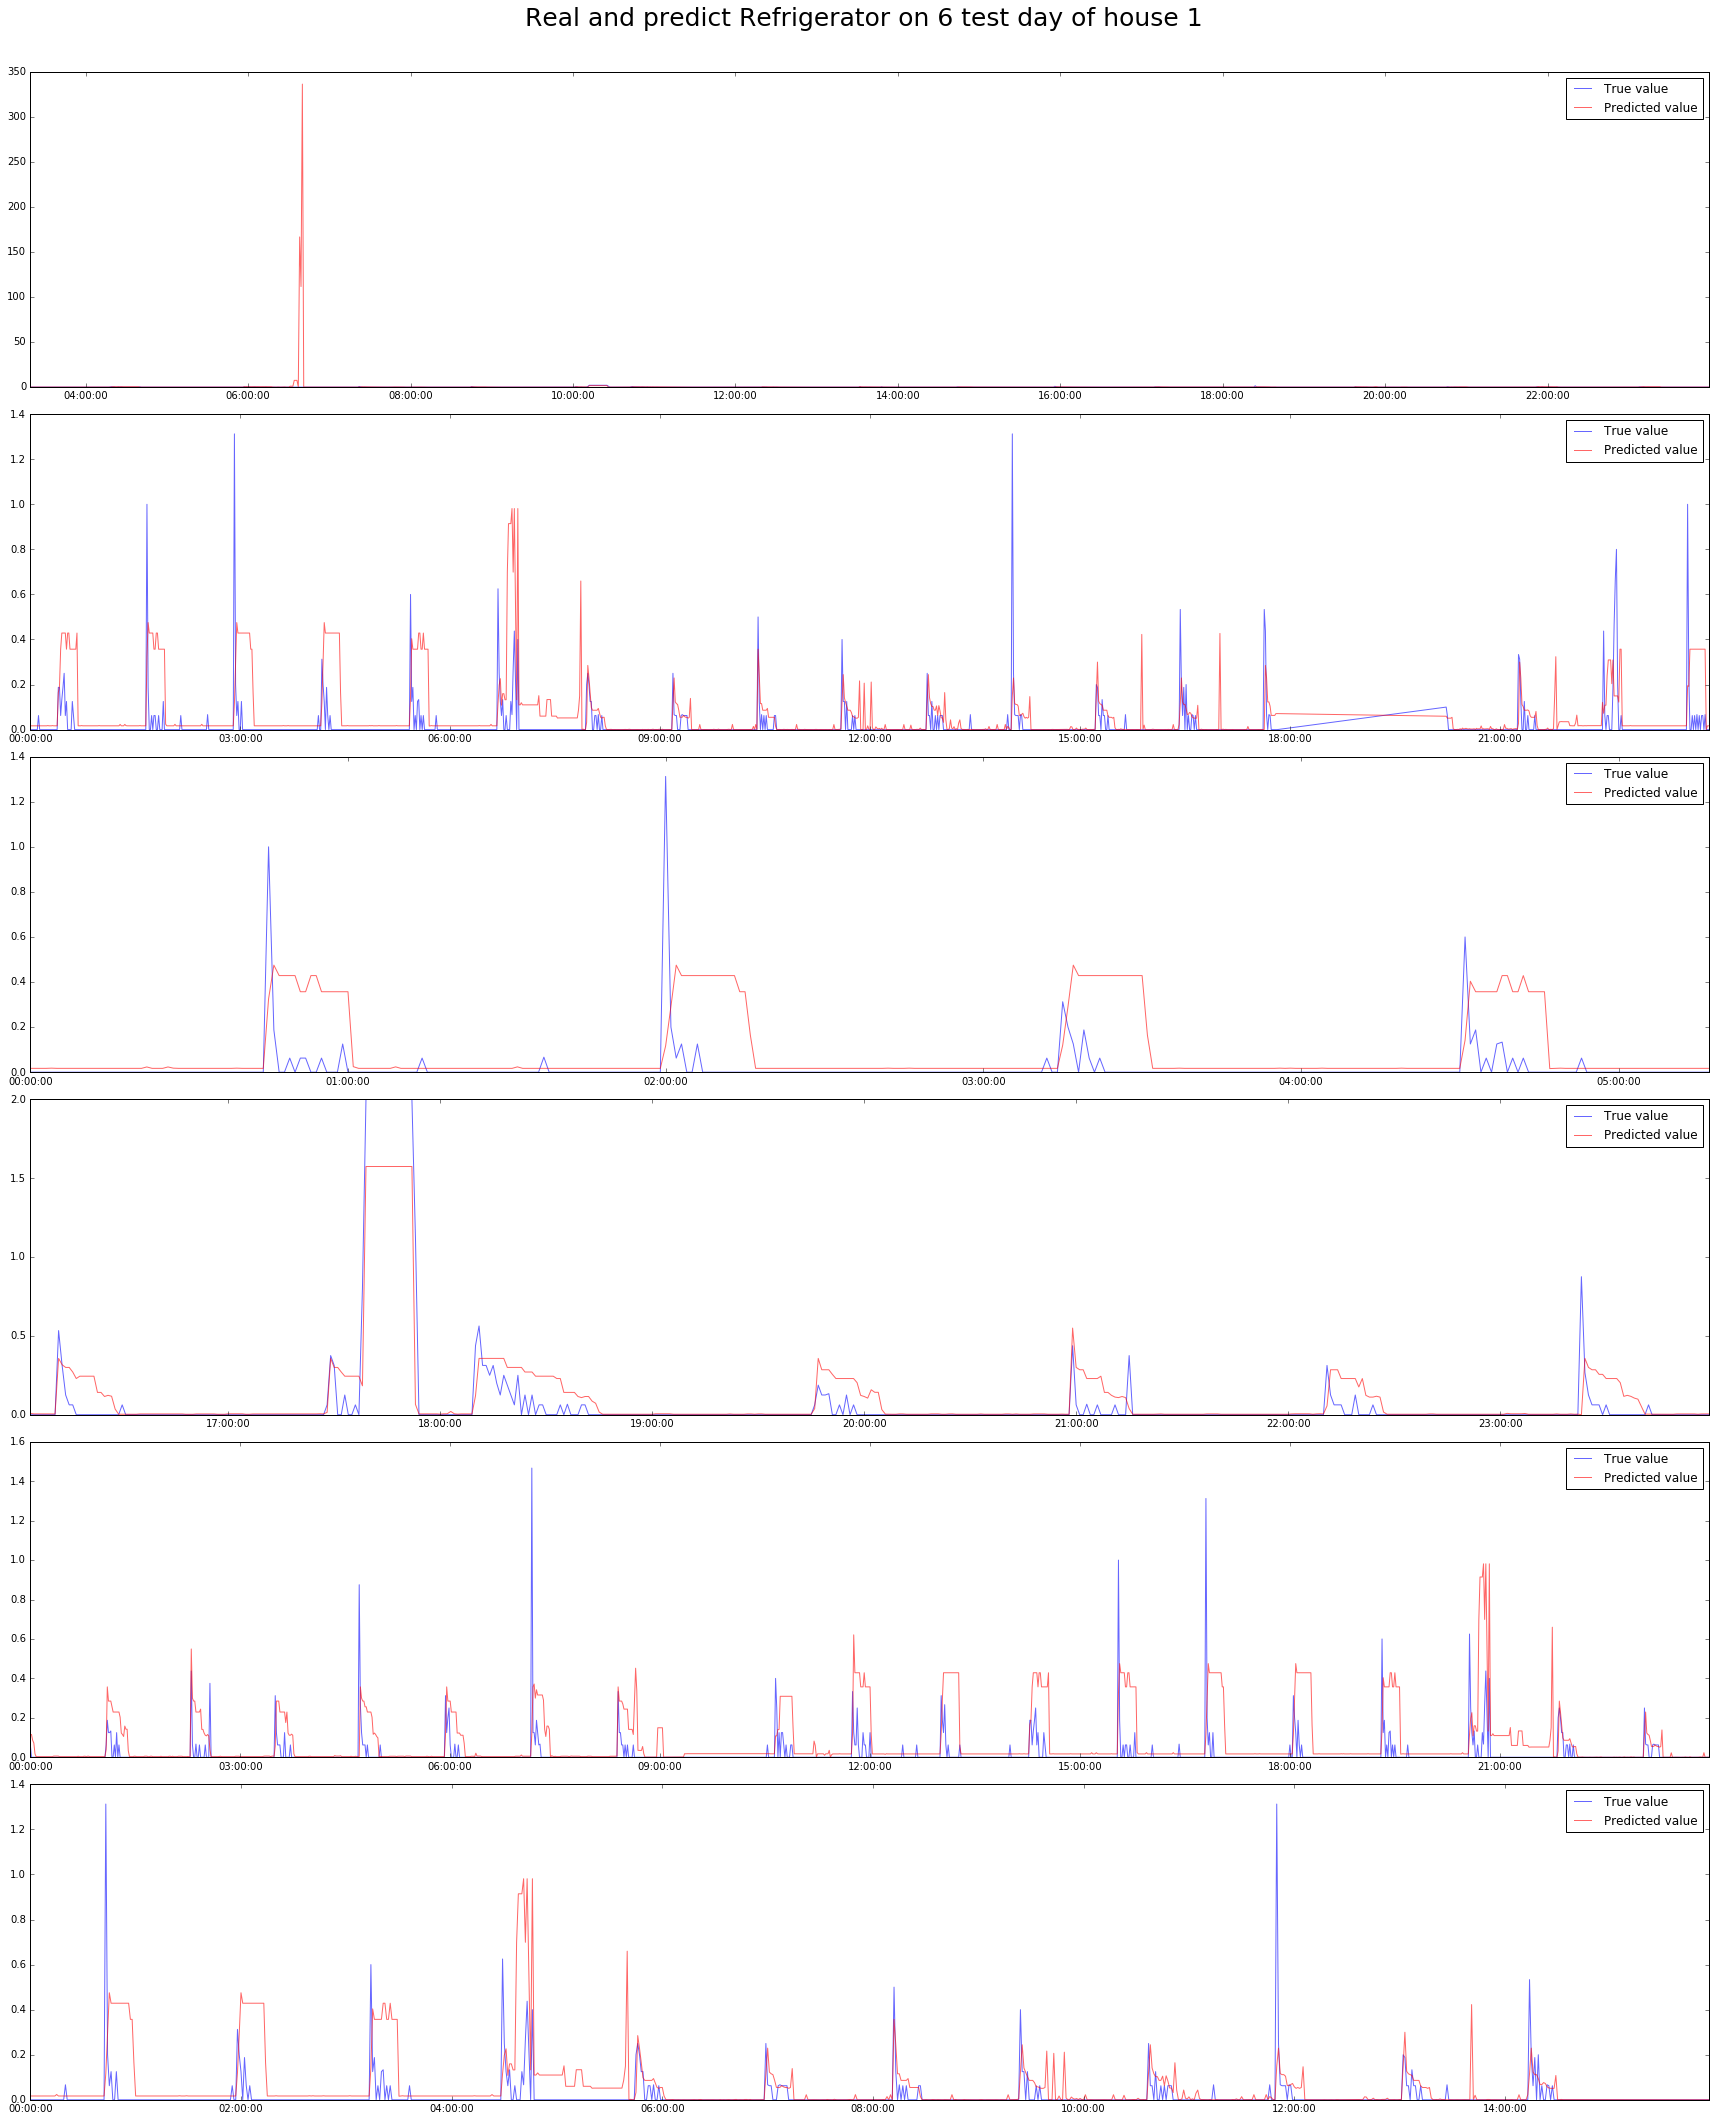

In [9]:
# Choose the best model and predict refrigerator consumption on the test set
ind = np.argmin(tree_losses_1)
tree_clf_1 = tree_clfs_1[ind]
y_test_predict_1 = tree_clf_1.predict(X_test1)
mse_tree_1 = mse_loss(y_test_predict_1, y_test1)
mae_tree_1 = mae_loss(y_test_predict_1, y_test1)
print('Mean square error on test set: ', mse_tree_1)
print('Mean absolute error on the test set: ', mae_tree_1)


# Plot real and predict refrigerator consumption on six days of test data
def plot_each_app(df, dates, predict, y_test, title, look_back = 0):
    import matplotlib.pyplot as plt
    %matplotlib inline
    num_date = len(dates)
    fig, axes = plt.subplots(num_date,1,figsize=(24, num_date*5))
    plt.suptitle(title, fontsize = '25')
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    for i in range(num_date):
        if i == 0: l = 0
        ind = df.ix[dates[i]].index[look_back:]
        axes.flat[i].plot(ind, y_test[l:l+len(ind)], color = 'blue', alpha = 0.6, label = 'True value')
        axes.flat[i].plot(ind, predict[l:l+len(ind)], color = 'red', alpha = 0.6, label = 'Predicted value')
        axes.flat[i].legend()
        l = len(ind)


plot_each_app(df1_test, dates[17:], y_test_predict_1, y_test1, 'Real and predict Refrigerator on 6 test day of house 1')

['mains_1', 'mains_2']
['mains_1', 'mains_2', '5_Fridge']
df_train.shape: (13805, 3)
df_val.shape: (6883, 3)
df_test.shape: (5579, 3)
((13805, 2), (13805, 1), (6883, 2), (6883, 1), (5579, 2), (5579, 1))


/opt/conda/lib/python2.7/site-packages/ipykernel/__main__.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('Trainning time: ', 28.401038885116577)
Mean square error on test set: 13201.5061878
Mean absolute error on the test set: 76.1860527631
0
['mains_1', 'mains_2', '6_Dish-washer']
df_train.shape: (13805, 3)
df_val.shape: (6883, 3)
df_test.shape: (5579, 3)
((13805, 2), (13805, 1), (6883, 2), (6883, 1), (5579, 2), (5579, 1))
('Trainning time: ', 31.940114974975586)
Mean square error on test set: 45696.8091188
Mean absolute error on the test set: 50.1591585203
1
['mains_1', 'mains_2', '7_Sockets']
df_train.shape: (13805, 3)
df_val.shape: (6883, 3)
df_test.shape: (5579, 3)
((13805, 2), (13805, 1), (6883, 2), (6883, 1), (5579, 2), (5579, 1))
('Trainning time: ', 27.856209993362427)
Mean square error on test set: 2.69670206631
Mean absolute error on the test set: 1.08276327053
2
['mains_1', 'mains_2', '8_Sockets']
df_train.shape: (13805, 3)
df_val.shape: (6883, 3)
df_test.shape: (5579, 3)
((13805, 2), (13805, 1), (6883, 2), (6883, 1), (5579, 2), (5579, 1))
('Trainning time: ', 26.103709936141

AttributeError: 'MeterGroup' object has no attribute 'metadata'

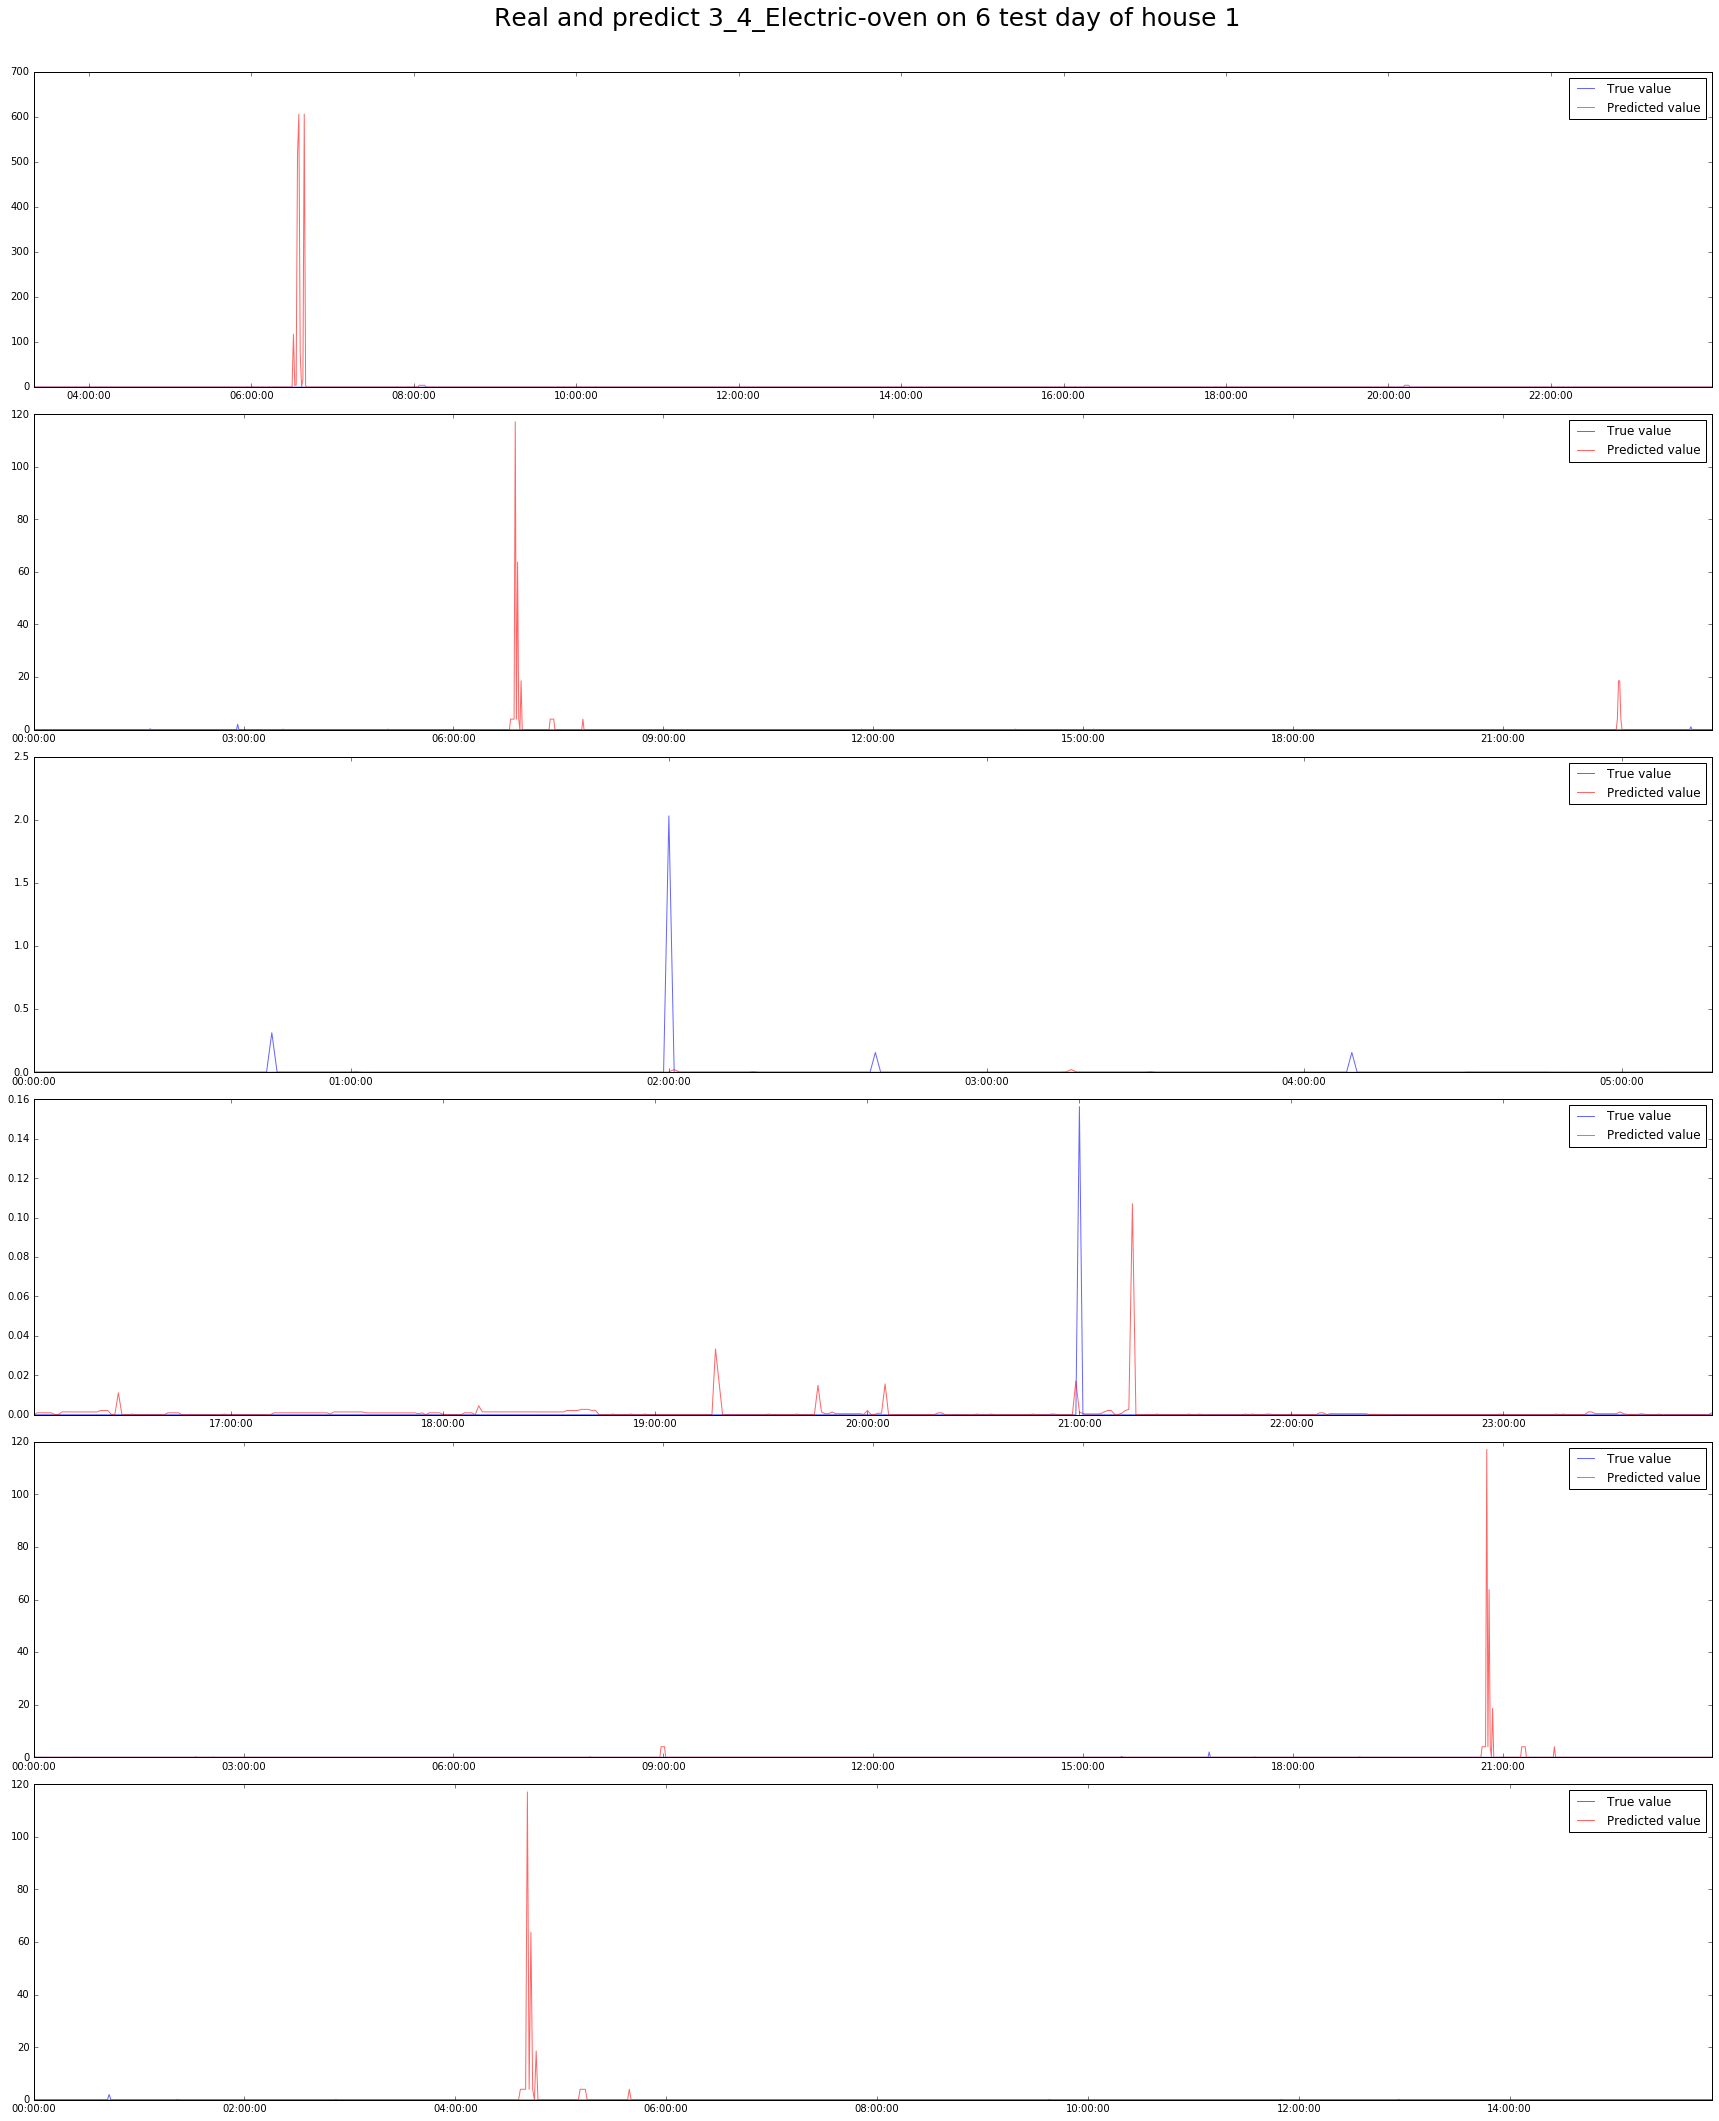

In [10]:
import nilmtk
from nilmtk import DataSet, TimeFrame
import math
import pandas as pd
import time
import numpy as np

# Using decision tree regression, here we use validation data to turn the min_samples_split parameter
def mse_loss(y_predict, y):
    return np.mean(np.square(y_predict - y)) 
def mae_loss(y_predict, y):
    return np.mean(np.abs(y_predict - y)) 

#from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
def tree_reg(X_train, y_train, X_val, y_val, min_samples_split):
    import time
    clfs = []
    losses = []
    start = time.time()
    for split in min_samples_split:
        #clf = DecisionTreeRegressor(min_samples_split = split)
        clf = RandomForestRegressor(min_samples_split = split)
        clf.fit(X_train, y_train)
        y_predict_val = clf.predict(X_val)
        clfs.append(clf)
        losses.append( mse_loss(y_predict_val, y_val) )
    print('Trainning time: ', time.time() - start)
    return clfs, losses

import matplotlib.pyplot as plt
%matplotlib inline

# Plot real and predict refrigerator consumption on six days of test data
def plot_each_app(df, dates, predict, y_test, title, look_back = 0):
    num_date = len(dates)
    fig, axes = plt.subplots(num_date,1,figsize=(24, num_date*5))
    plt.suptitle(title, fontsize = '25')
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    for i in range(num_date):
        if i == 0: l = 0
        ind = df.ix[dates[i]].index[look_back:]
        axes.flat[i].plot(ind, y_test[l:l+len(ind)], color = 'blue', alpha = 0.6, label = 'True value')
        axes.flat[i].plot(ind, predict[l:l+len(ind)], color = 'red', alpha = 0.6, label = 'Predicted value')
        axes.flat[i].legend()
        l = len(ind)
        
train = DataSet('/nilmtk/data/REDD/redd.h5') 

train_elec = train.buildings[building_number].elec

metergroup = train.buildings[building_number].elec

main = train_elec.mains().dataframe_of_meters(sample_period=60, resample=True).dropna()

colMainName = []
for i in range(1,main.shape[1]+1):
    colMainName.append('mains_{}'.format(i))
print(colMainName)
for i, meter in enumerate(metergroup.submeters().meters):
    %matplotlib inline
    if isinstance(meter.instance(), tuple):
        instance = '_'.join(str(e) for e in meter.instance())
    else:
        instance = meter.instance()
    applianceType = meter.label(pretty=True)
    colMeterName = "{}_{}".format( instance, applianceType.replace(' ','-'))
    df = meter.power_series_all_data(sample_period=60, resample=True).dropna() #dataframe_of_meters(sample_period=60, resample=True).dropna()
 
    joinMainMeters = pd.concat([main, df], axis=1, join='inner')
    colsName = colMainName + [colMeterName]
    print(colsName)
    joinMainMeters.columns = colsName
 
    # What days have measurements
    dates = [str(time)[:10] for time in joinMainMeters.index.values]
    dates = sorted(list(set(dates)))

    # Separate house 1 data into train, validation and test data
    df1_train = joinMainMeters.ix[:dates[10]]
    df1_val = joinMainMeters.ix[dates[11]:dates[16]]
    df1_test = joinMainMeters.ix[dates[17]:]
    print('df_train.shape: {}'.format(df1_train.shape))
    print('df_val.shape: {}'.format(df1_val.shape))
    print('df_test.shape: {}'.format(df1_test.shape))

    min_samples_split=np.arange(2, 400, 10)

    # Using mains_1, mains_2 to predict refrigerator
    X_train1 = df1_train.iloc[:,:main.shape[1]].values
    y_train1 = df1_train.iloc[:,main.shape[1]:].values
    X_val1 = df1_val.iloc[:,:main.shape[1]].values
    y_val1 = df1_val.iloc[:,main.shape[1]:].values

    X_test1 = df1_test.iloc[:,:main.shape[1]].values
    y_test1 = df1_test.iloc[:,main.shape[1]:].values
    
    print(X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape)
    #print(meter.appliances) #meter.metadata
    tree_clfs_1, tree_losses_1 = tree_reg(X_train1, y_train1, X_val1, y_val1, min_samples_split)
    
    ind = np.argmin(tree_losses_1) #find best model for de appliance
    tree_clf_1 = tree_clfs_1[ind]
    y_test_predict_1 = tree_clf_1.predict(X_test1)
    
    tree_clf_all_meters = {}
    tree_clf_all_meters[colMeterName] = tree_clf_1 #salva todos os modelos
    plot_each_app(df1_test, dates[17:], y_test_predict_1, y_test1, 'Real and predict {} on 6 test day of house 1'.format(colMeterName))
    mse_tree_1 = mse_loss(y_test_predict_1, y_test1)
    mae_tree_1 = mae_loss(y_test_predict_1, y_test1)
    
    predictRandomTree = {'meter': colMeterName,
                         'metadata': meter.metadata,
                        'model': tree_clf_1
                        }
    
    import pickle
    folder = '/nilmtk/data/EA006-NILM-project/Training_output'
    with open('{}/{}_out.pkl'.format(folder, colMeterName),'w') as f:
        pickle.dump(predictRandomTree, f)
    
    print('Mean square error on test set: {}'.format(mse_tree_1))
    print('Mean absolute error on the test set: {}'.format(mae_tree_1))
    print(i)
#    if(i>0):
#        break

Mean square error on test set: 105412.964191
Mean absolute error on the test set: 36.9398564928
Mean square error on test set: 126334.197833
Mean absolute error on the test set: 57.5594456895
Mean square error on test set: 110191.720302
Mean absolute error on the test set: 88.7392845668
Mean square error on test set: 126550.52717
Mean absolute error on the test set: 57.899180437
Mean square error on test set: 105163.778686
Mean absolute error on the test set: 52.6235337814
Mean square error on test set: 105171.378113
Mean absolute error on the test set: 53.9911587137
Mean square error on test set: 116115.161347
Mean absolute error on the test set: 57.7309503367
Mean square error on test set: 104320.85151
Mean absolute error on the test set: 58.9311602896
Mean square error on test set: 104865.804884
Mean absolute error on the test set: 43.5903257058
Mean square error on test set: 105161.607292
Mean absolute error on the test set: 32.591298059
Mean square error on test set: 110168.143048

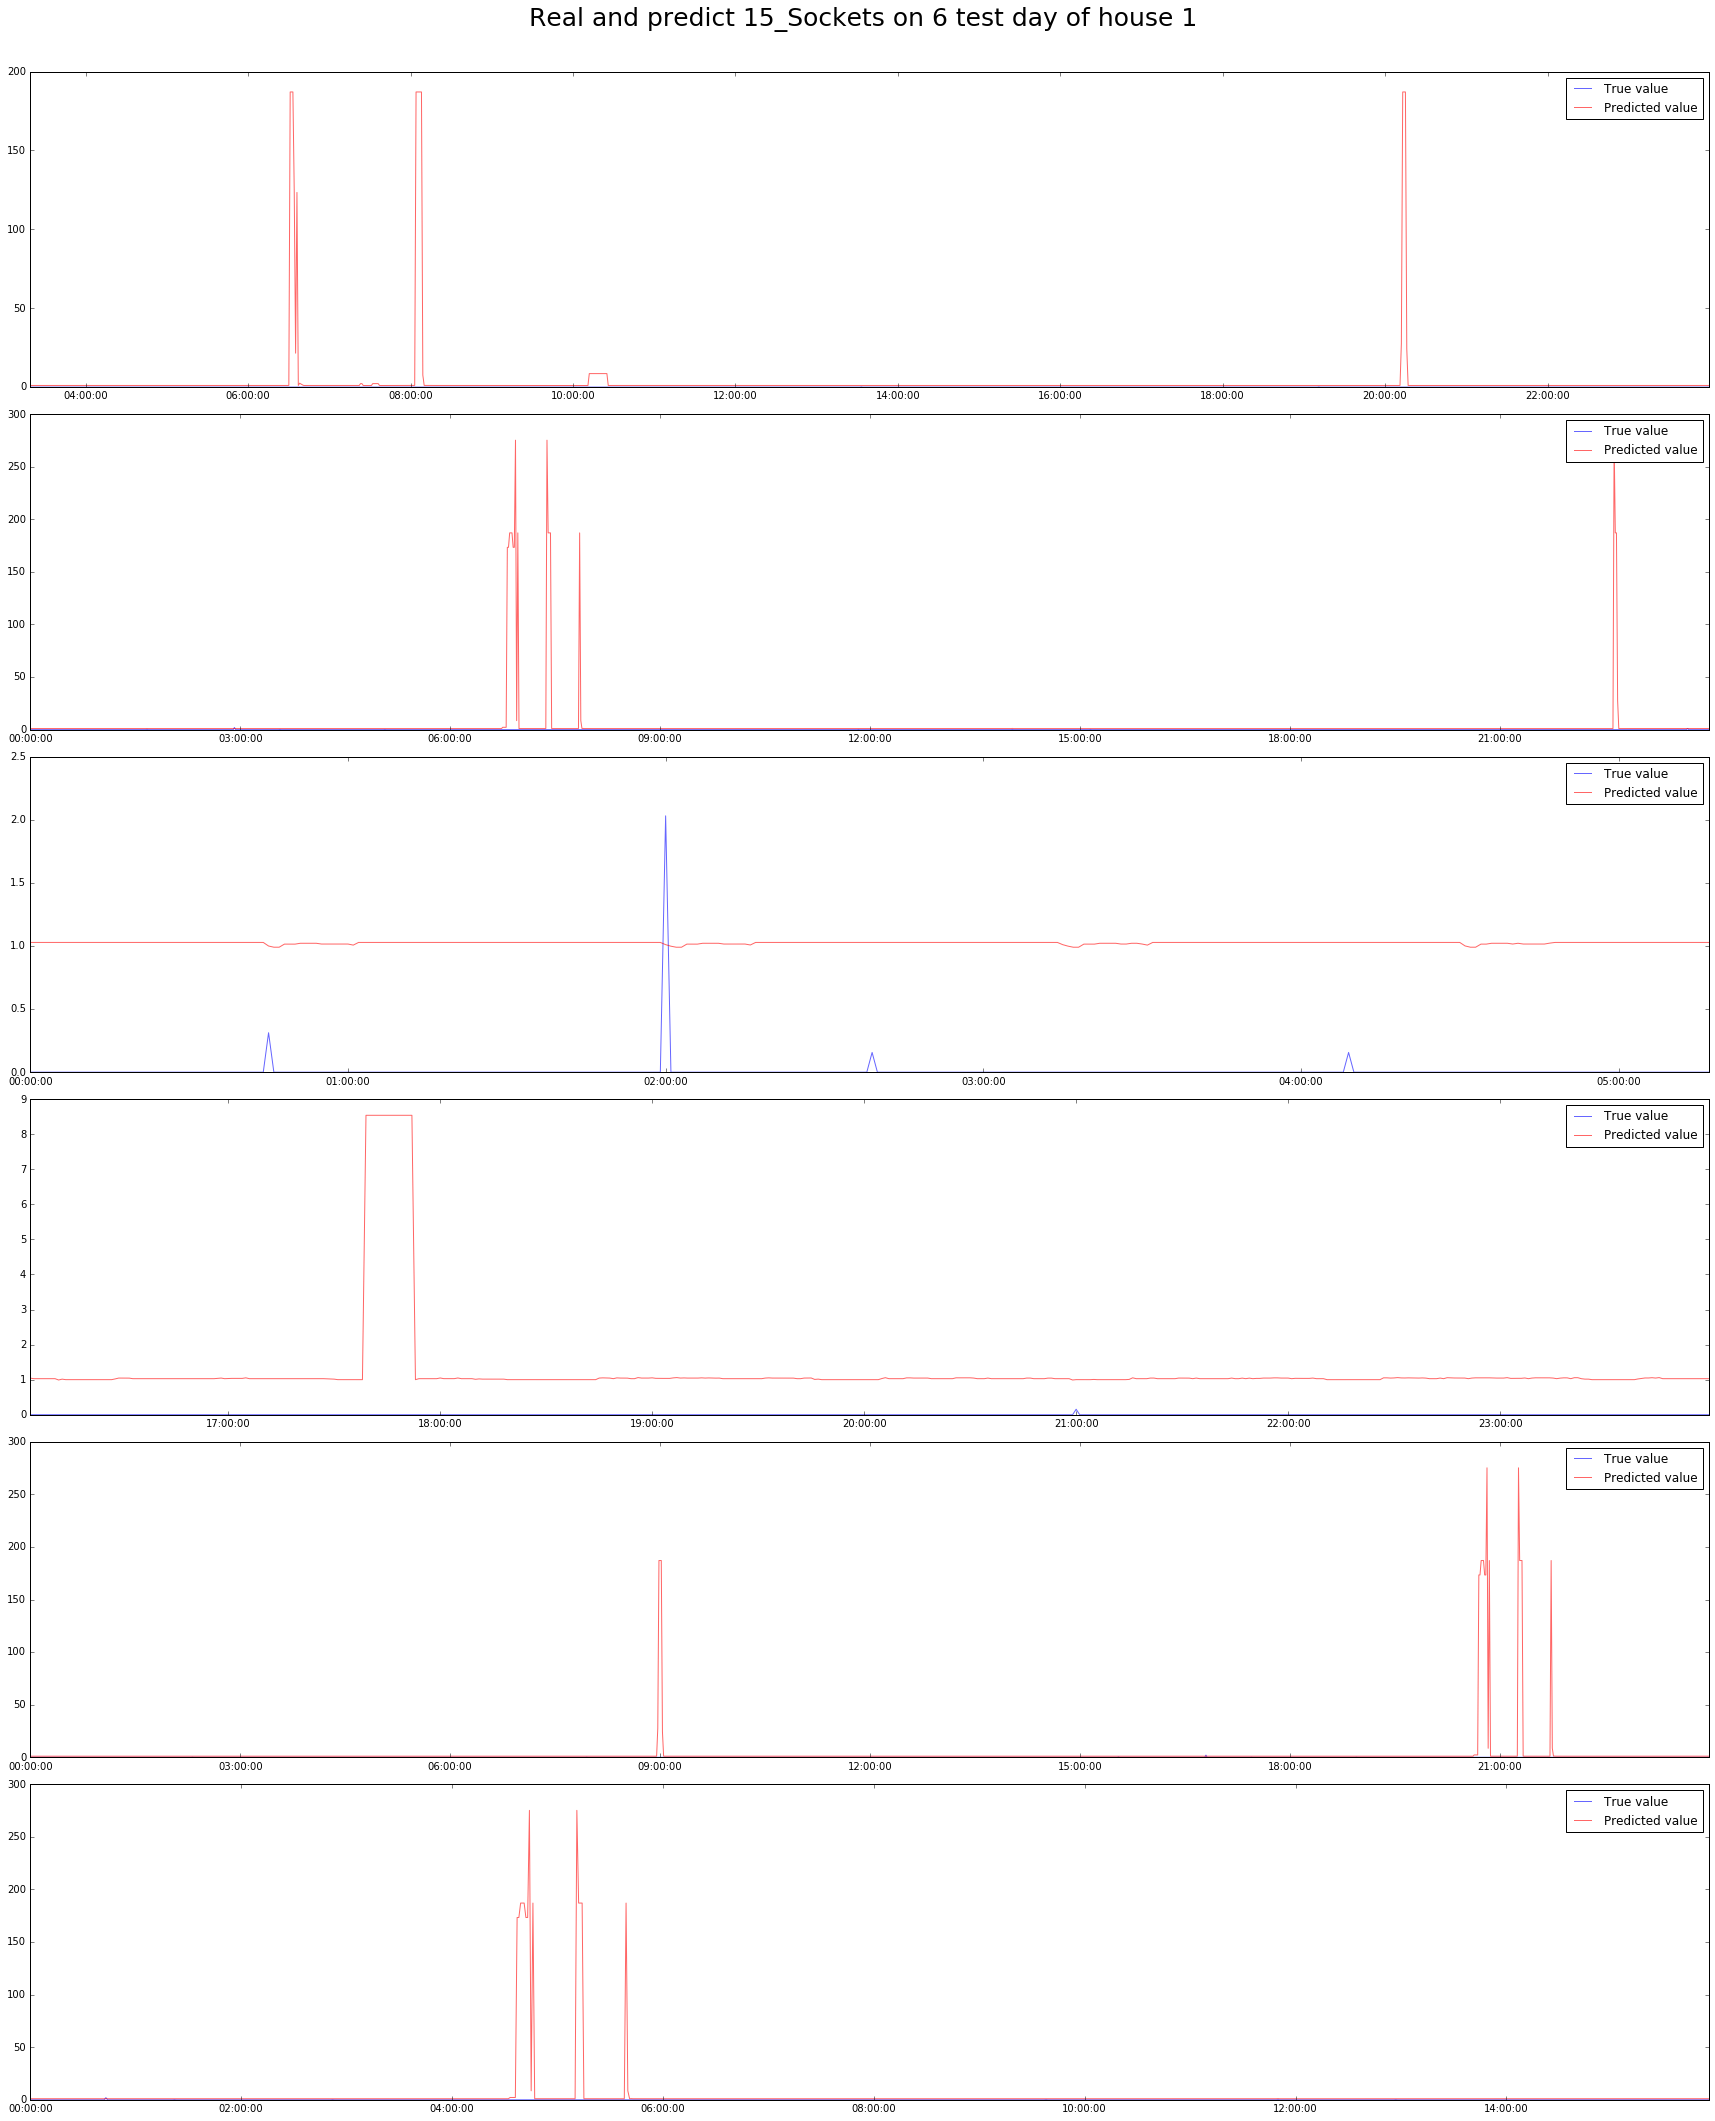

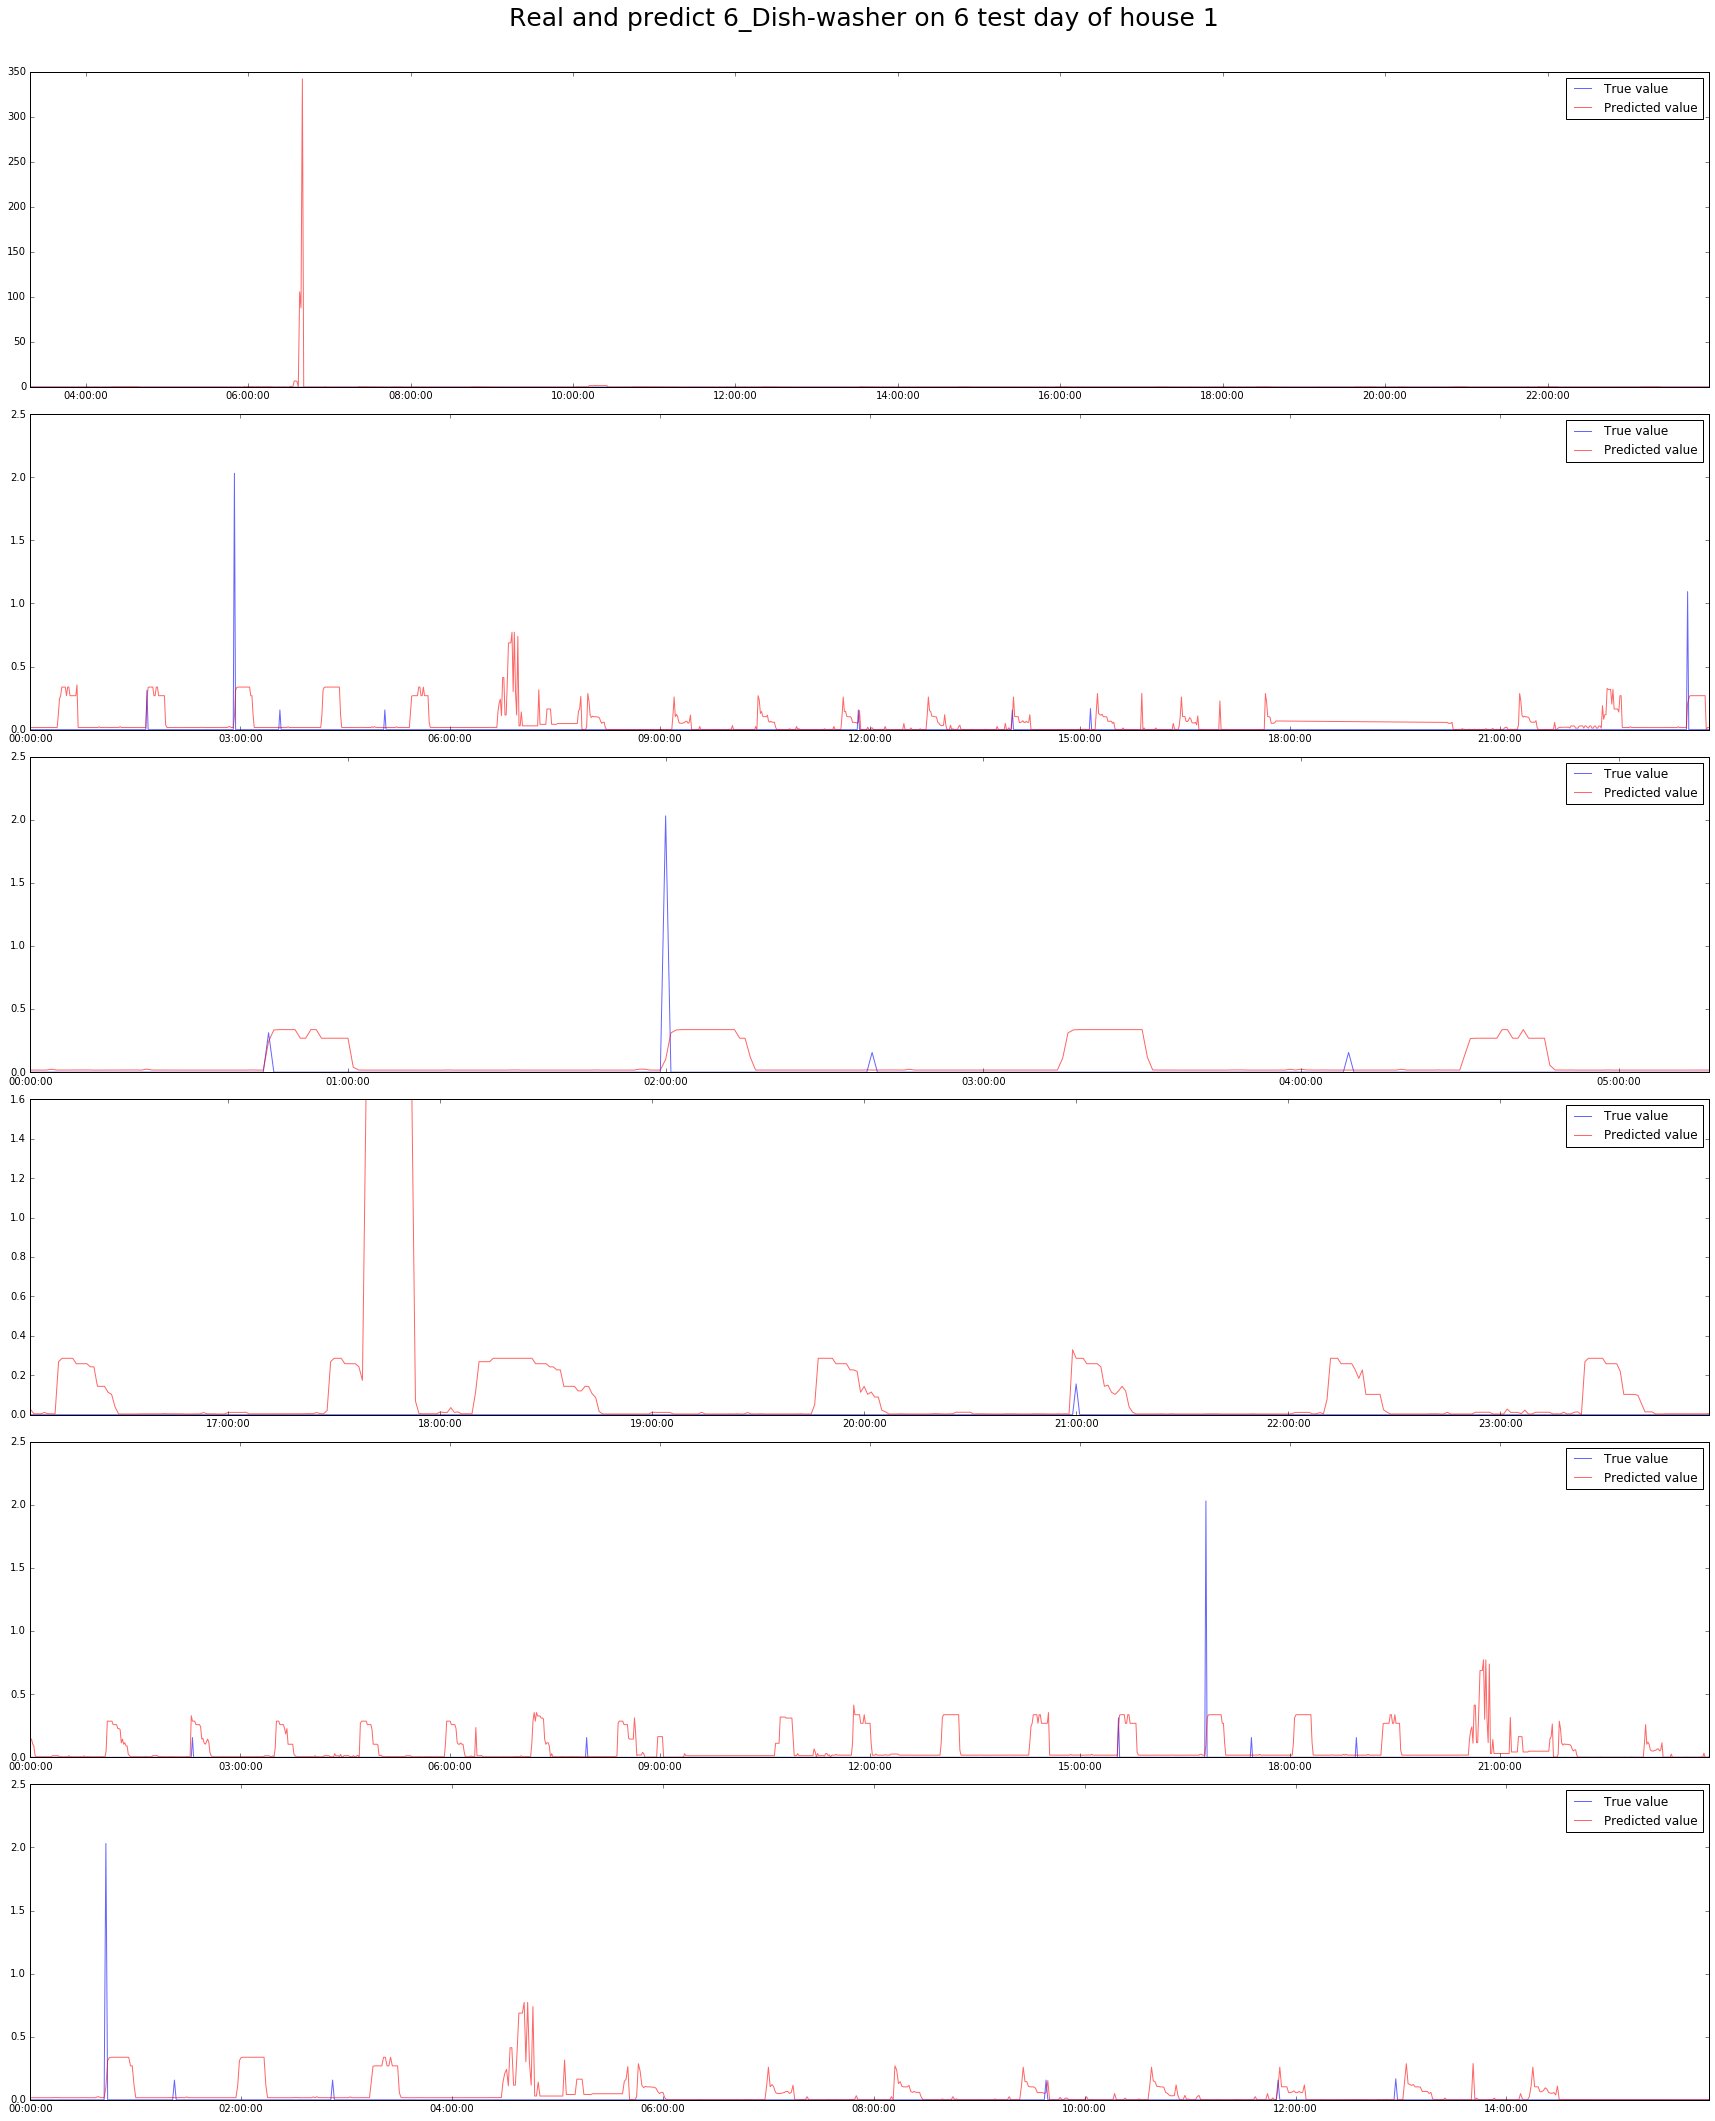

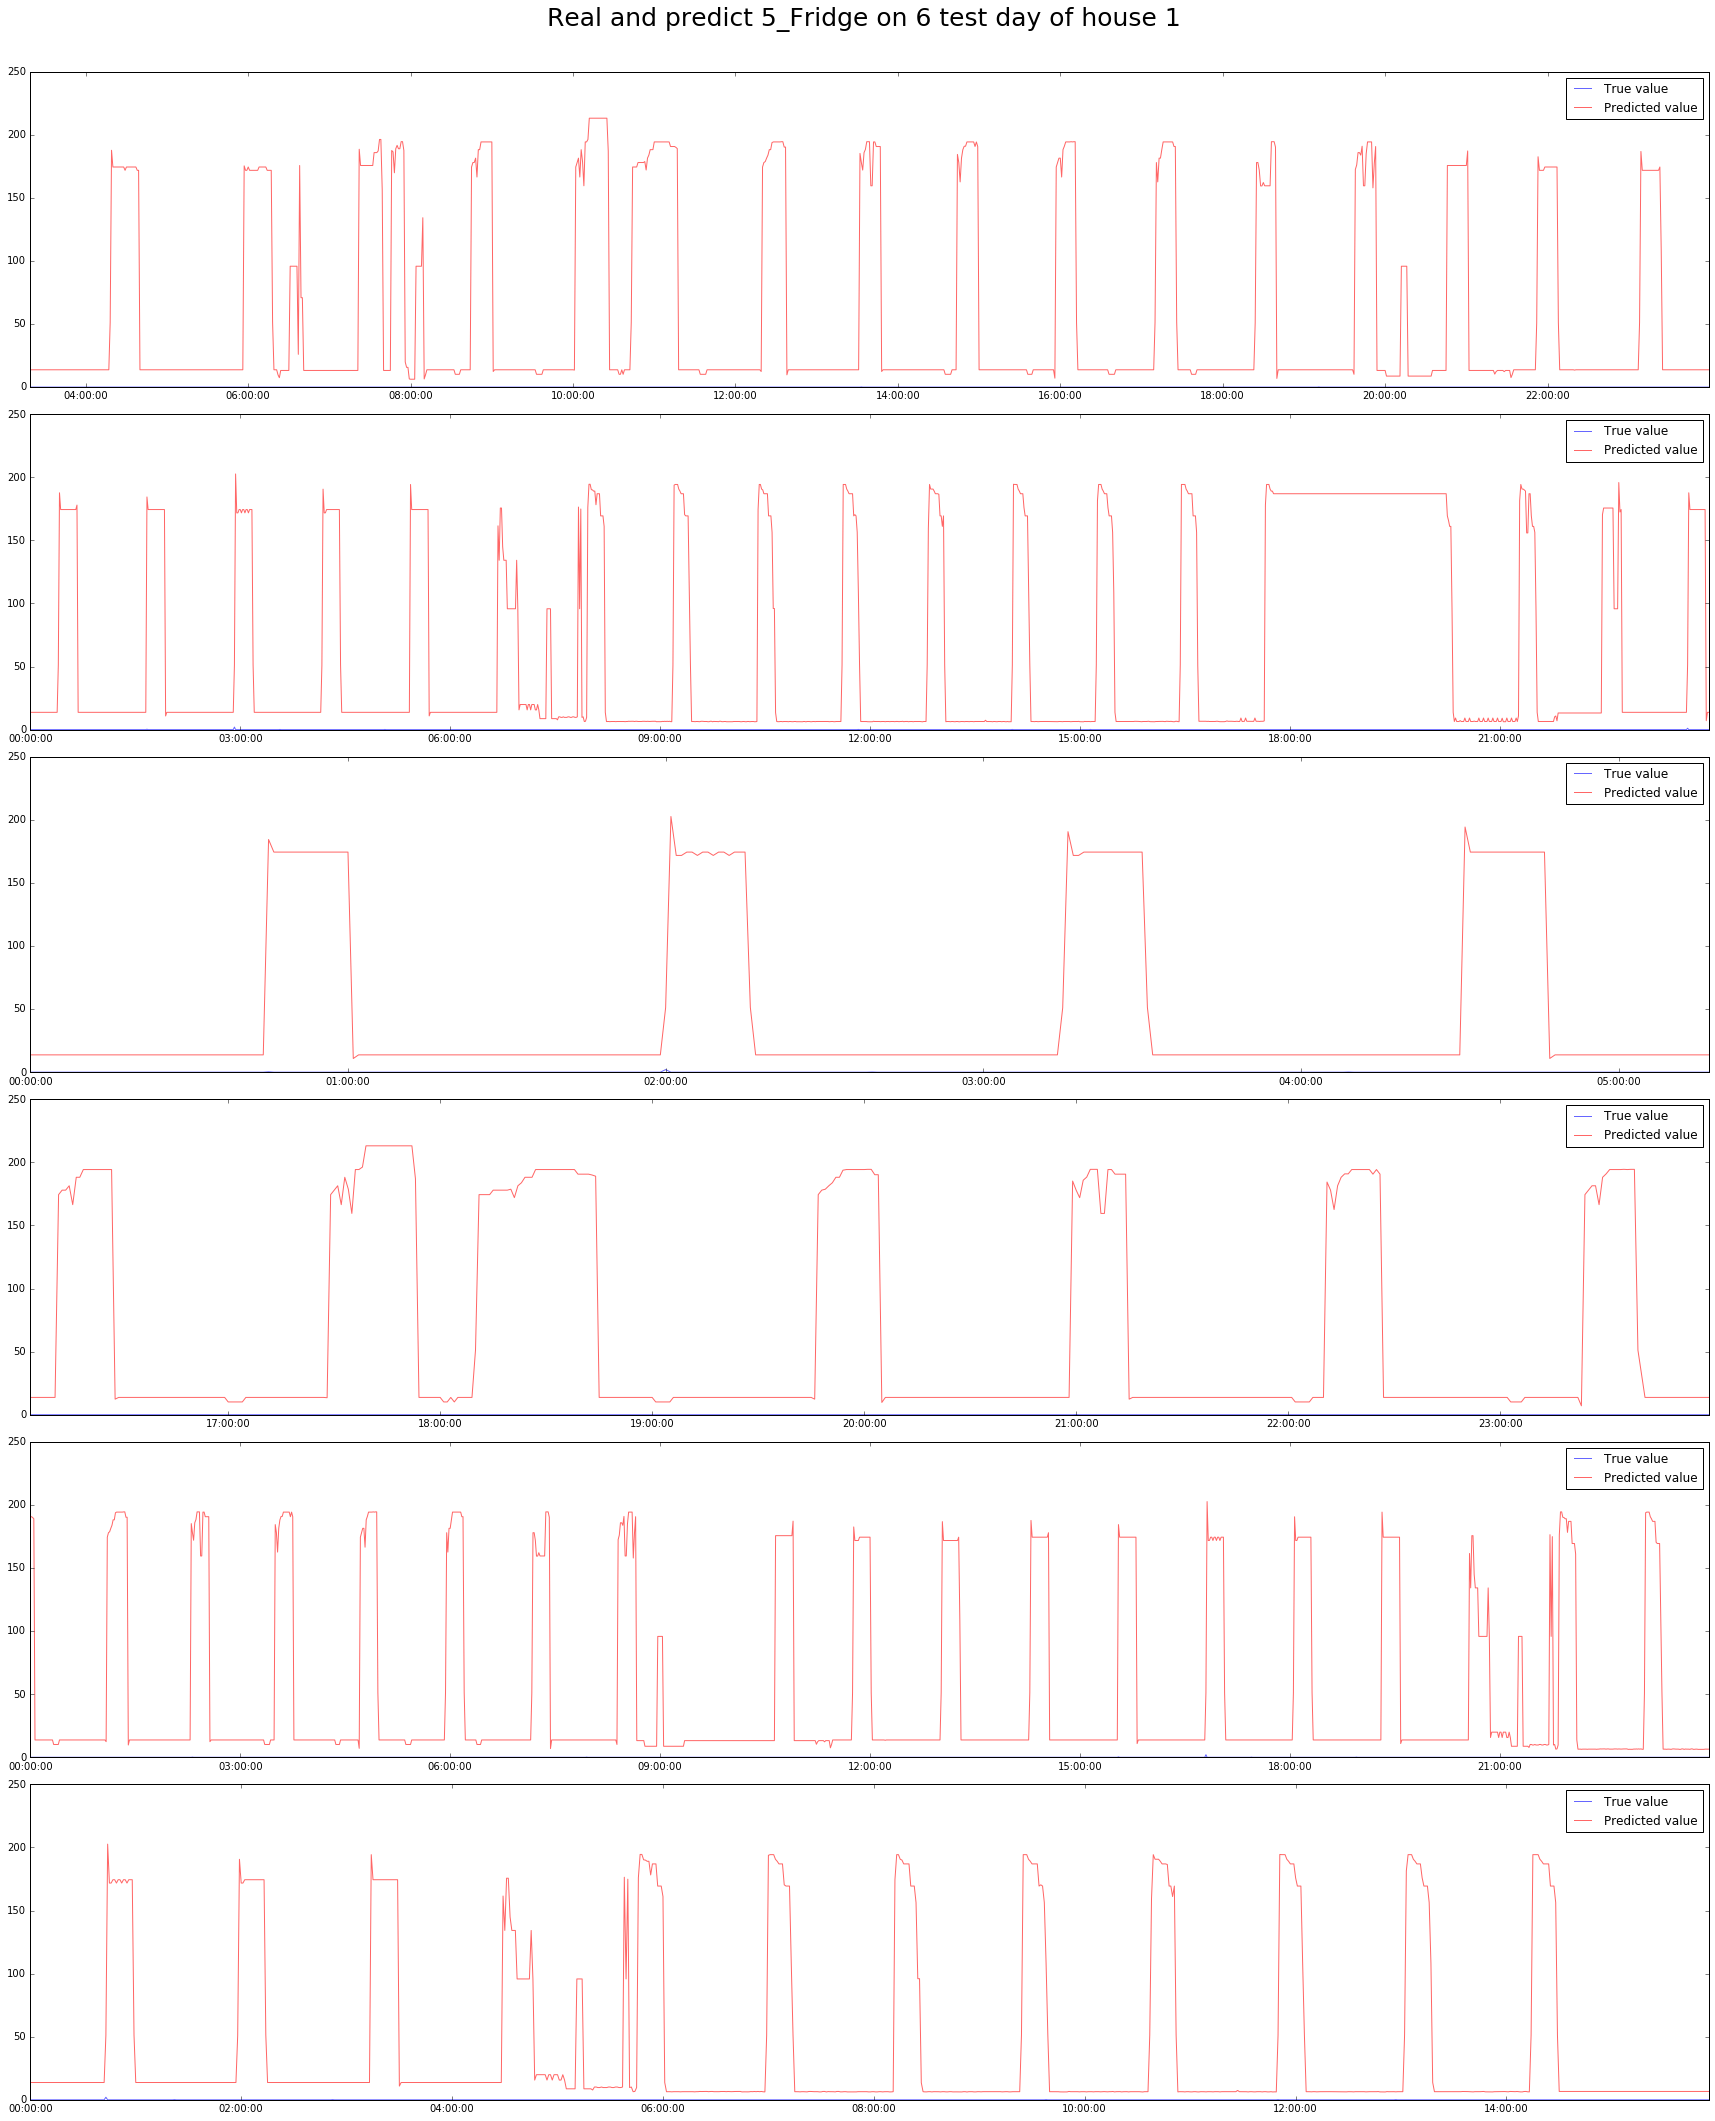

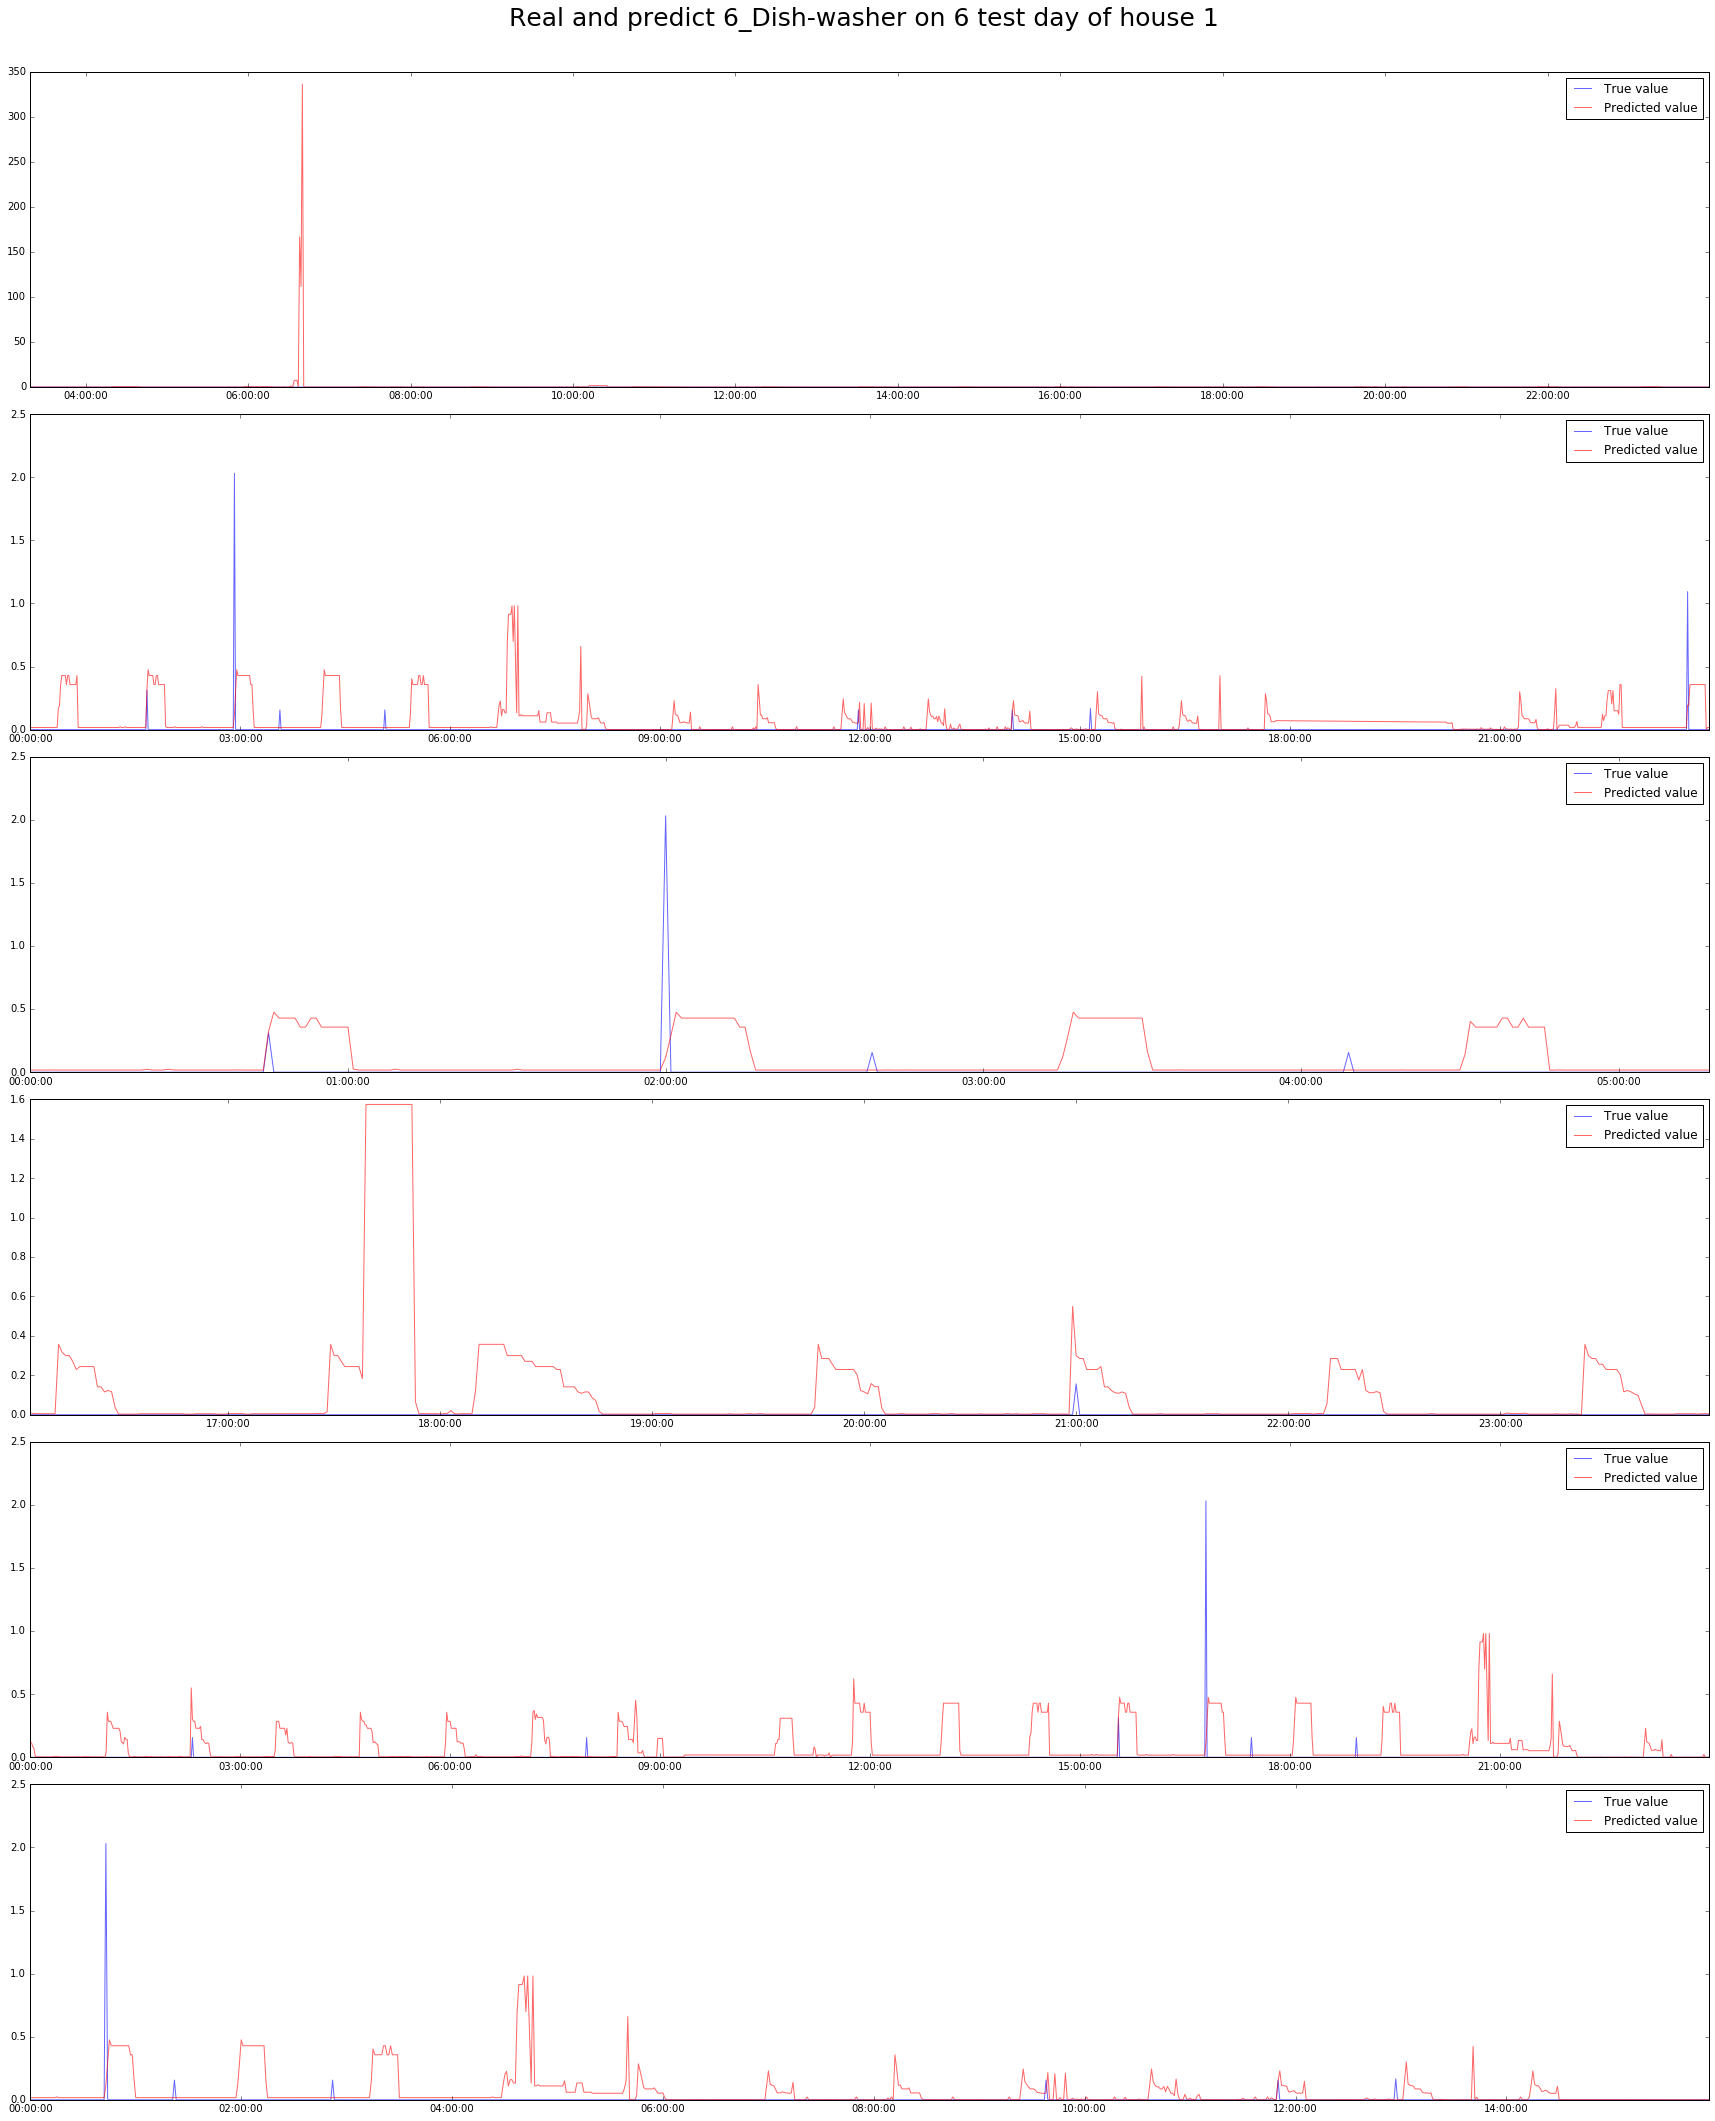

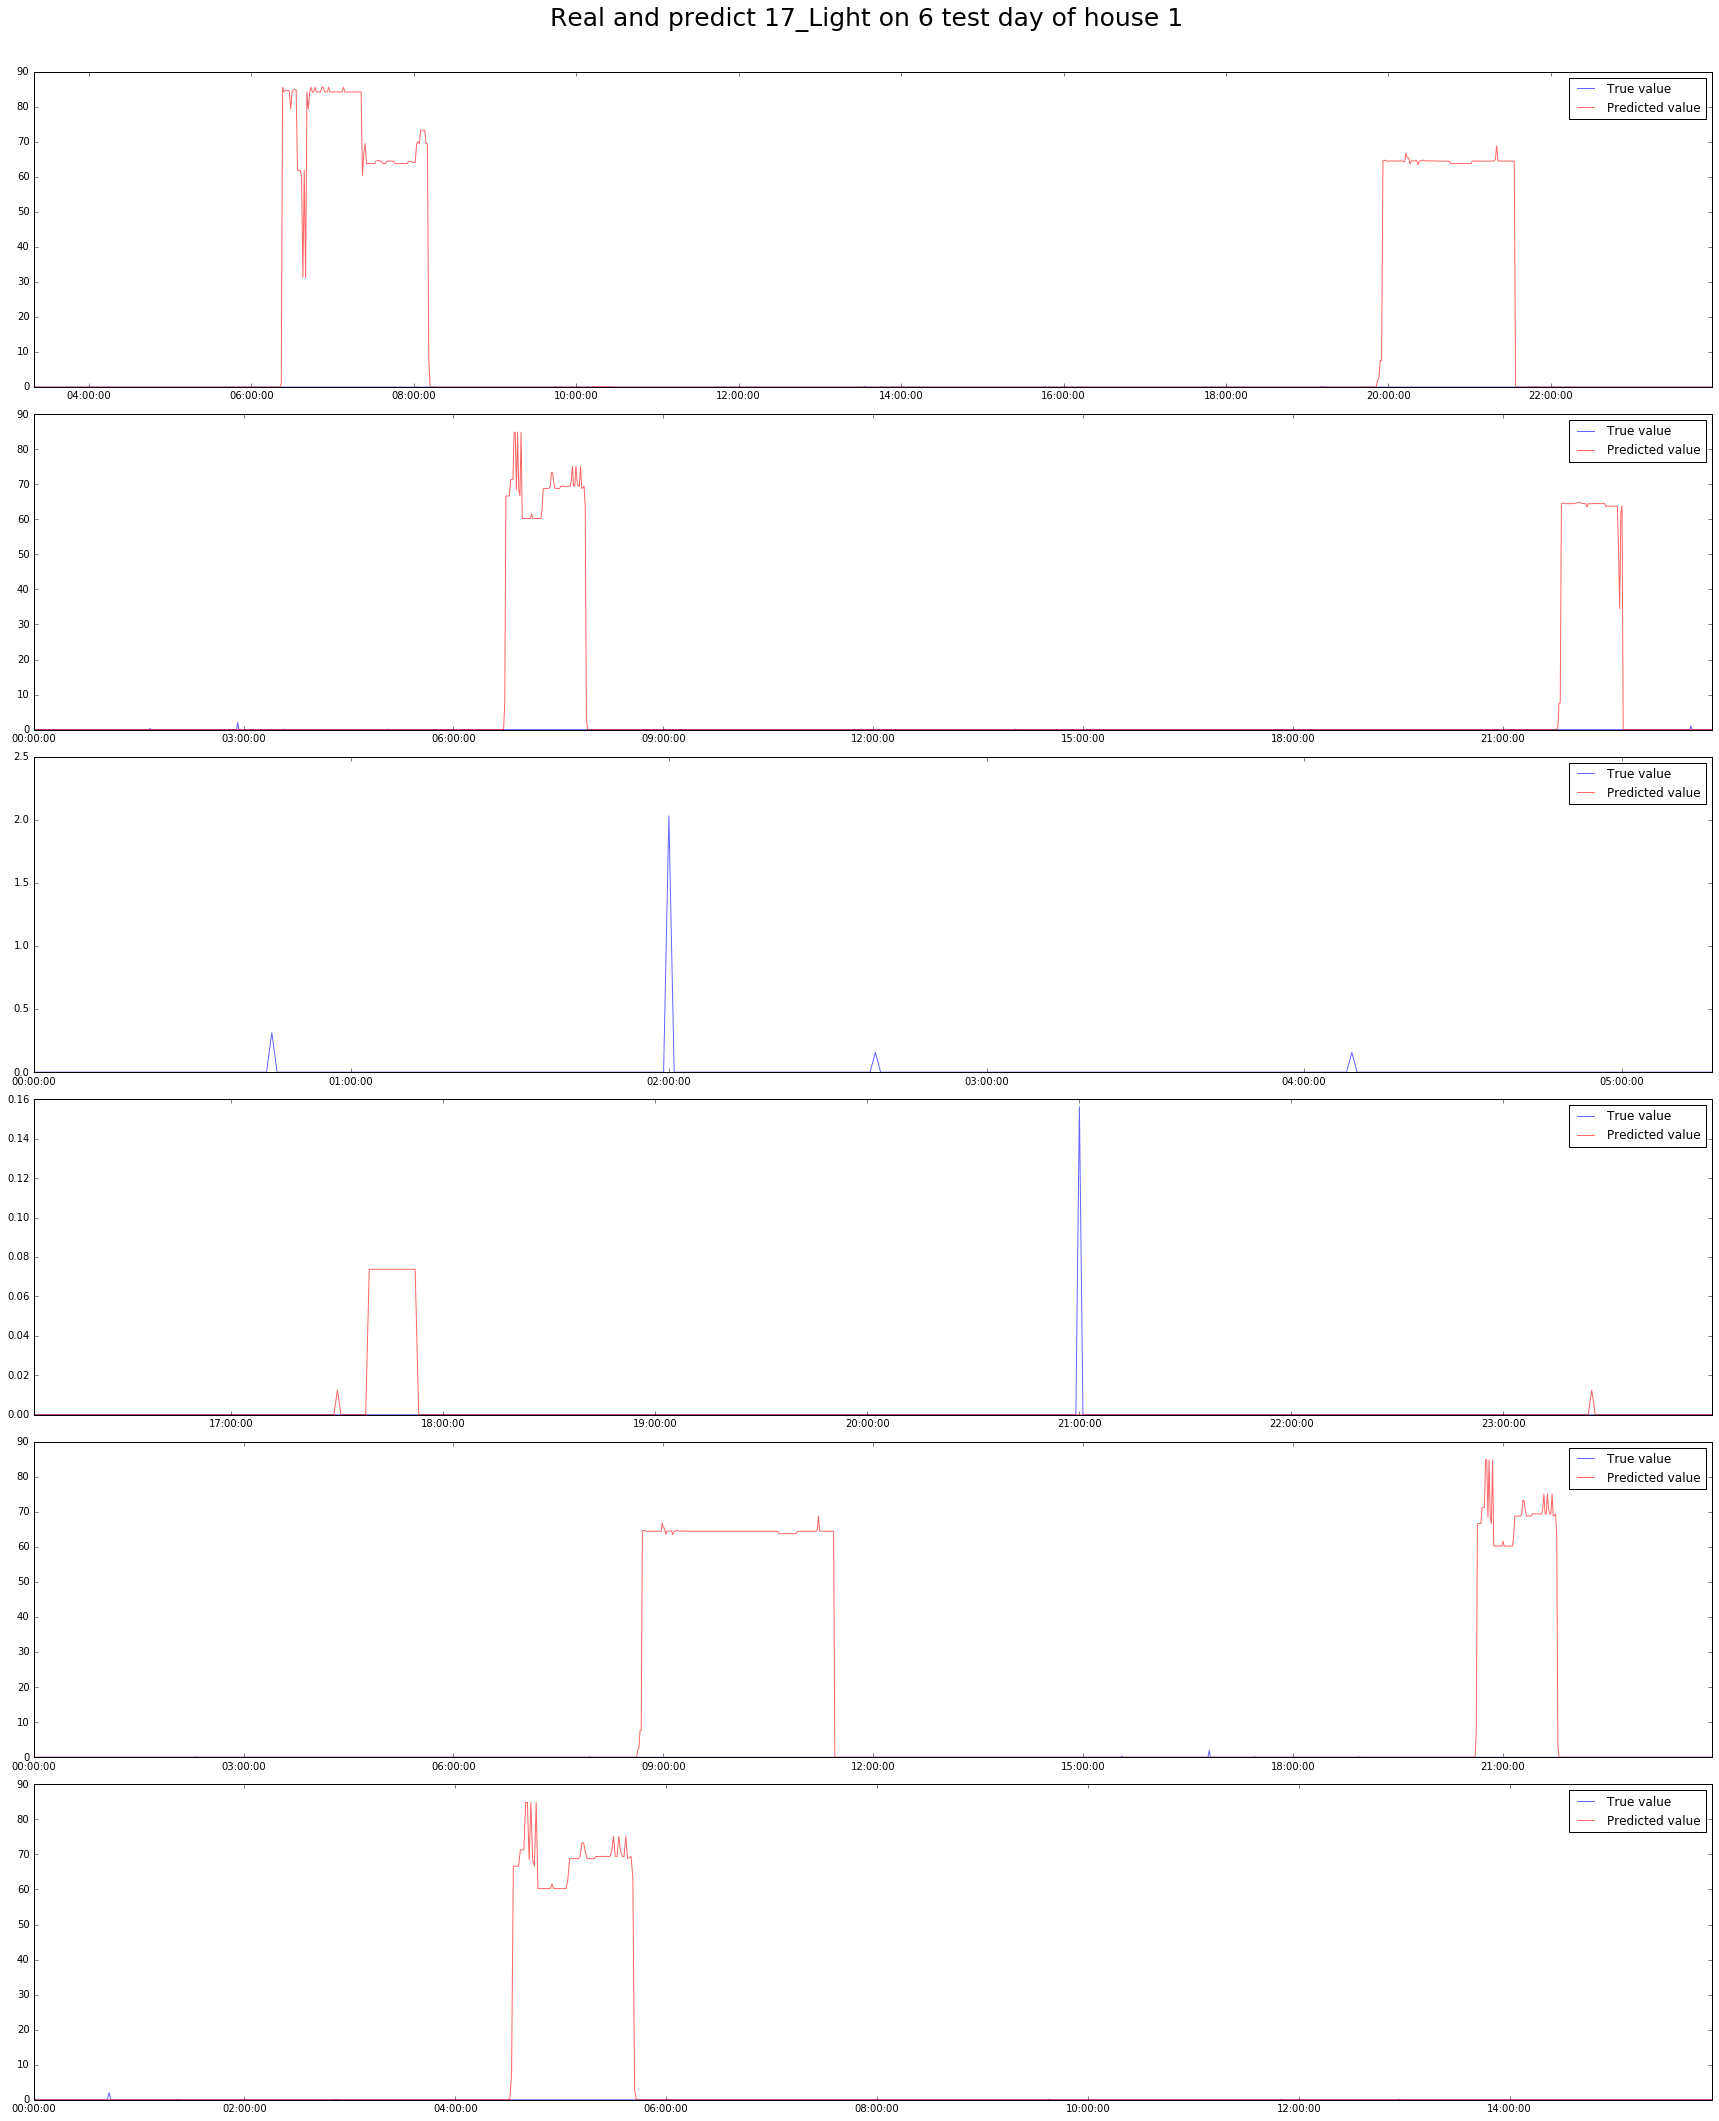

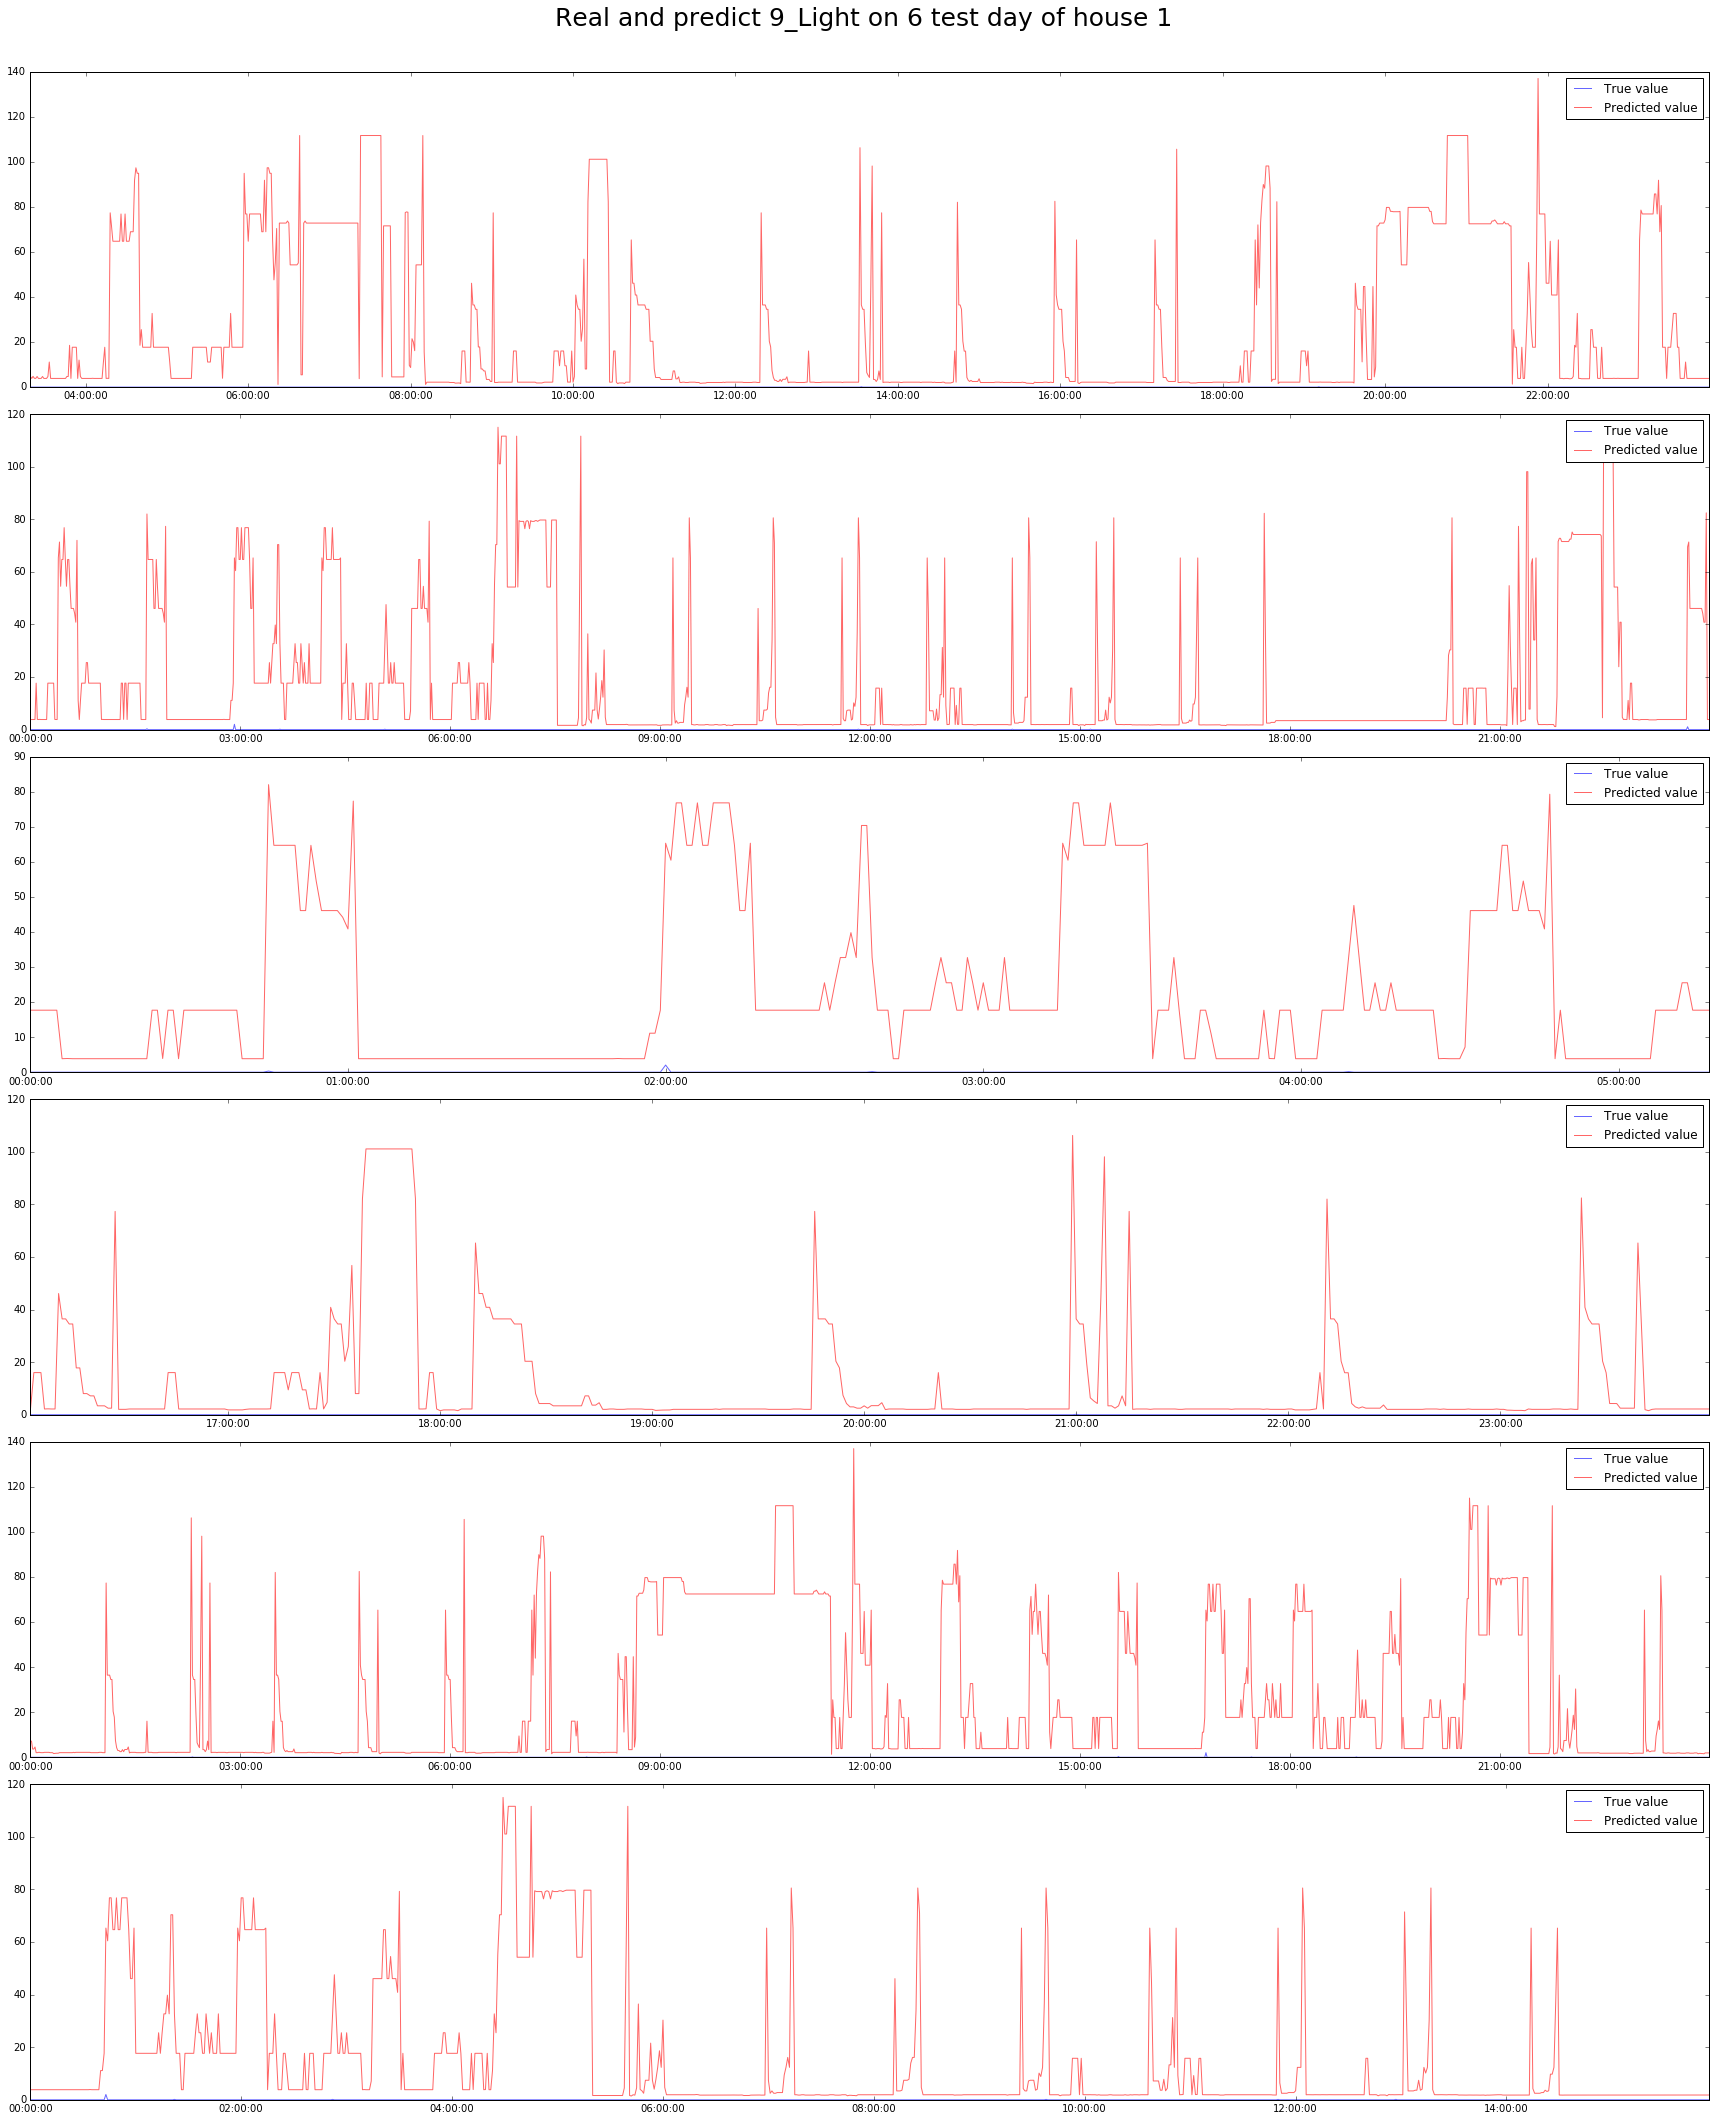

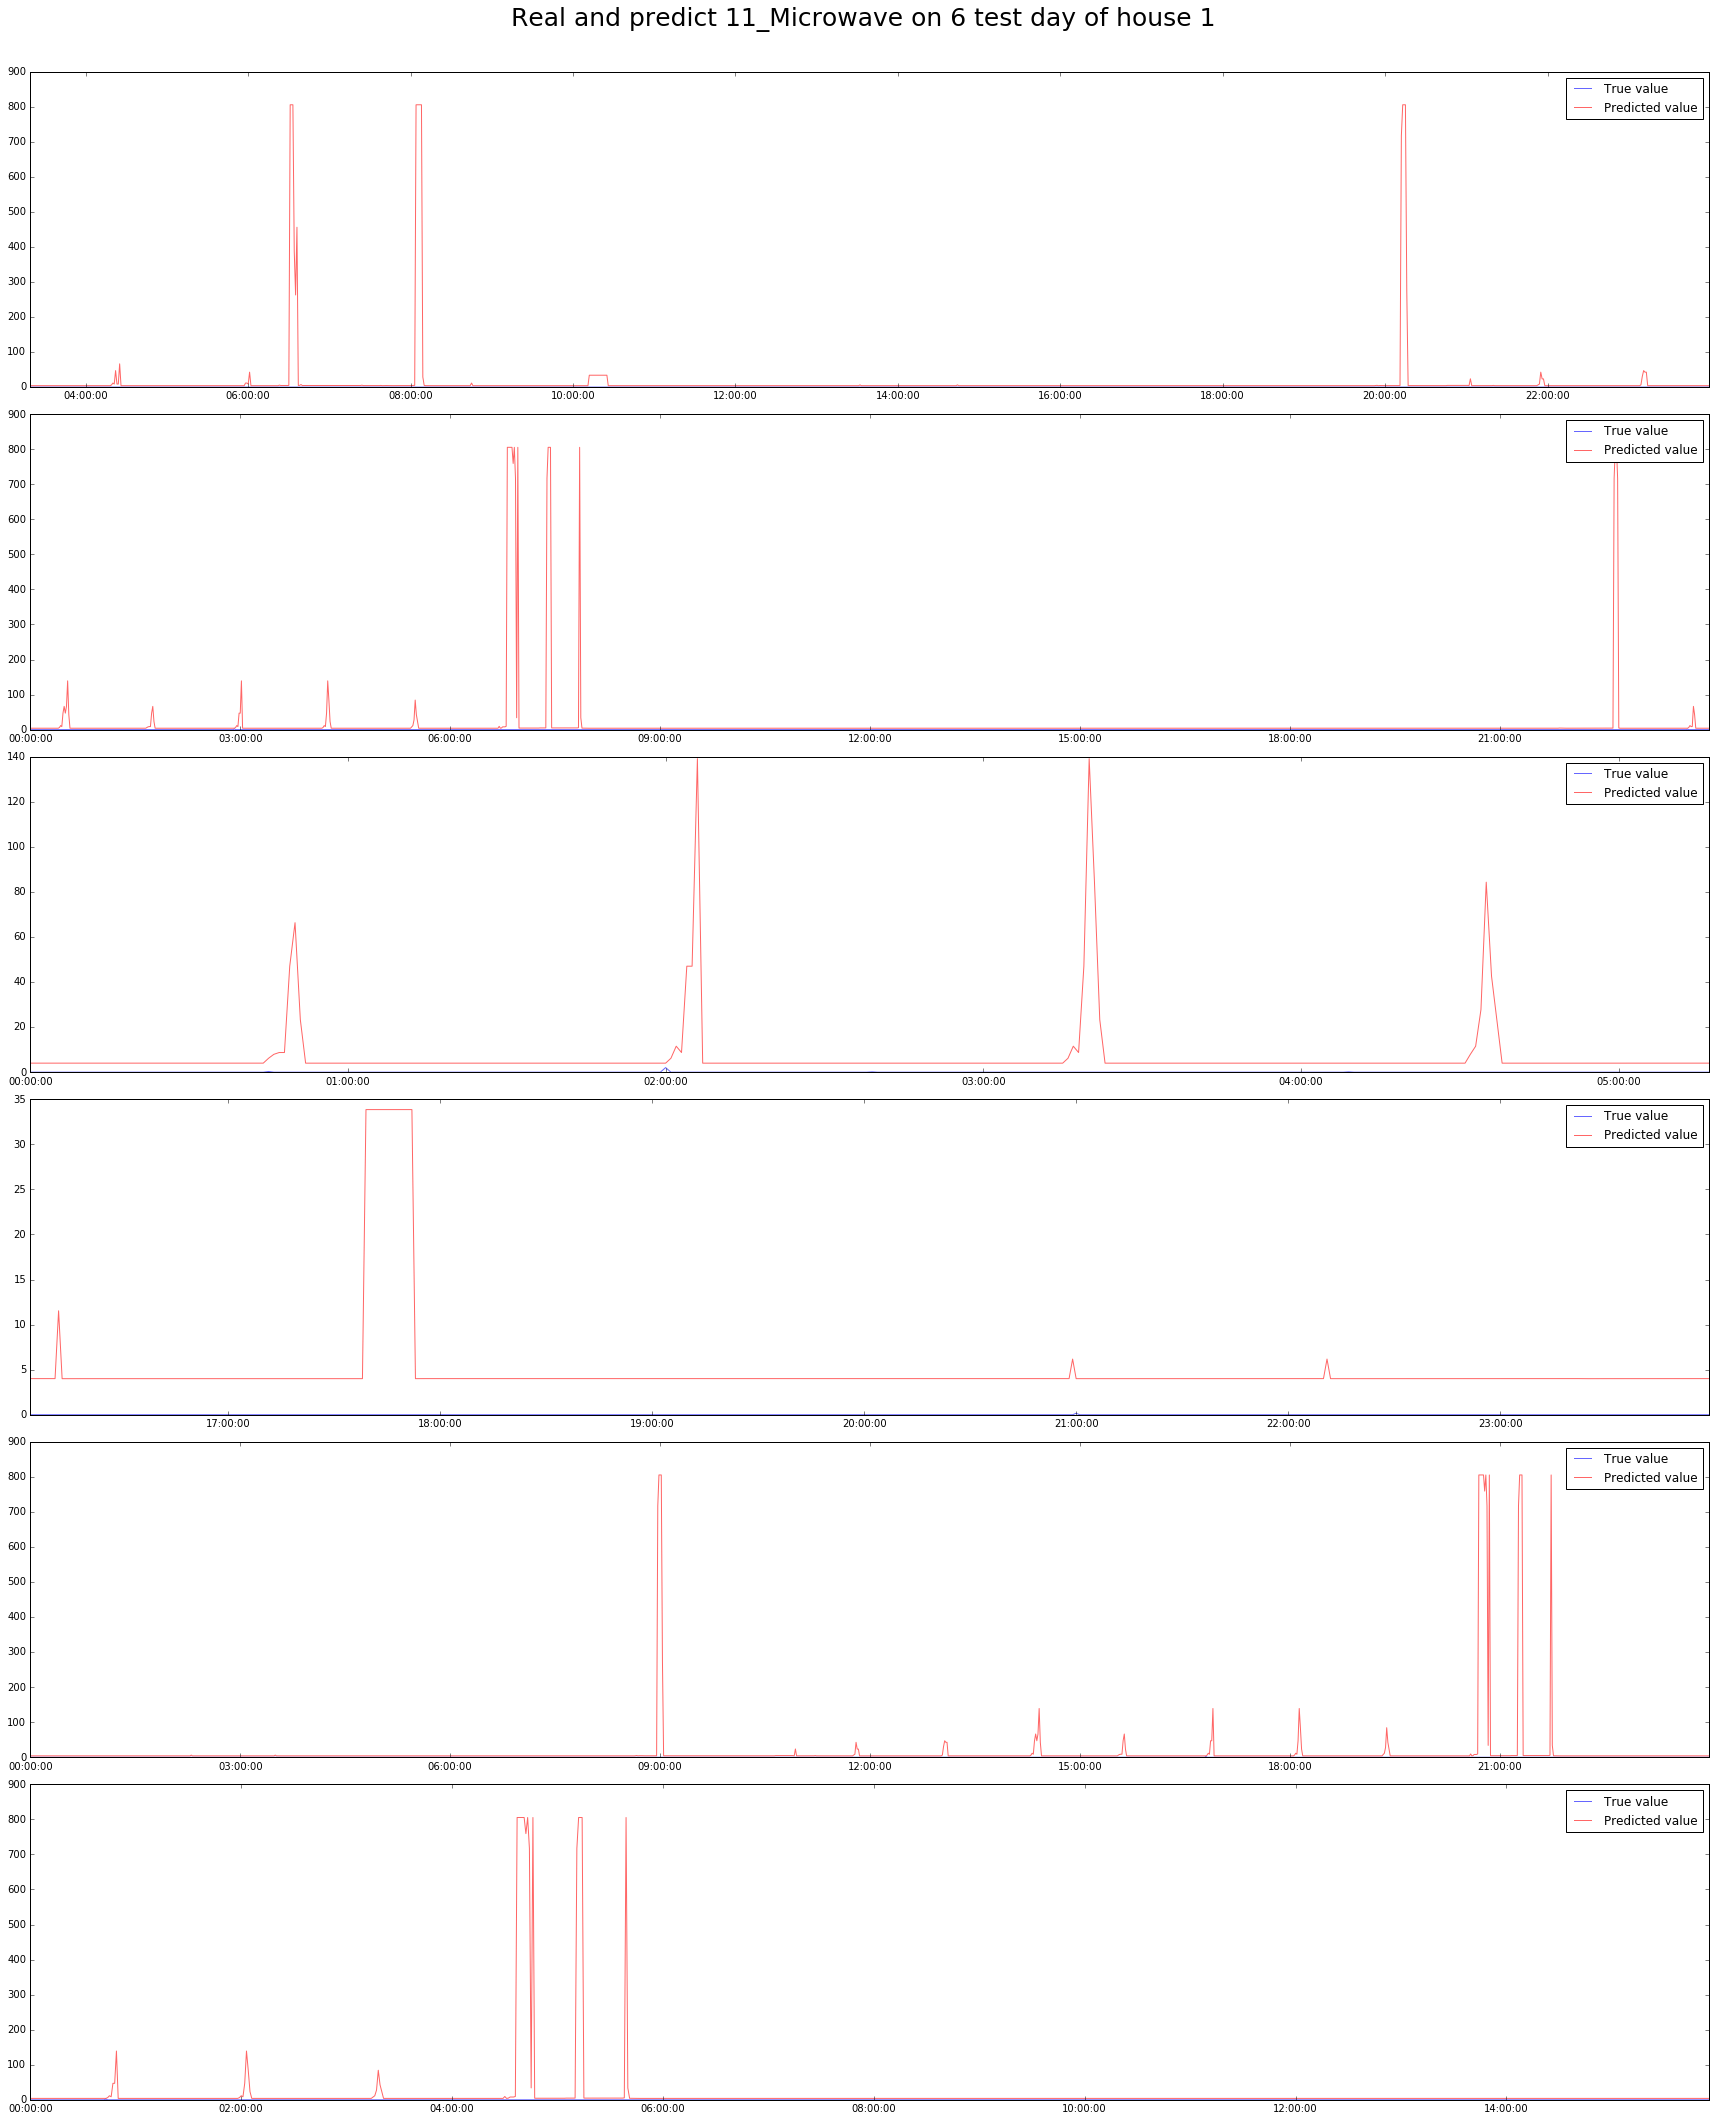

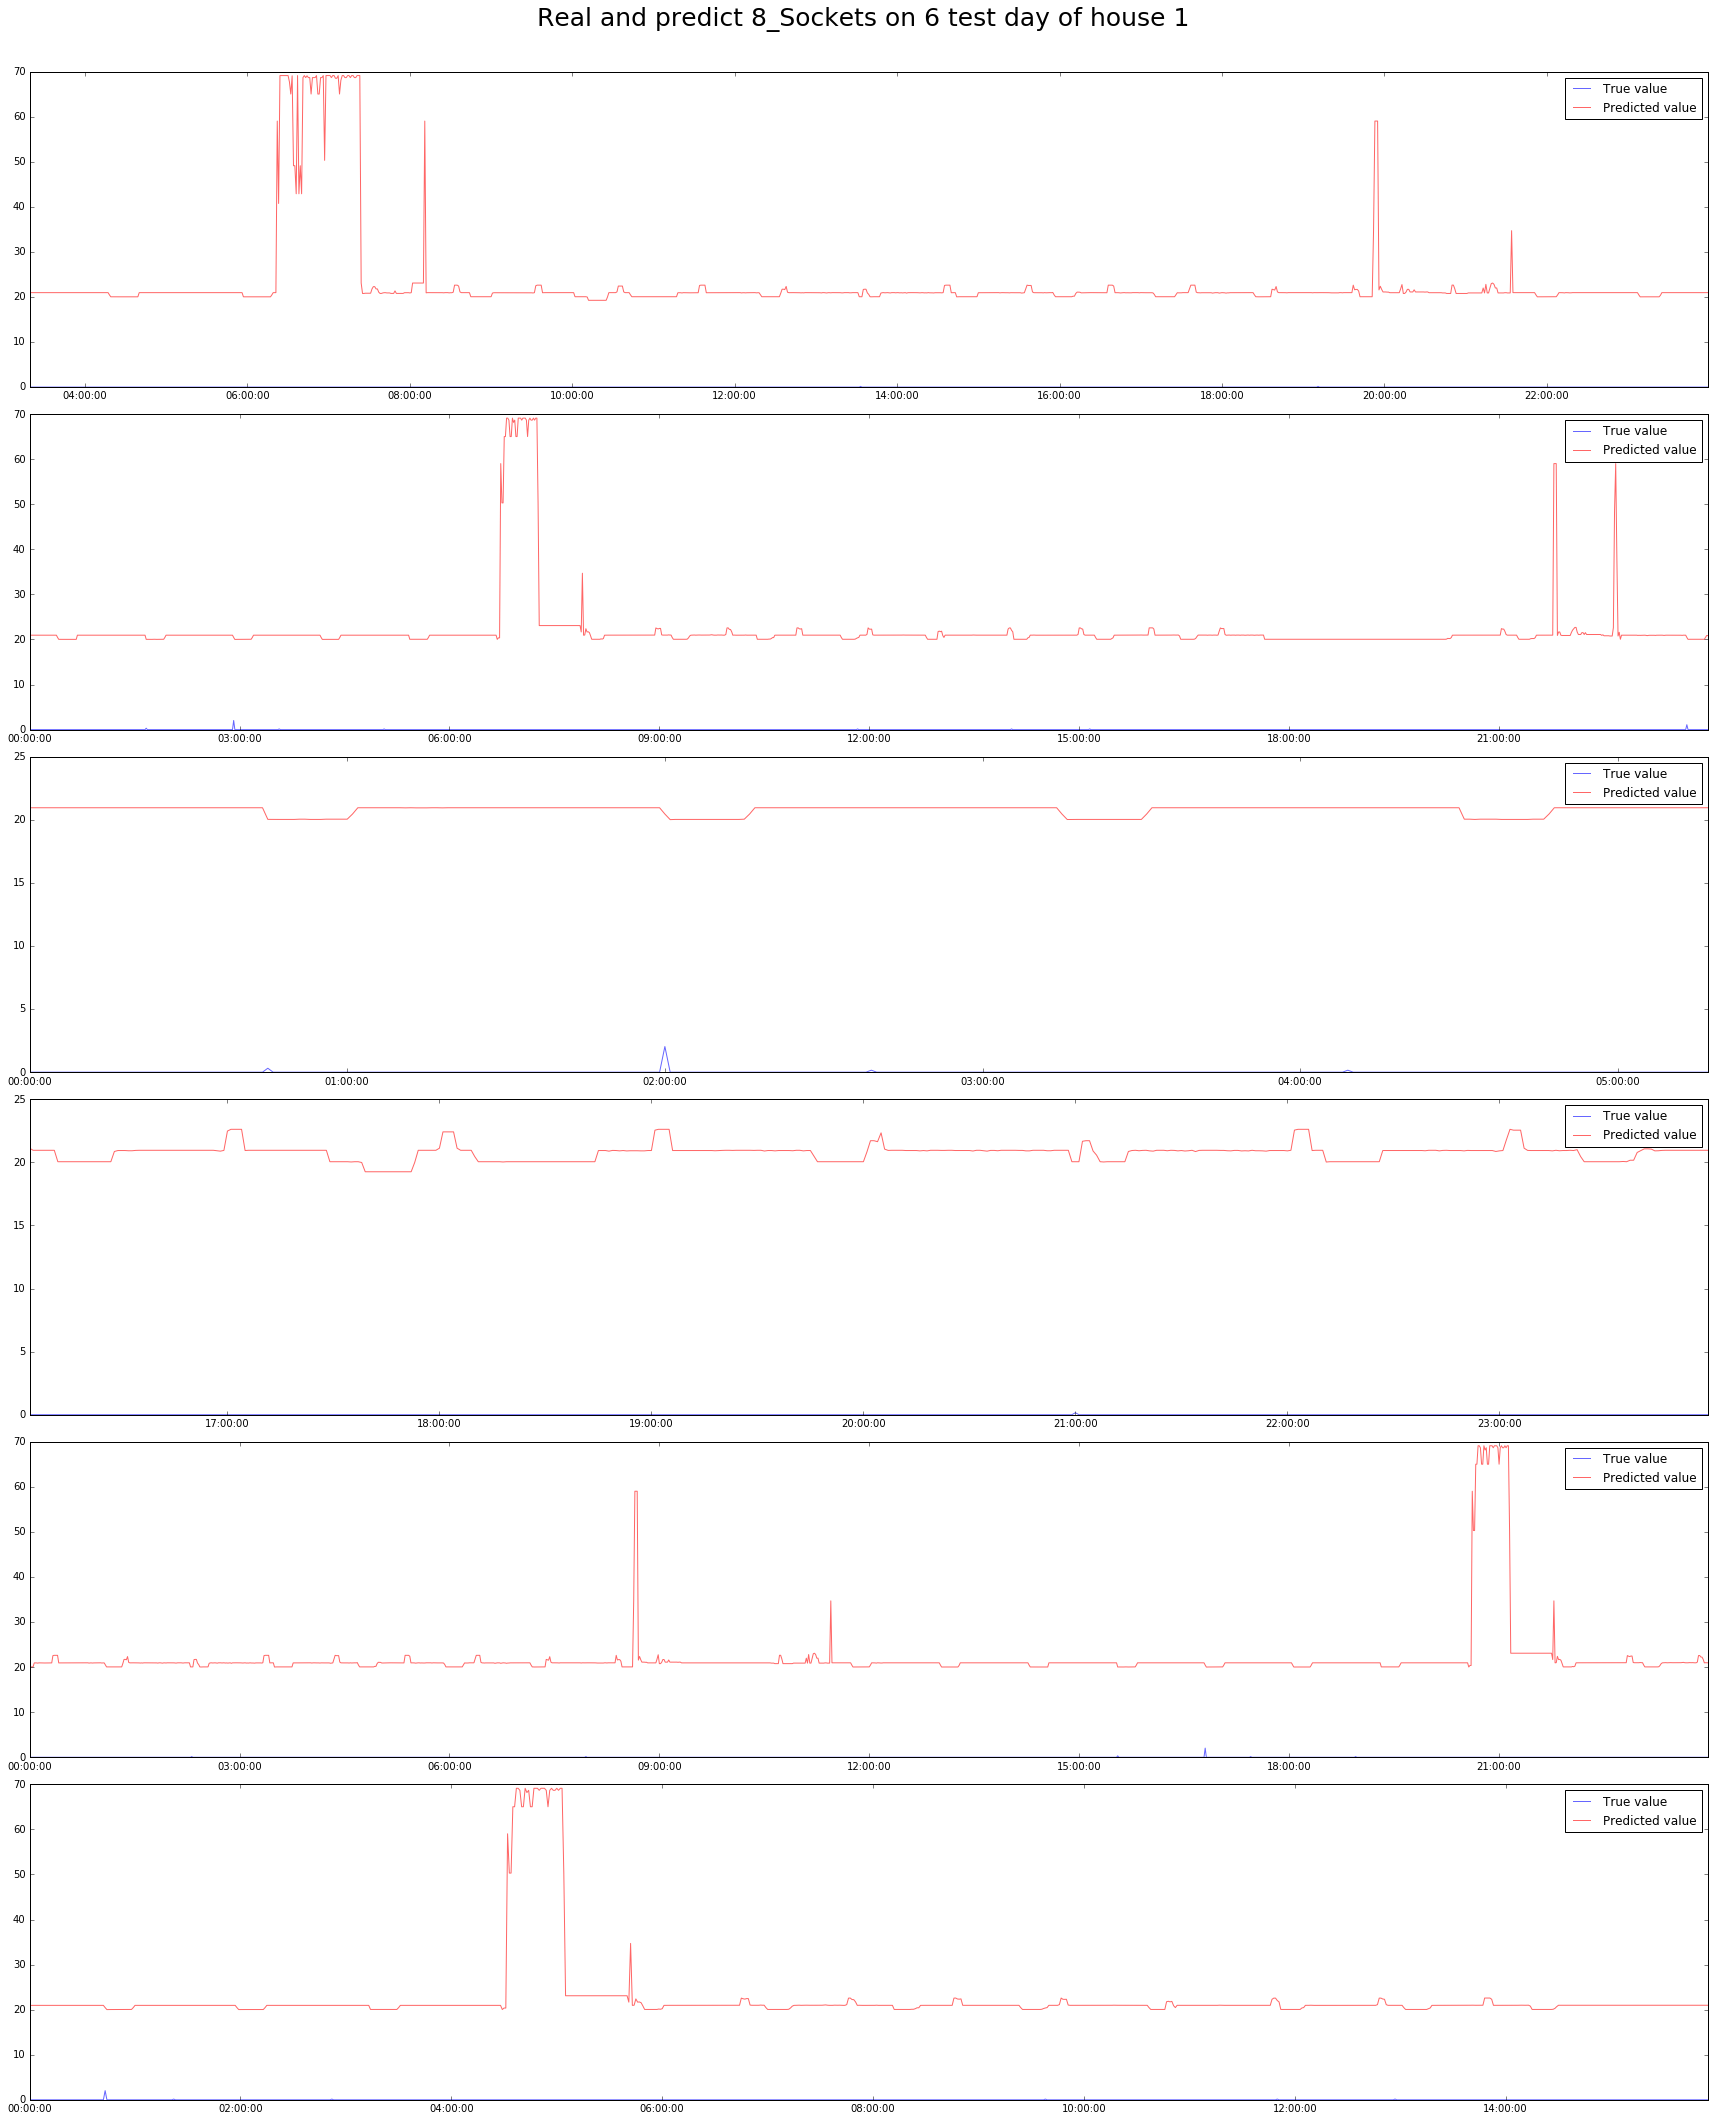

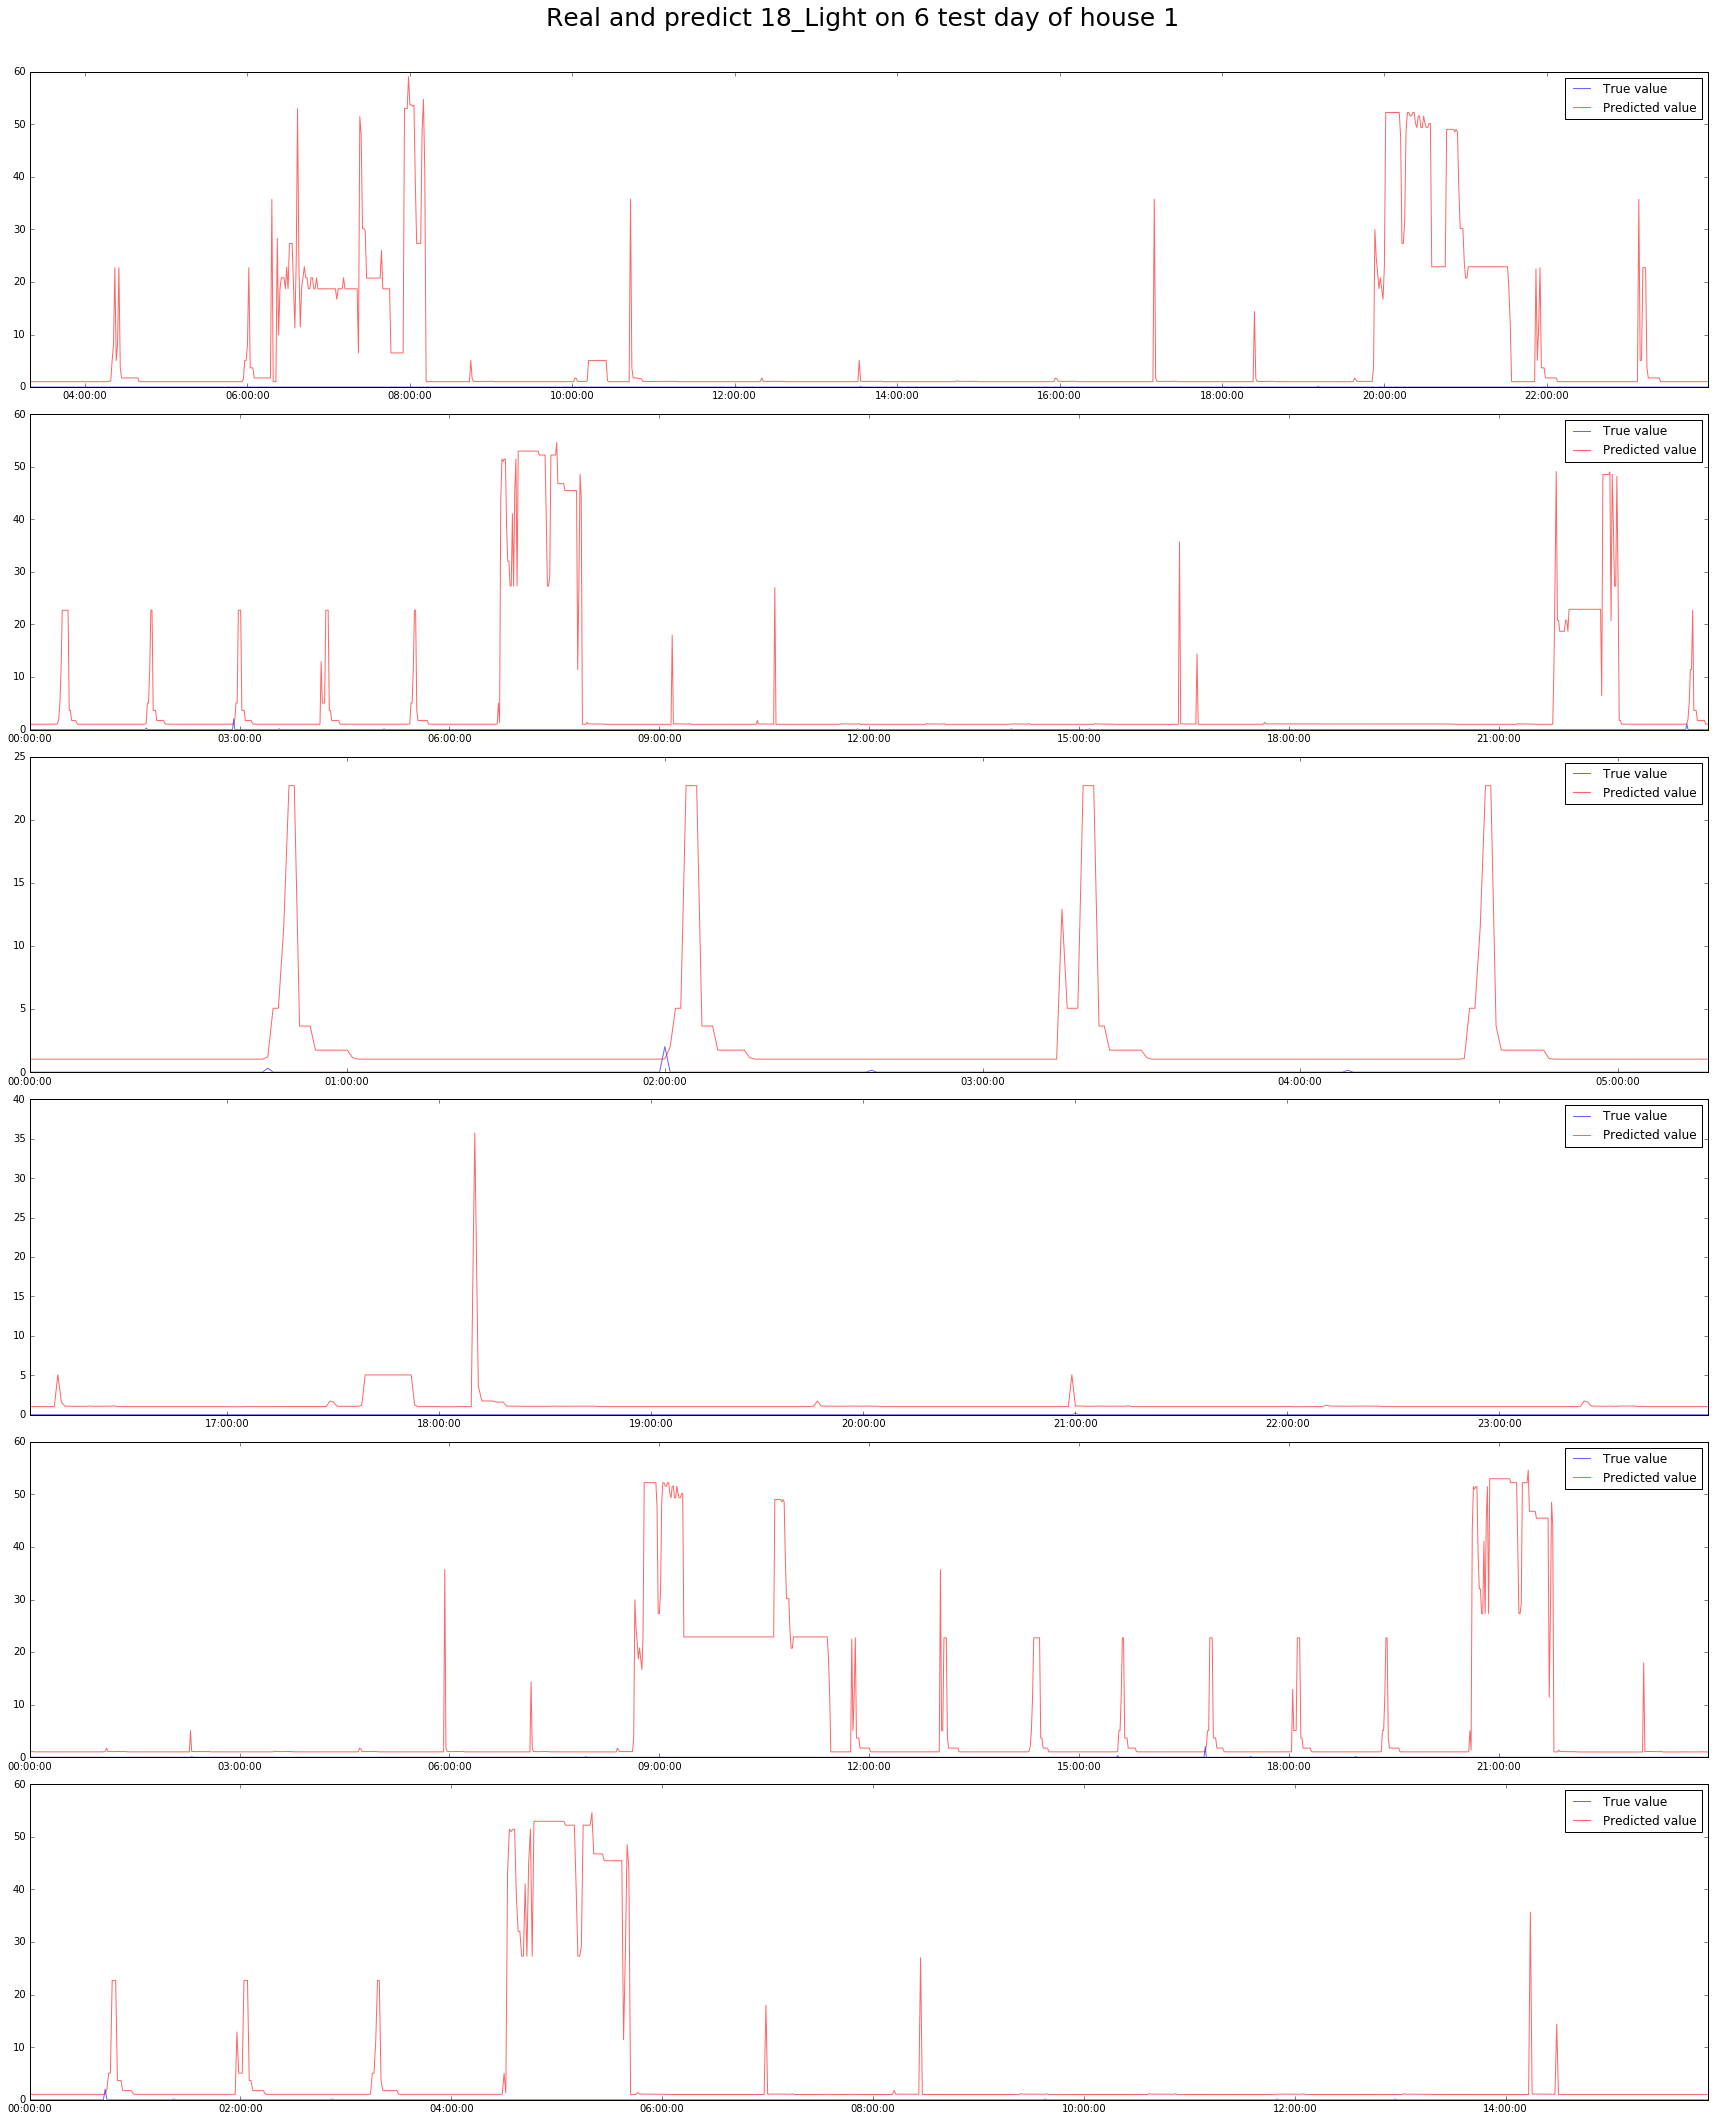

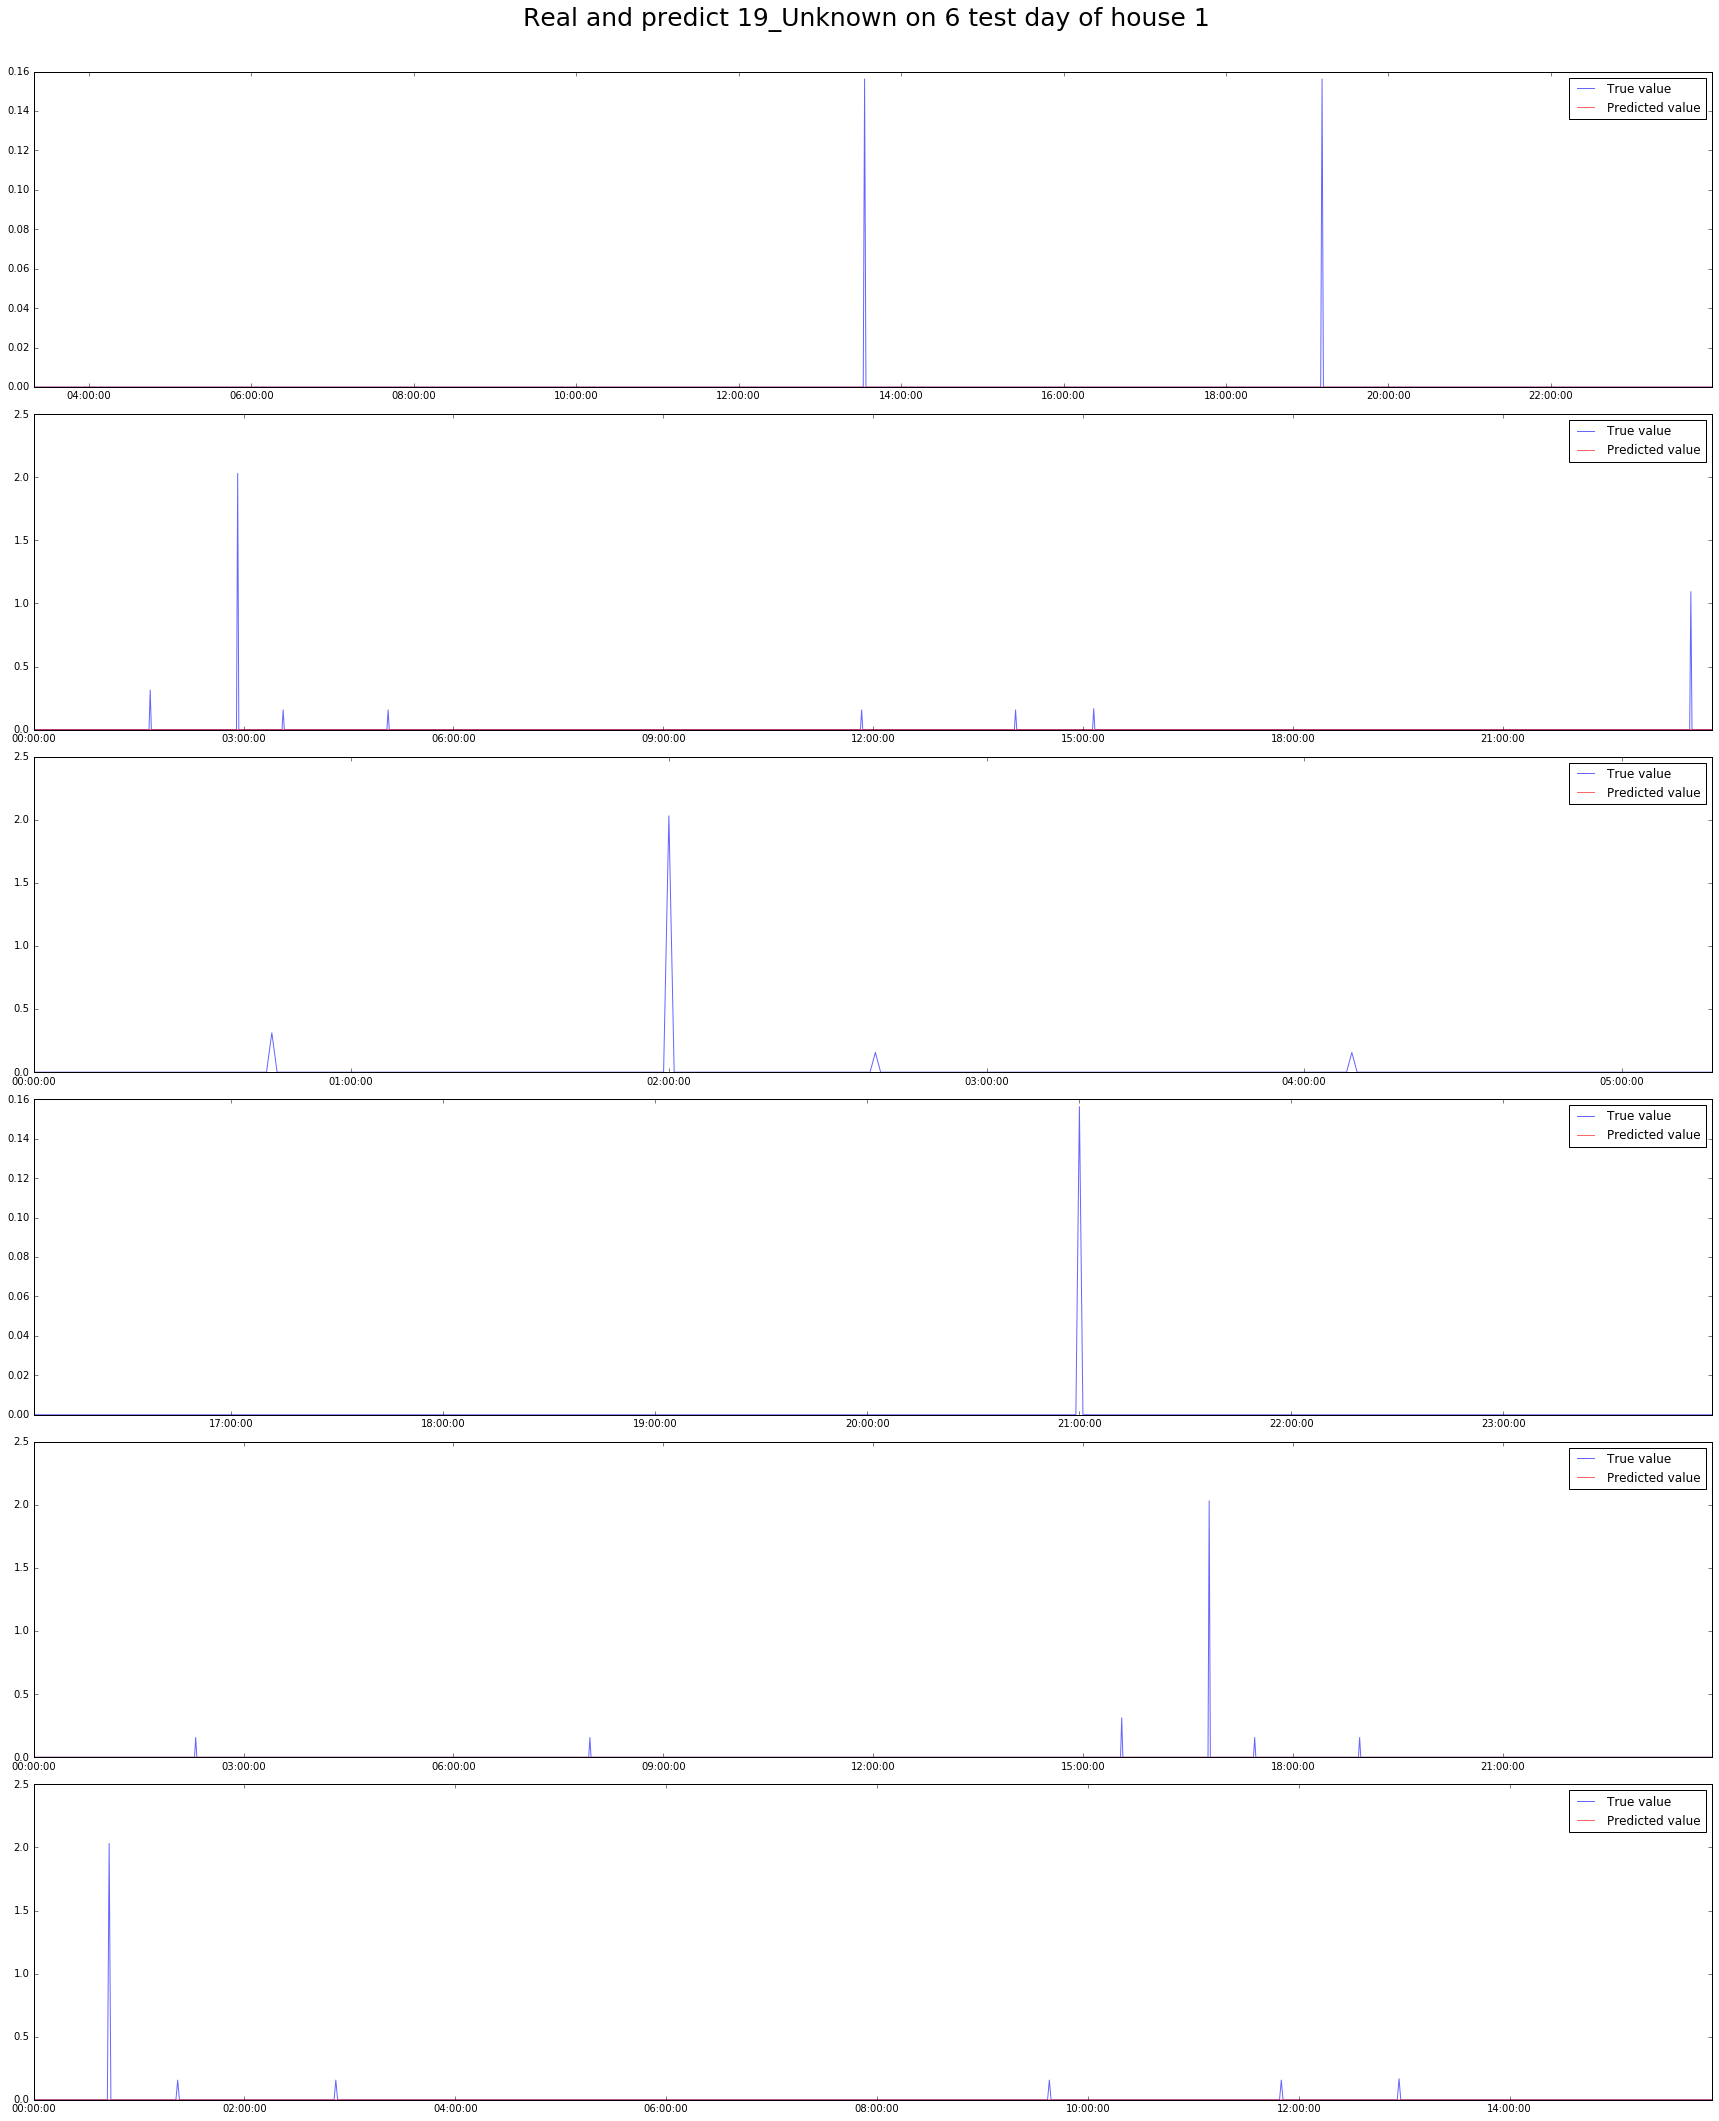

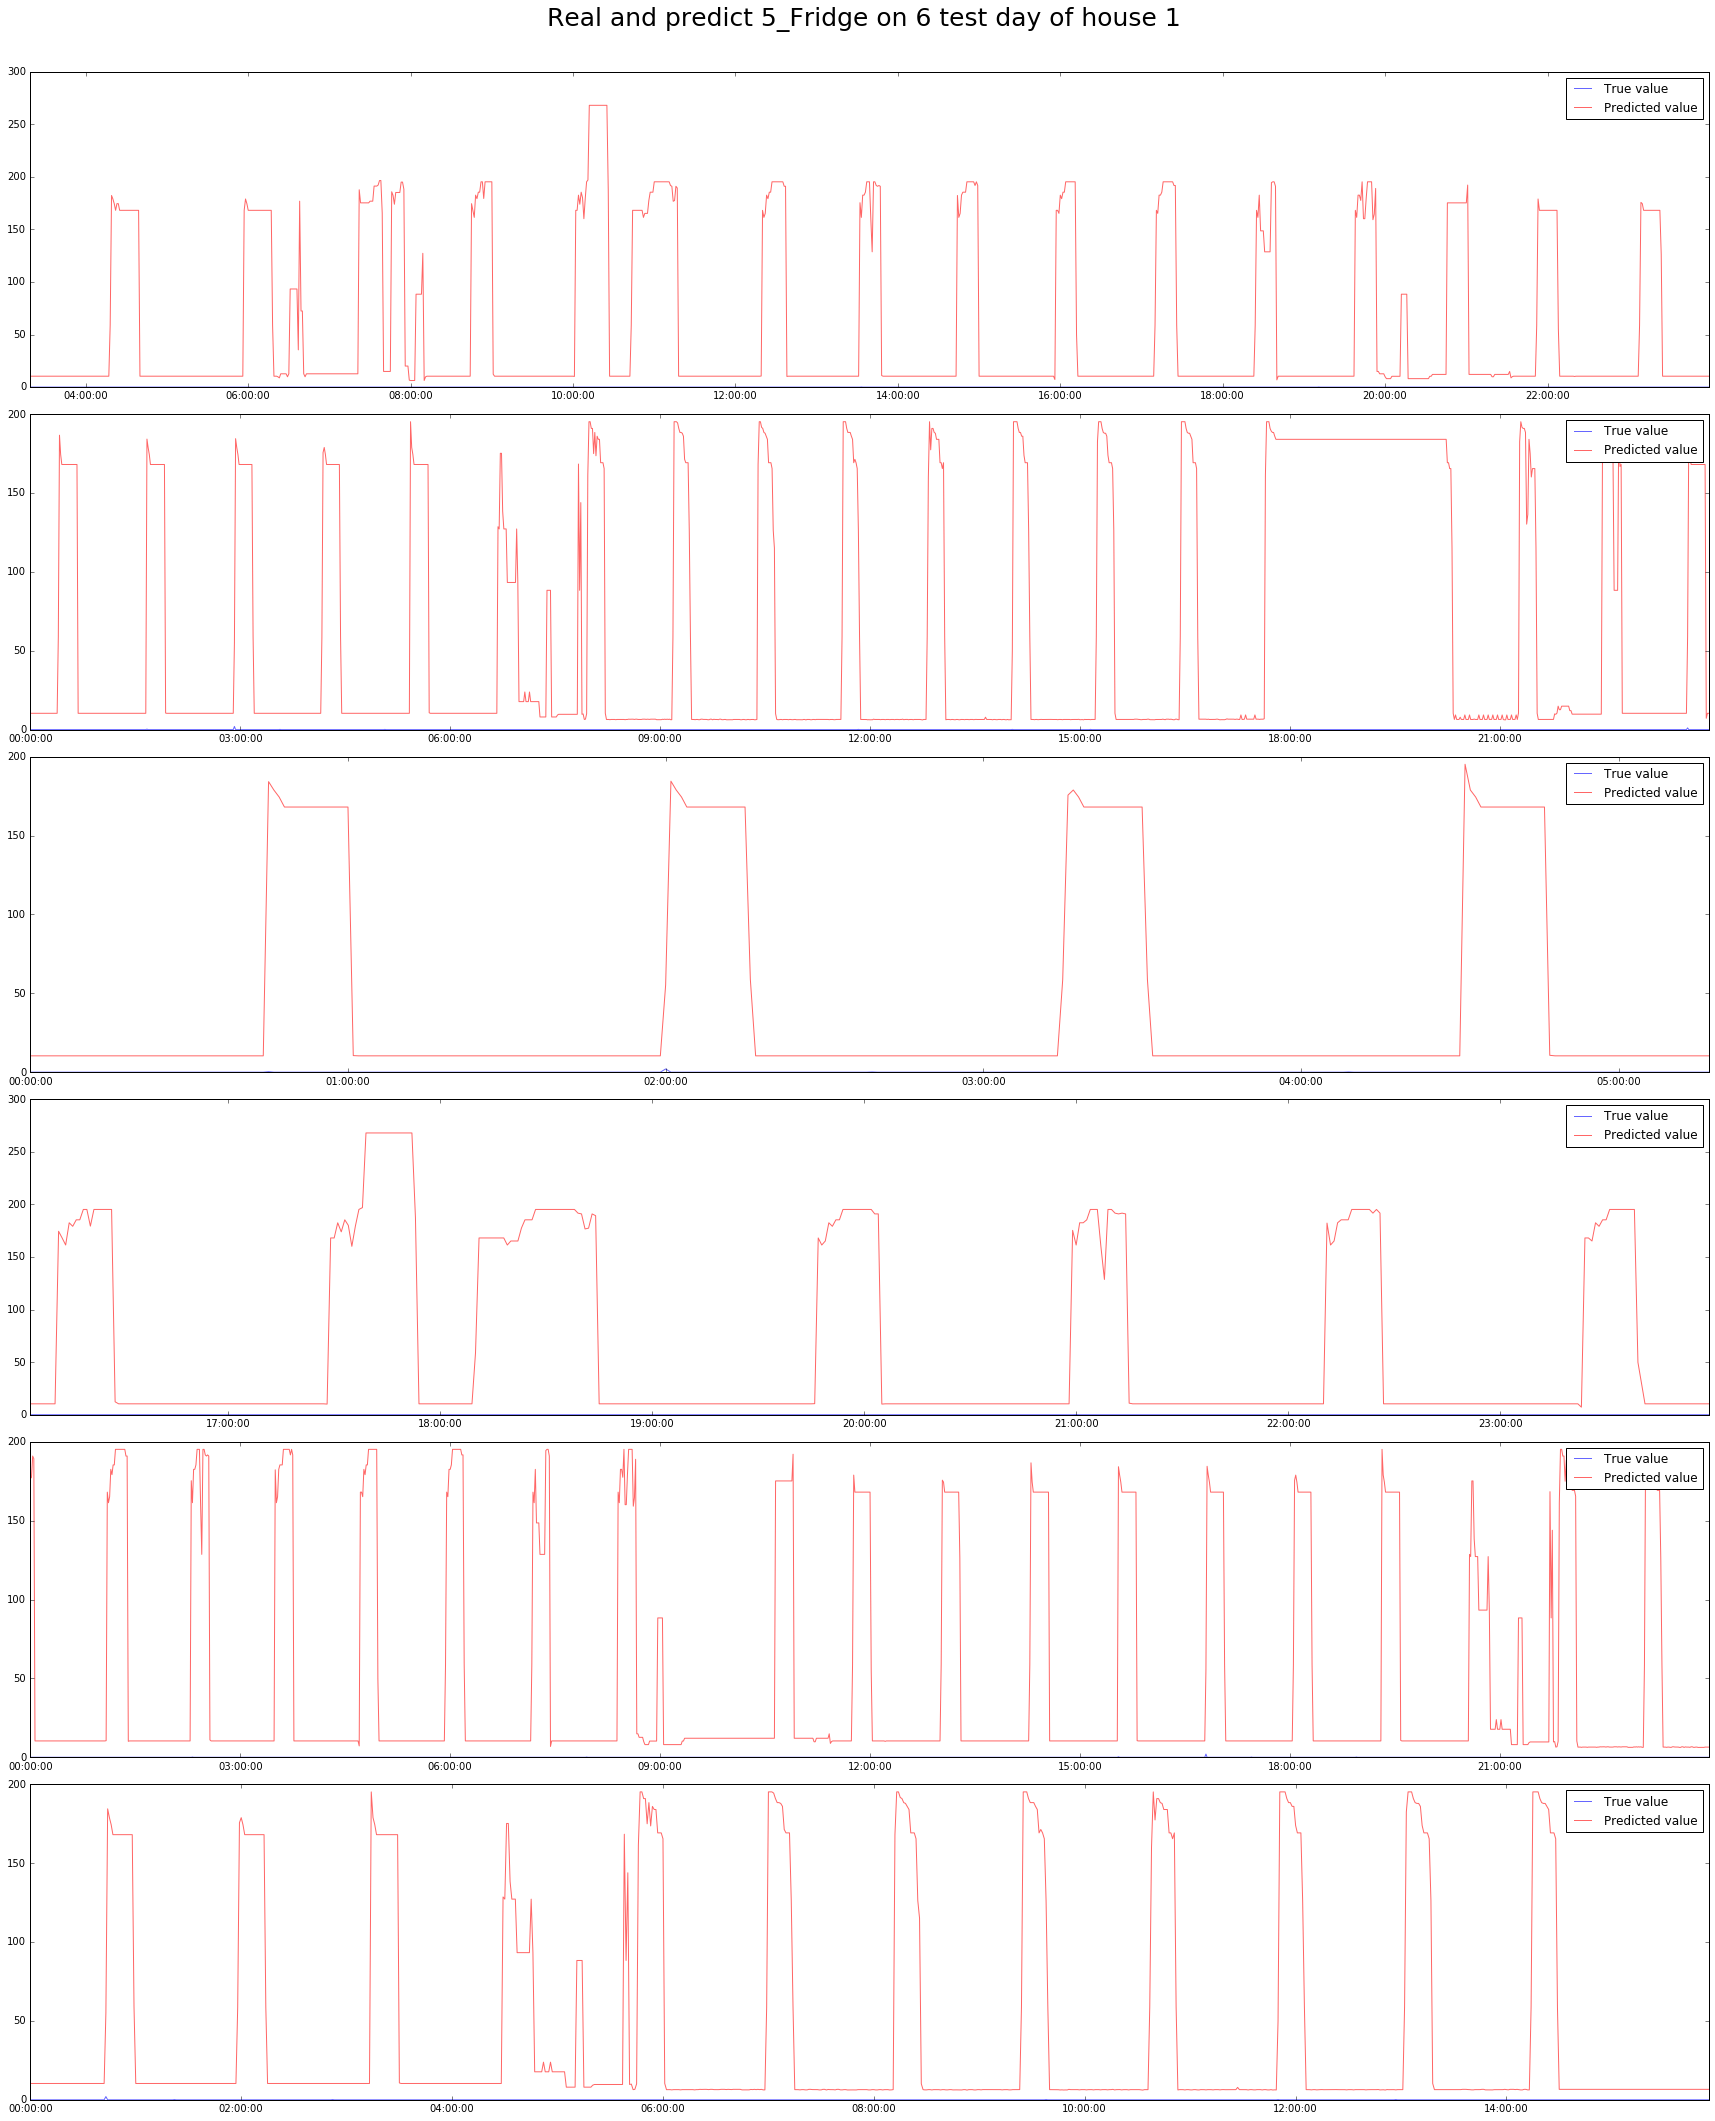

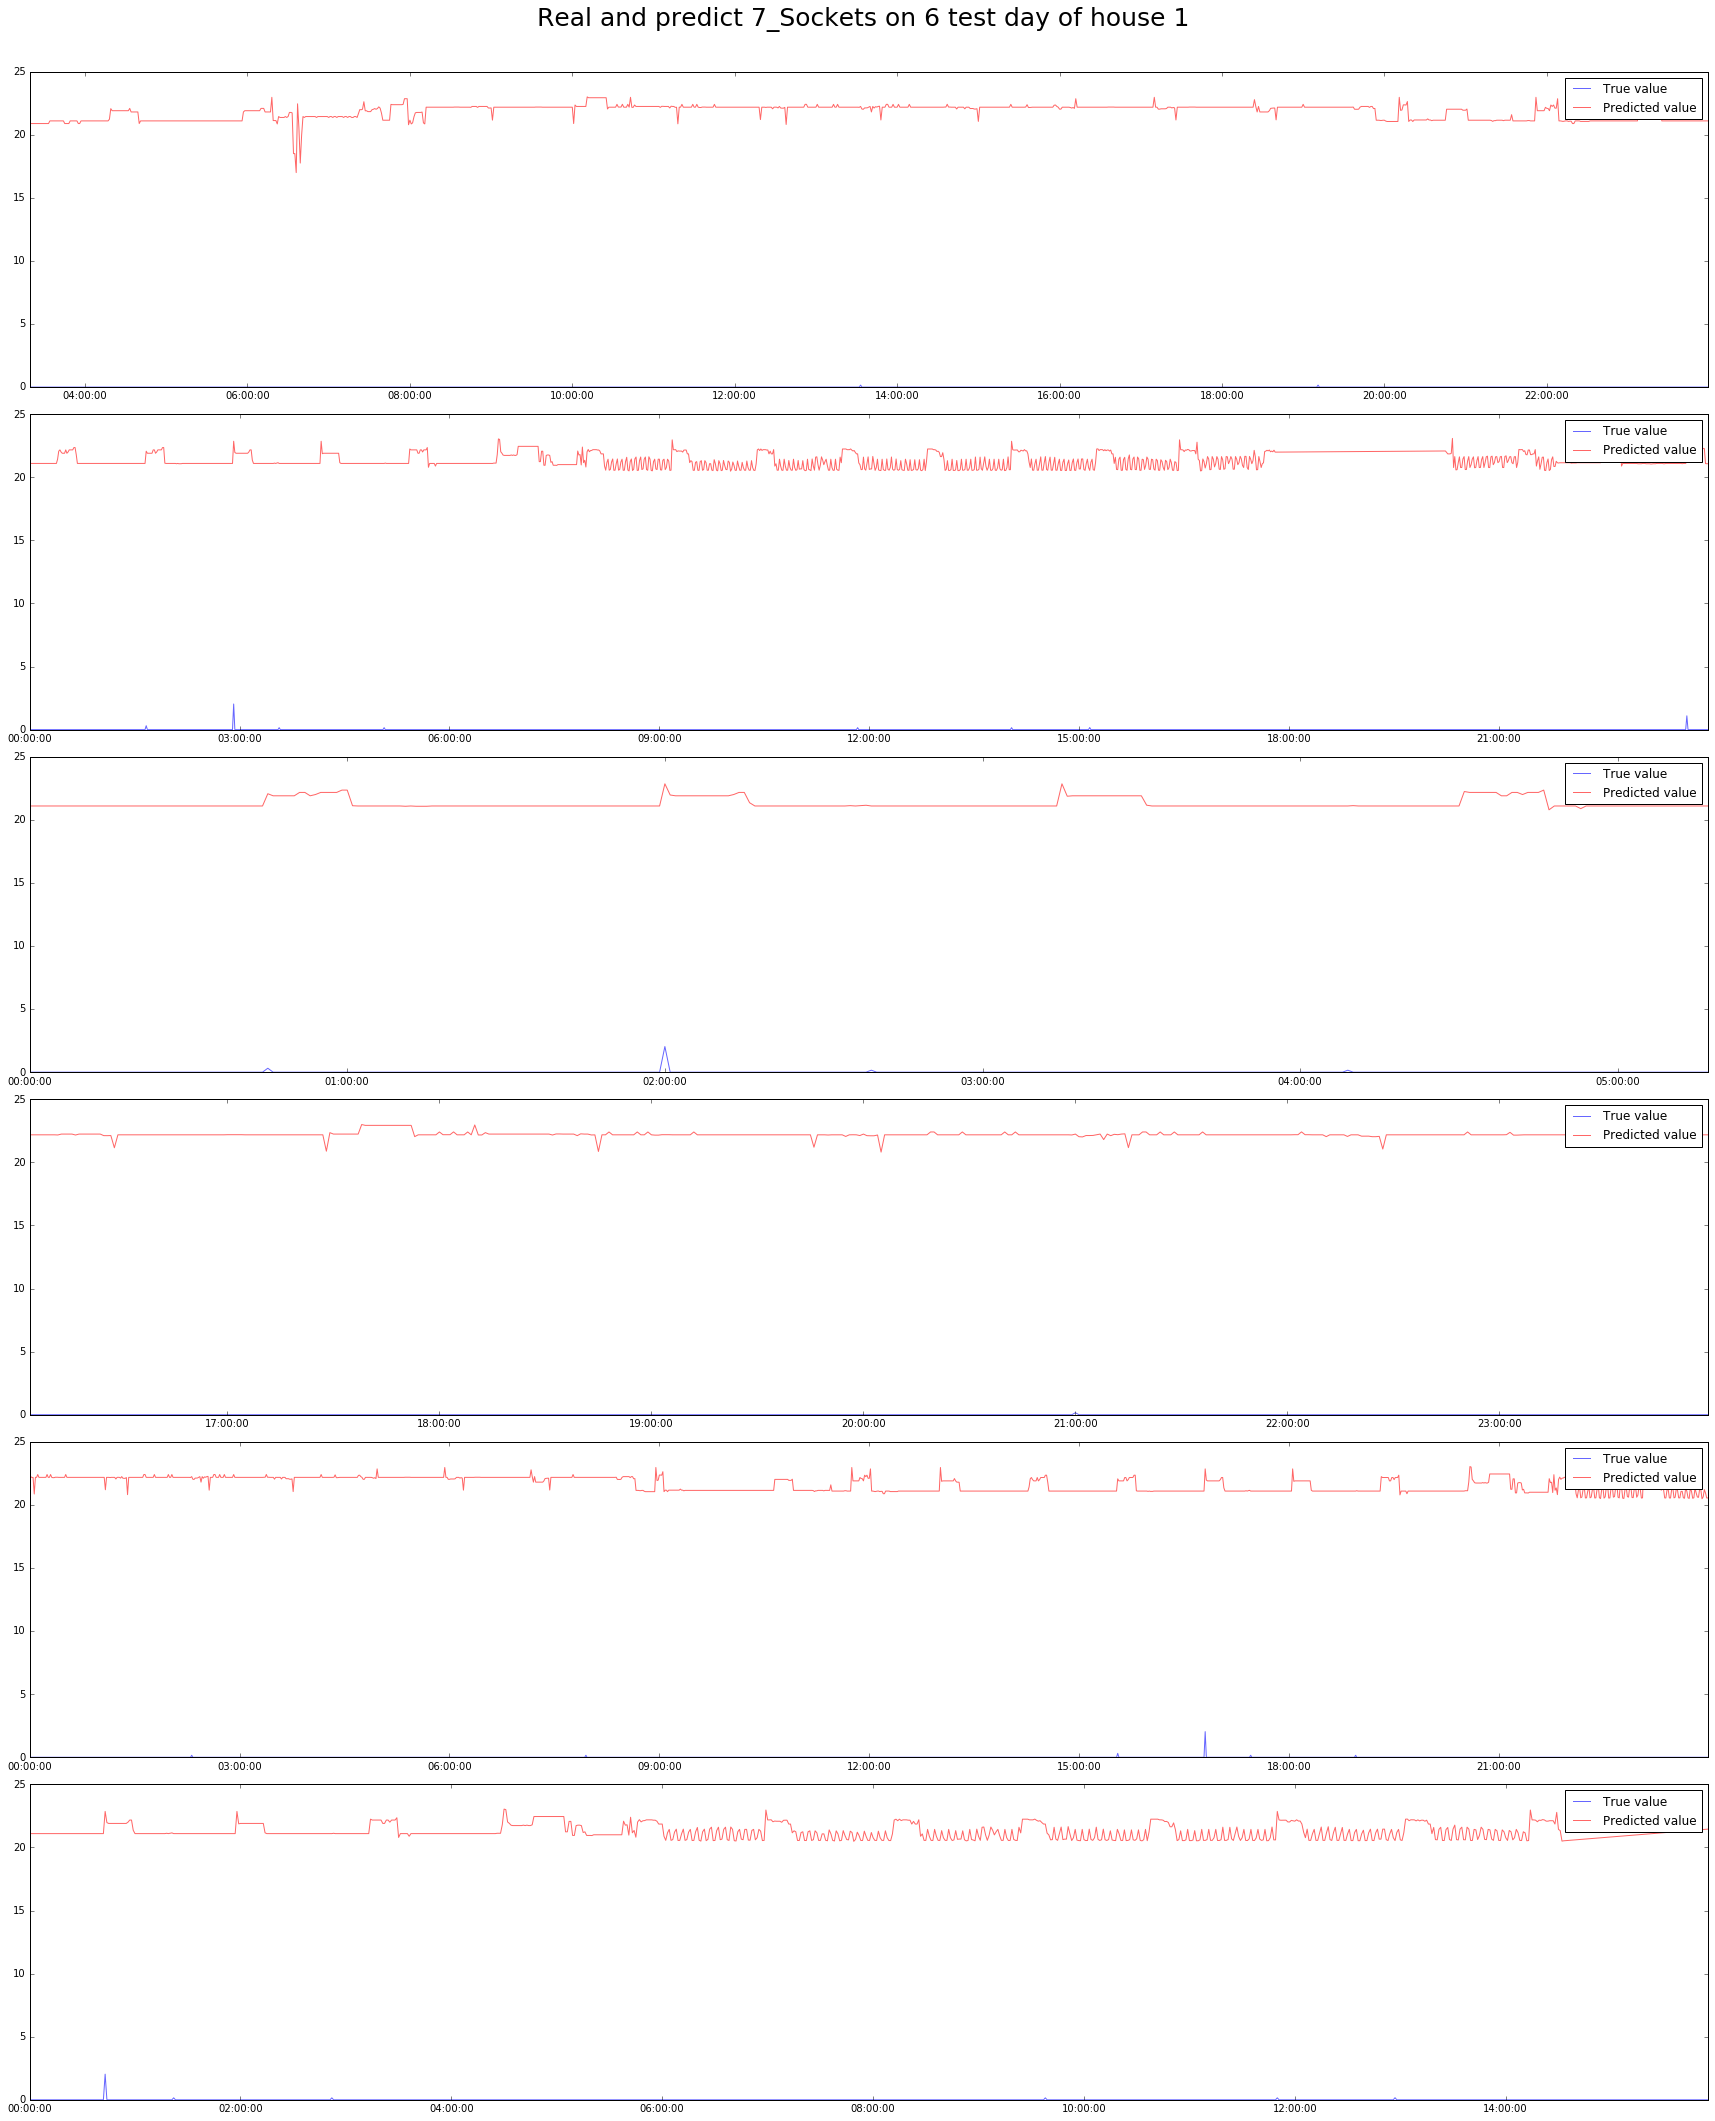

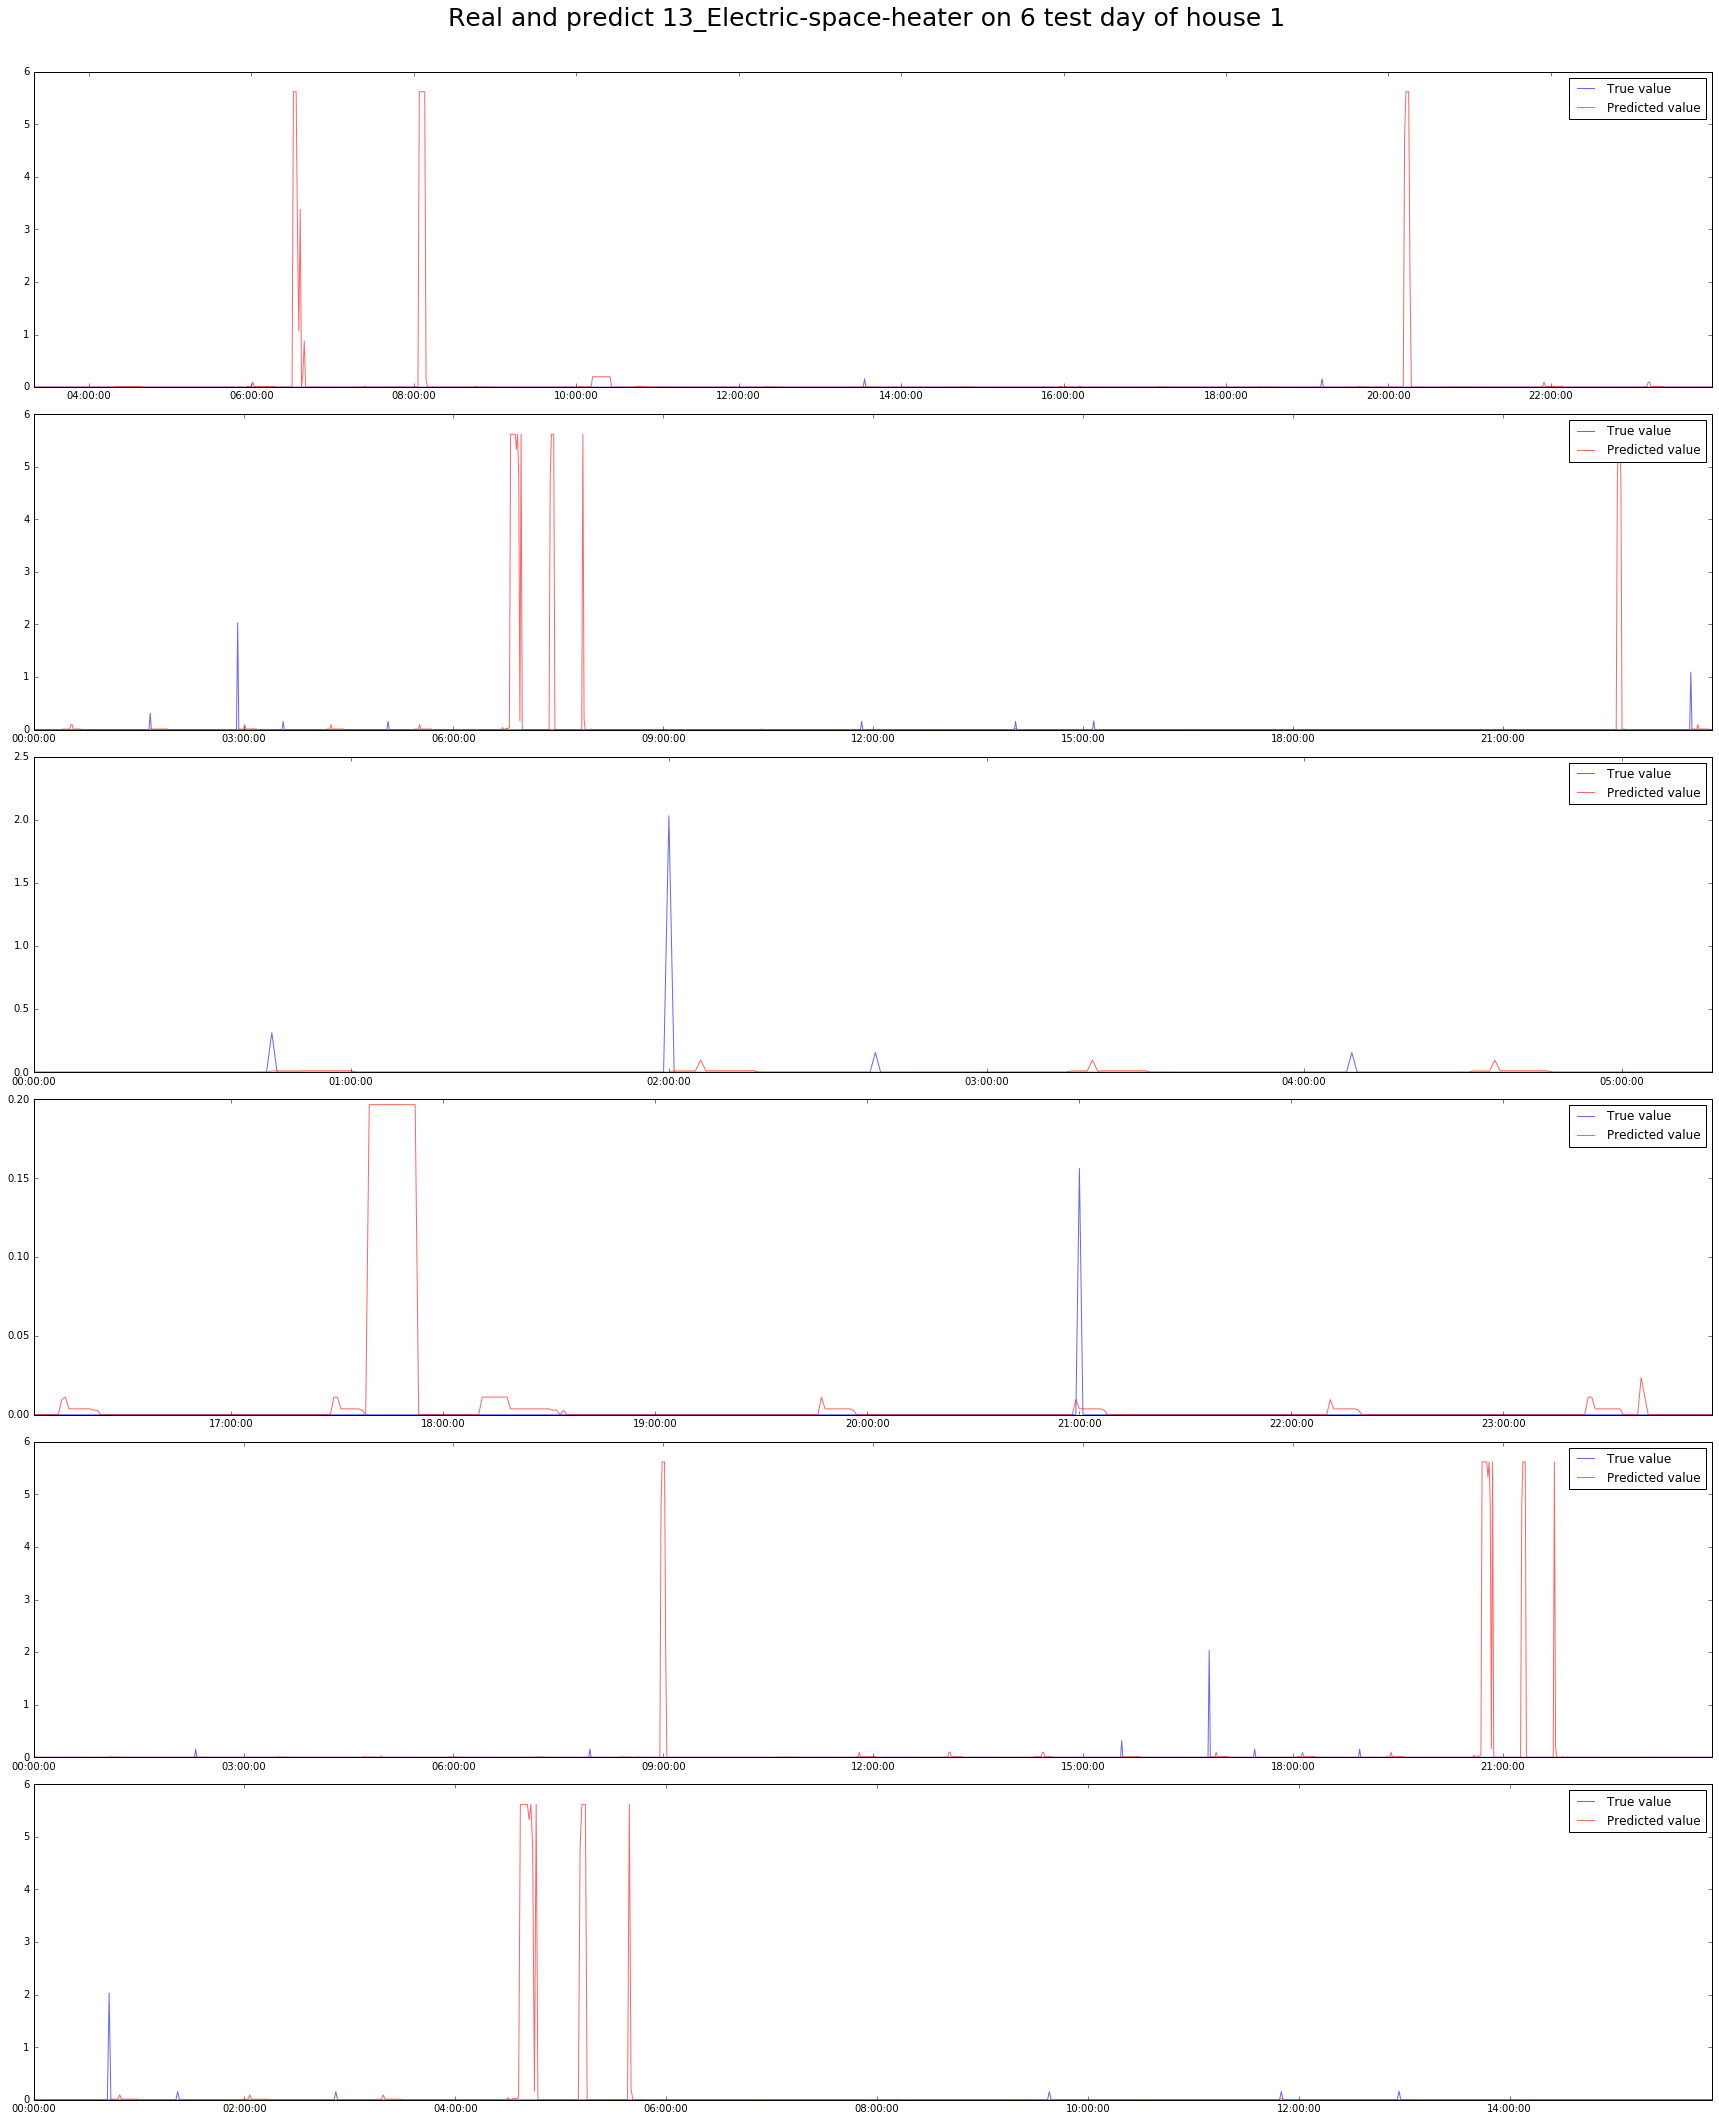

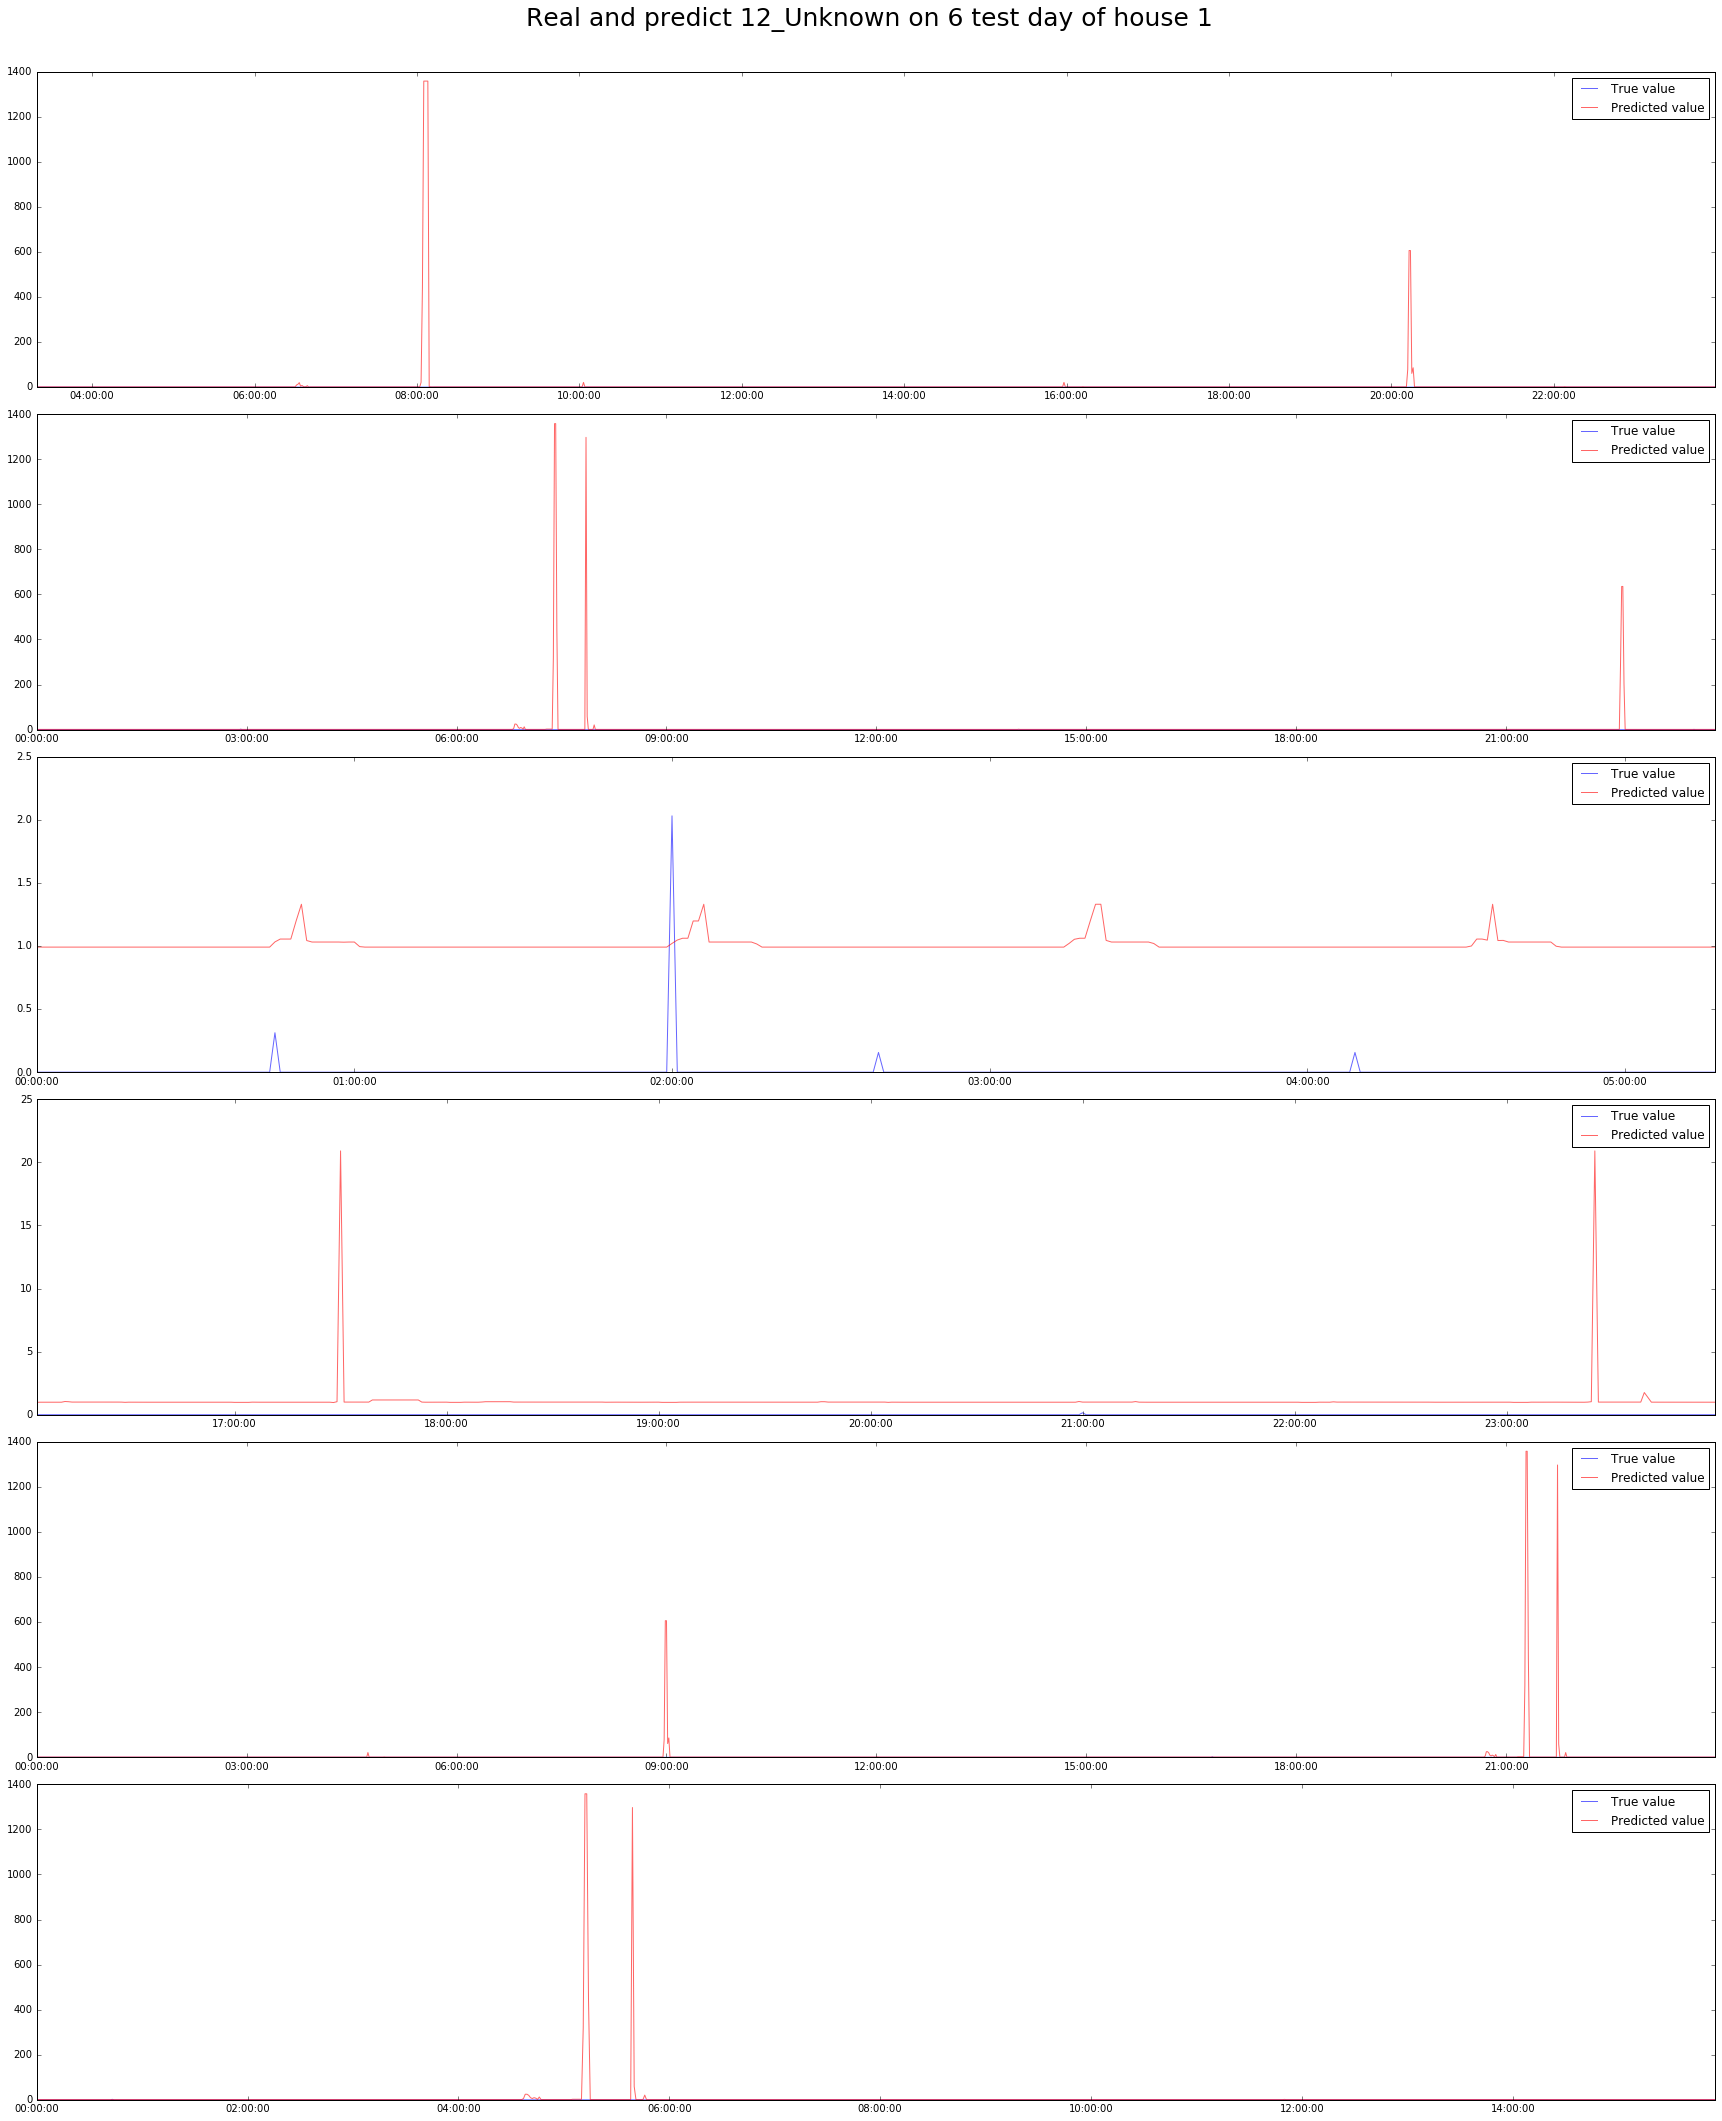

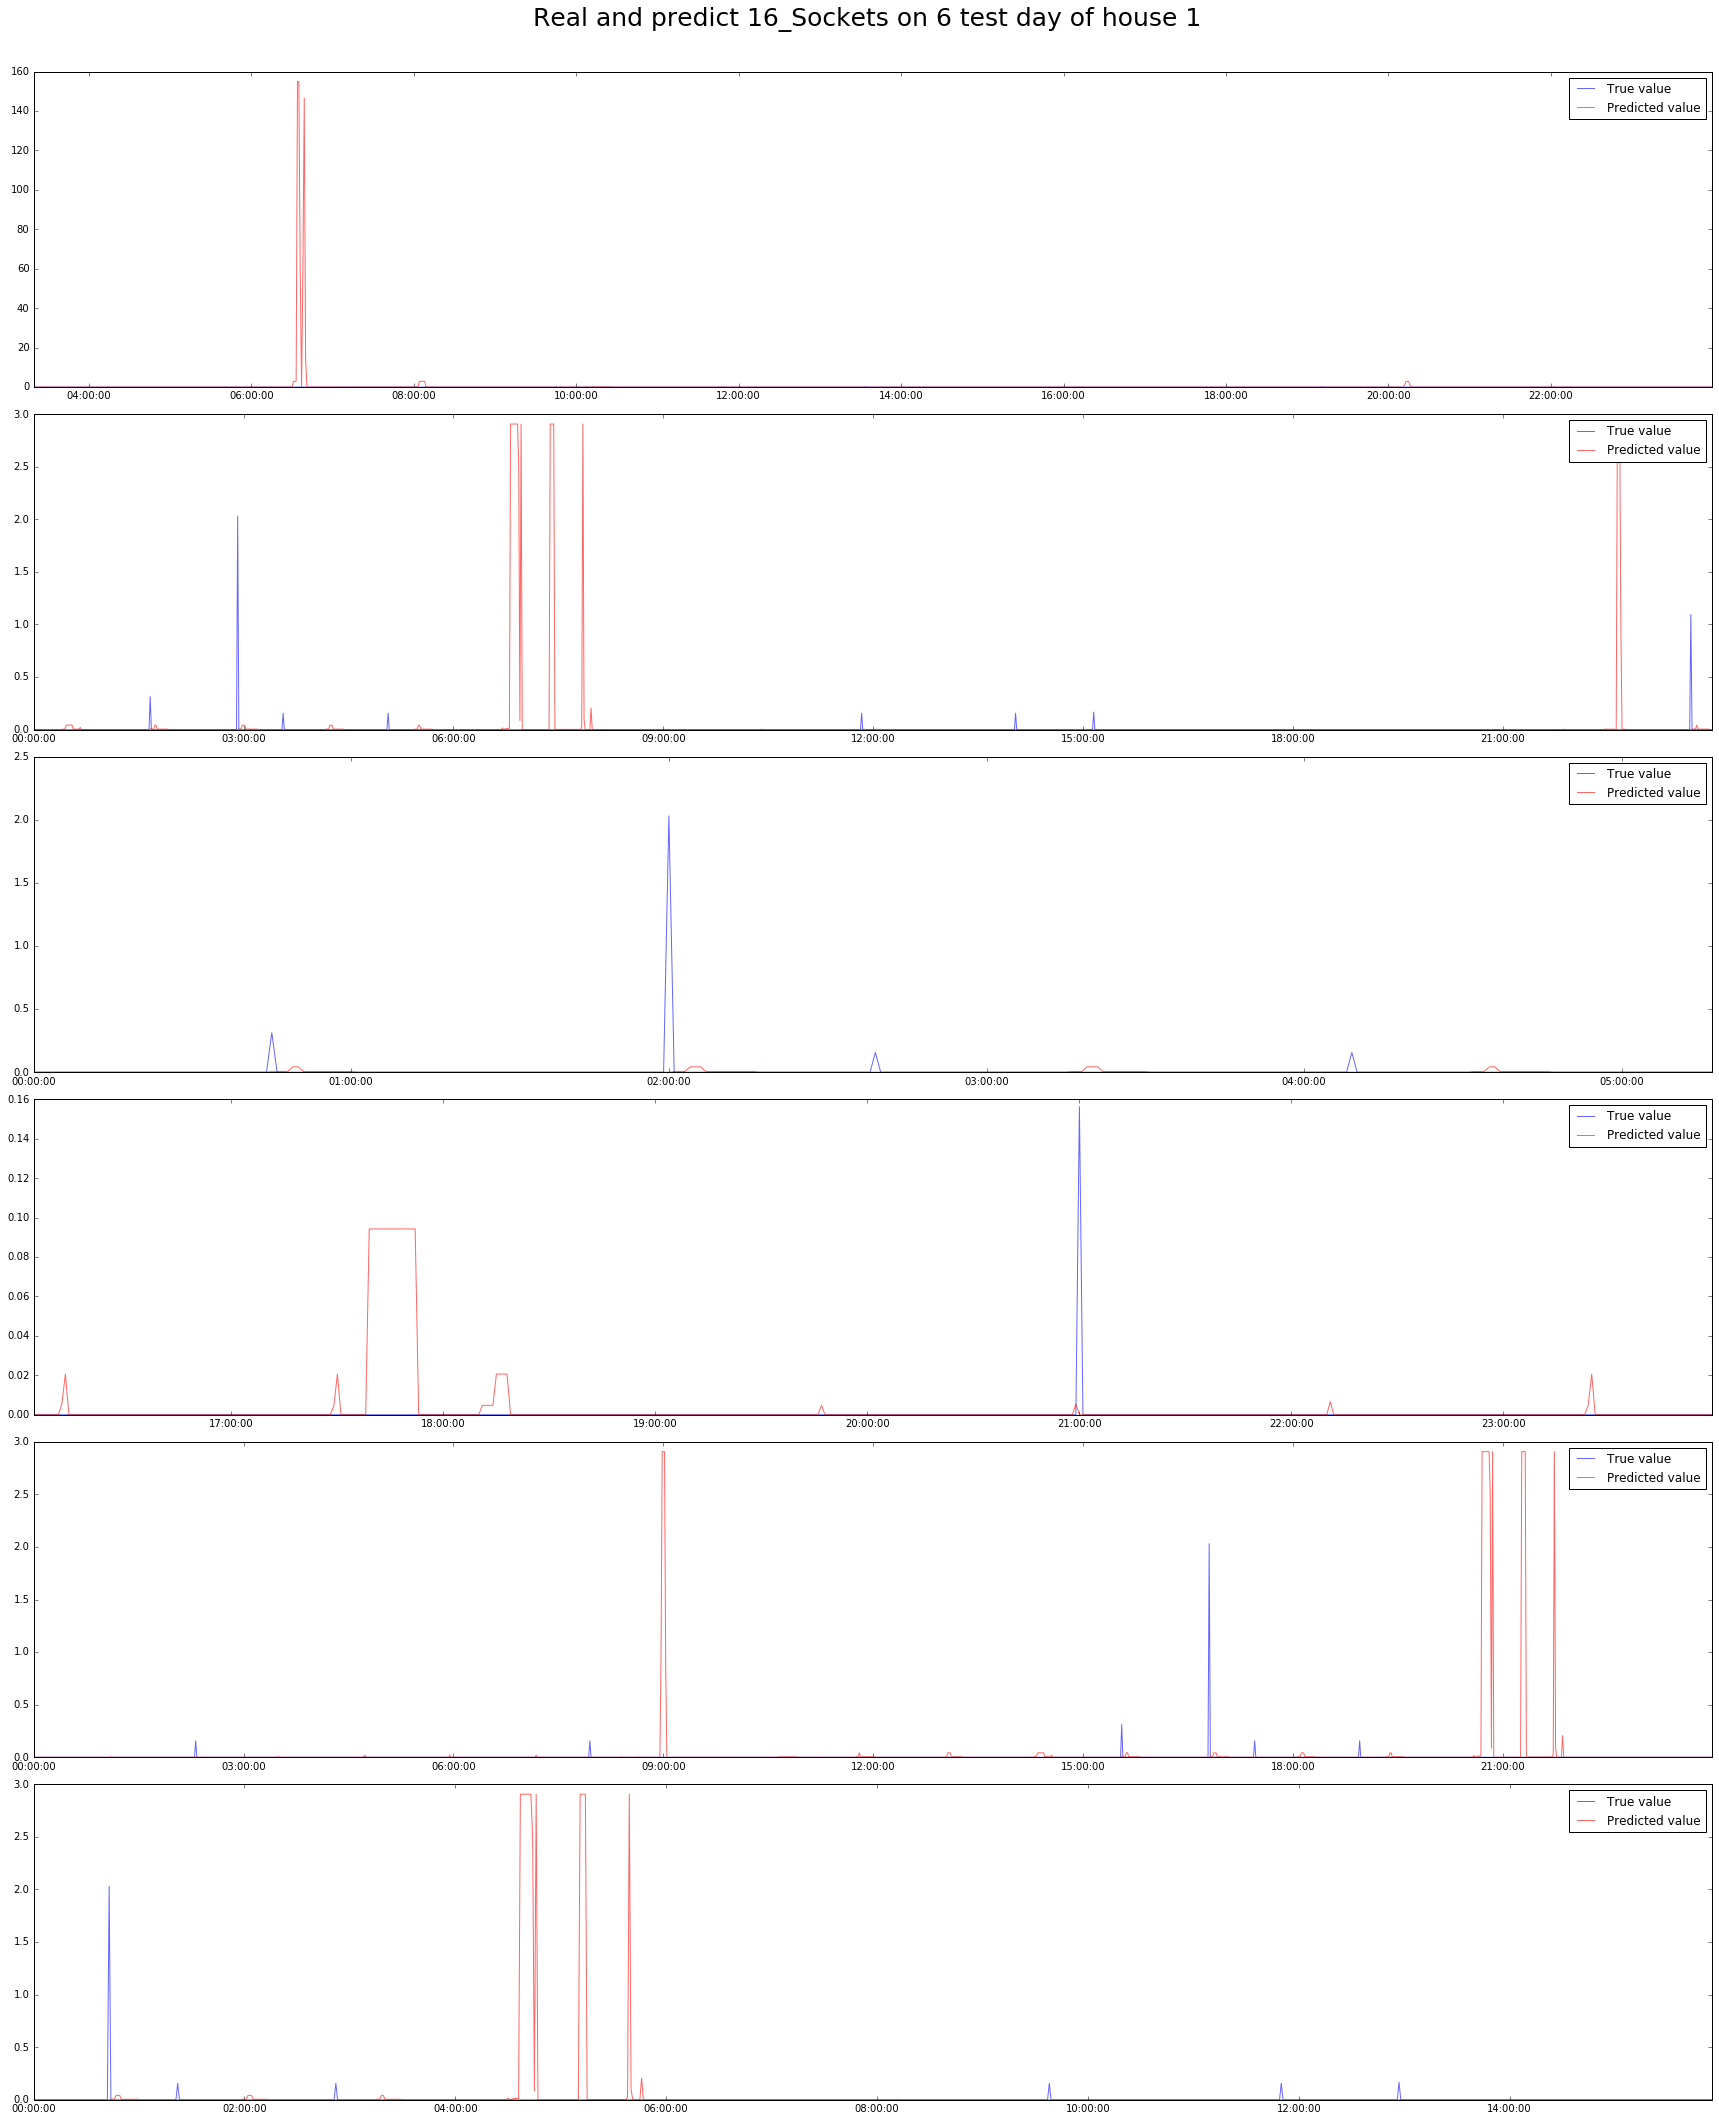

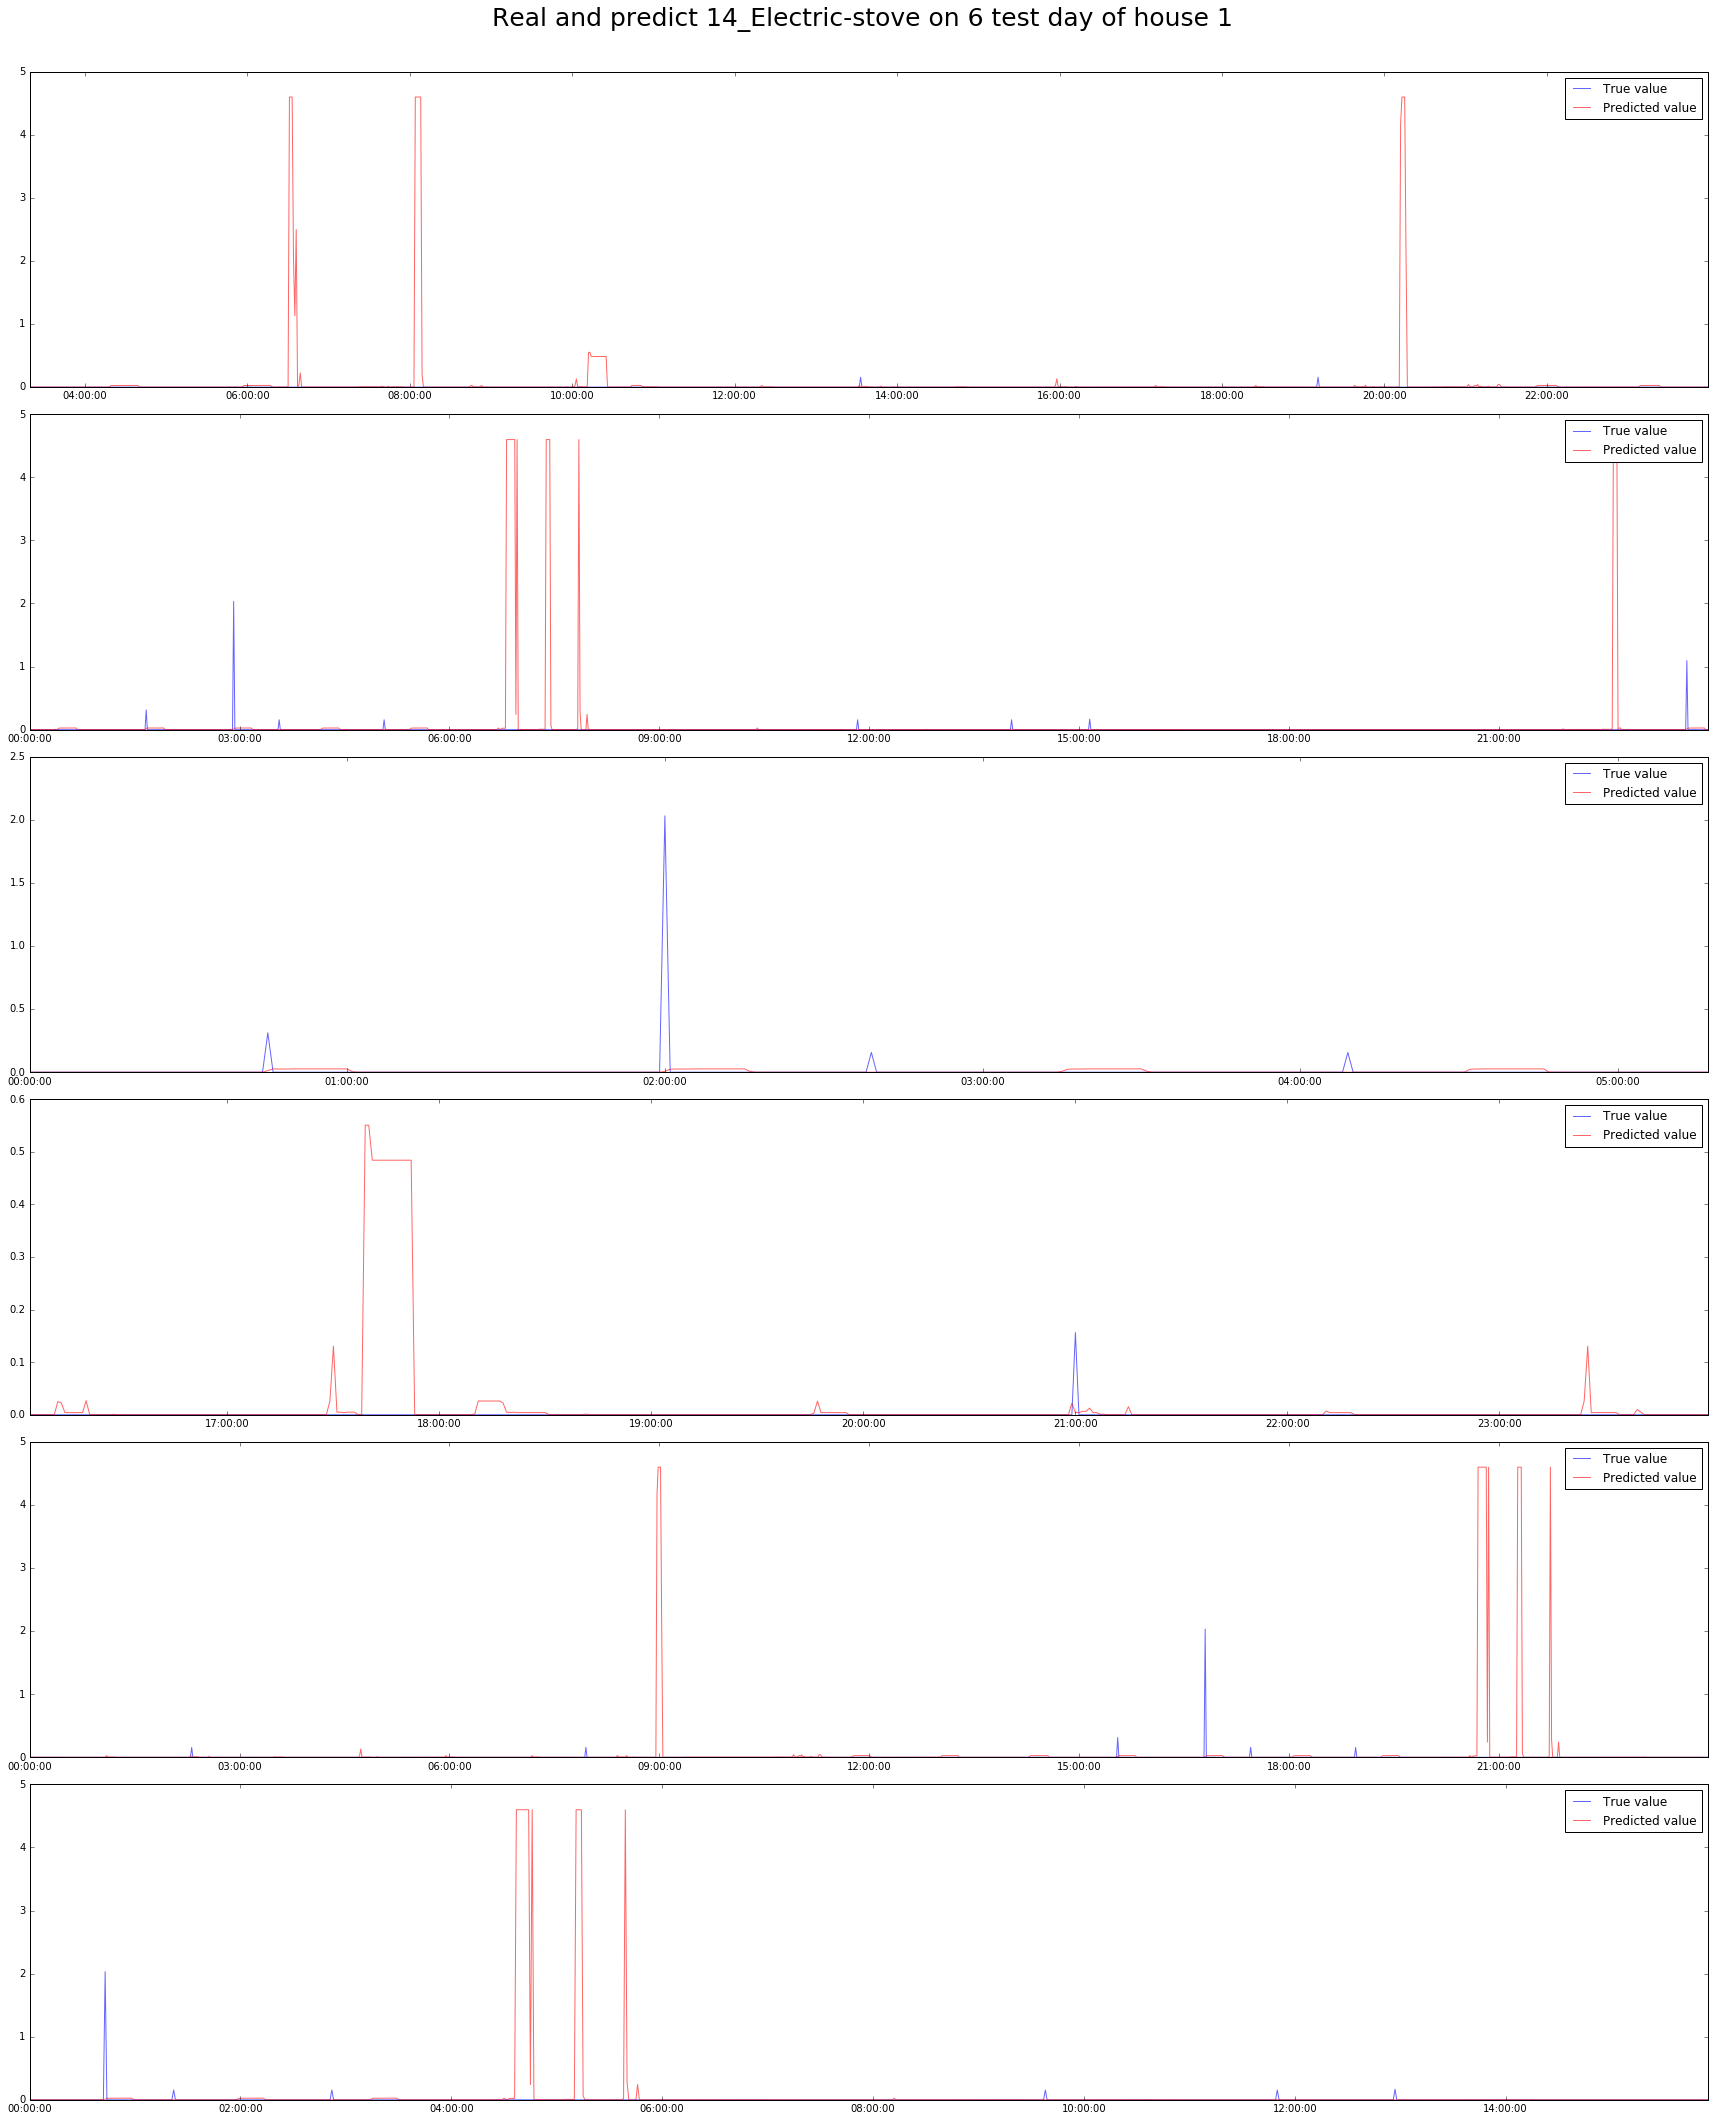

In [18]:
import os
folder = '/nilmtk/data/EA006-NILM-project/Training_output'
files = [os.path.join(folder,f) for f in os.listdir(folder) if os.path.isfile(os.path.join(folder,f))]
for filePath in files:
    with open(filePath) as f:  # Python 3: open(..., 'rb')
        obj = pickle.load(f)

    y_test_predict_2 = obj['model'].predict(X_test1)

    tree_clf_all_meters = {}
    tree_clf_all_meters[colMeterName] = tree_clf_1 #salva todos os modelos
    plot_each_app(df1_test, dates[17:], y_test_predict_2, y_test1, 'Real and predict {} on 6 test day of house 1'.format(obj['meter']))
    mse_tree_1 = mse_loss(y_test_predict_2, y_test1)
    mae_tree_1 = mae_loss(y_test_predict_2, y_test1)
    print('Mean square error on test set: {}'.format(mse_tree_1))
    print('Mean absolute error on the test set: {}'.format(mae_tree_1))
    

In [14]:
import os
folder = '/nilmtk/data/EA006-NILM-project/Training_output'
files = [os.path.join(folder,f) for f in os.listdir(folder) if os.path.isfile(os.path.join(folder,f))]
print(files)

['/nilmtk/data/EA006-NILM-project/Training_output/15_Sockets_out.pkl', '/nilmtk/data/EA006-NILM-project/Training_output/6_Dish-washer_out.pkl', '/nilmtk/data/EA006-NILM-project/Training_output/5_Fridge_out.pkl', '/nilmtk/data/EA006-NILM-project/Training_output/__6_Dish-washer_out.pkl', '/nilmtk/data/EA006-NILM-project/Training_output/17_Light_out.pkl', '/nilmtk/data/EA006-NILM-project/Training_output/9_Light_out.pkl', '/nilmtk/data/EA006-NILM-project/Training_output/11_Microwave_out.pkl', '/nilmtk/data/EA006-NILM-project/Training_output/8_Sockets_out.pkl', '/nilmtk/data/EA006-NILM-project/Training_output/18_Light_out.pkl', '/nilmtk/data/EA006-NILM-project/Training_output/19_Unknown_out.pkl', '/nilmtk/data/EA006-NILM-project/Training_output/__5_Fridge_out.pkl', '/nilmtk/data/EA006-NILM-project/Training_output/7_Sockets_out.pkl', '/nilmtk/data/EA006-NILM-project/Training_output/13_Electric-space-heater_out.pkl', '/nilmtk/data/EA006-NILM-project/Training_output/12_Unknown_out.pkl', '/nilm